In [37]:
#import necessary libraries
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#Load dataset
from datasets import load_dataset
ag_news = load_dataset("sh0416/ag_news")
ag_news

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 7600
    })
})

In [39]:
# Split original training set into train + validation
split = ag_news['train'].train_test_split(test_size=0.1, seed=42)
train_dataset = split['train']  # 90% of training set
val_dataset   = split['test']   # 10% of training set

# Keep the original test set for final evaluation
test_dataset  = ag_news['test']


In [40]:
# Convert to pandas for easier preprocessing
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)
val_df=pd.DataFrame(val_dataset)

In [41]:
print("Train set", train_df.head())
print("Test set",test_df.head())
print("Validation set", val_df.head())

Train set    label                                              title  \
0      1  Despair and Anger in Small Russian Town After ...   
1      4           Bob Evans, mainframe pioneer, dies at 77   
2      2         Agassi Brushes Bjorkman Aside in Stockholm   
3      4           UK scientists bring hydrogen cars closer   
4      2             Chelsea beats defending champion Porto   

                                         description  
0   BESLAN, Russia (Reuters) - The killing of mor...  
1  Evans led a team that developed a new class of...  
2   STOCKHOLM (Reuters) - Andre Agassi brushed pa...  
3  British scientists have used nanotechnology to...  
4  Jose Mourinho #39;s Chelsea outplayed the team...  
Test set    label                                              title  \
0      3                  Fears for T N pension after talks   
1      4  The Race is On: Second Private Team Sets Launc...   
2      4      Ky. Company Wins Grant to Study Peptides (AP)   
3      4      Predic

In [42]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        12000 non-null  int64 
 1   title        12000 non-null  object
 2   description  12000 non-null  object
dtypes: int64(1), object(2)
memory usage: 281.4+ KB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        7600 non-null   int64 
 1   title        7600 non-null   object
 2   description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [44]:
# Check and display the number of missing (null) values in each column of the training dataset
print("Null values in train set", train_df.isnull().sum())

# Check and display the number of missing (null) values in each column of the test dataset
print("Null values in test set", test_df.isnull().sum())

# Check and display the number of missing (null) values in each column of the validation dataset
print("Null values in validation set", val_df.isnull().sum())


Null values in train set label          0
title          0
description    0
dtype: int64
Null values in test set label          0
title          0
description    0
dtype: int64
Null values in validation set label          0
title          0
description    0
dtype: int64


In [45]:
#Showcasing unique values in Ag News dataset
train_df['label'].unique()


array([1, 4, 2, 3])

In [46]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   label        108000 non-null  int64 
 1   title        108000 non-null  object
 2   description  108000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        7600 non-null   int64 
 1   title        7600 non-null   object
 2   description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [48]:
# Display the number of rows and columns in the training dataset
print("Train shape:", train_df.shape)

# Display the number of rows and columns in the test dataset
print("Test shape:", test_df.shape)

# Display the number of rows and columns in the validation dataset
print("Validation shape:", val_df.shape)


Train shape: (108000, 3)
Test shape: (7600, 3)
Validation shape: (12000, 3)


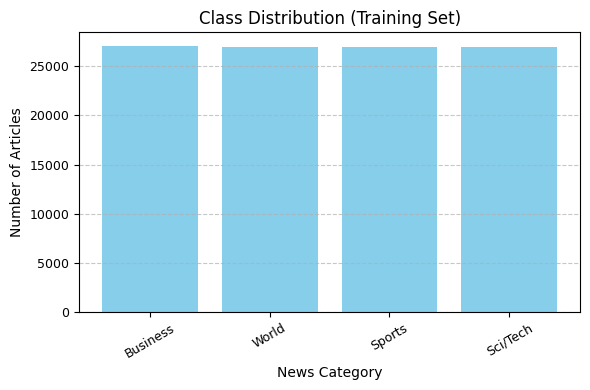

In [49]:
import matplotlib.pyplot as plt

# Mapping numeric class labels to their corresponding news category names
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

# Count the number of articles in each class from the training dataset
train_counts = train_df["label"].value_counts()

# Create a bar chart to visualize class distribution
plt.figure(figsize=(6, 4))

# Plot bar chart using category names instead of numeric labels
plt.bar(
    [label_map[i] for i in train_counts.index],  # Convert numeric labels to category names
    train_counts.values,                          # Frequency of each class
    color='skyblue'
)

# Label the x-axis
plt.xlabel("News Category", fontsize=10)

# Label the y-axis
plt.ylabel("Number of Articles", fontsize=10)

# Set the title of the plot
plt.title("Class Distribution (Training Set)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=9)

# Set font size for y-axis labels
plt.yticks(fontsize=9)

# Add grid lines to the y-axis for easier comparison
plt.grid(axis="y", linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


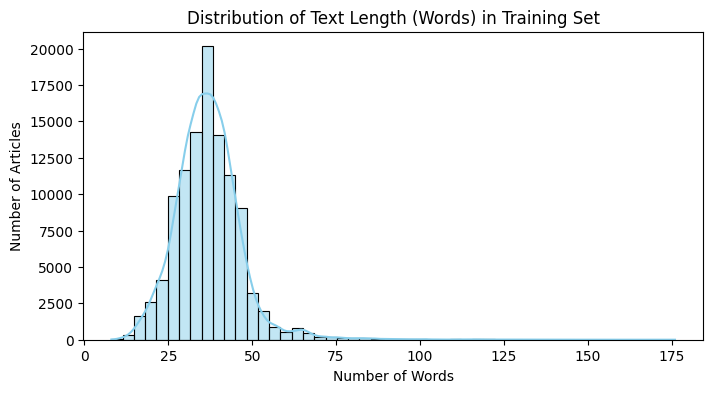

In [50]:
train_df['text_length'] = (train_df['title']+train_df['description']).apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
sns.histplot(train_df['text_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Text Length (Words) in Training Set")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.show()

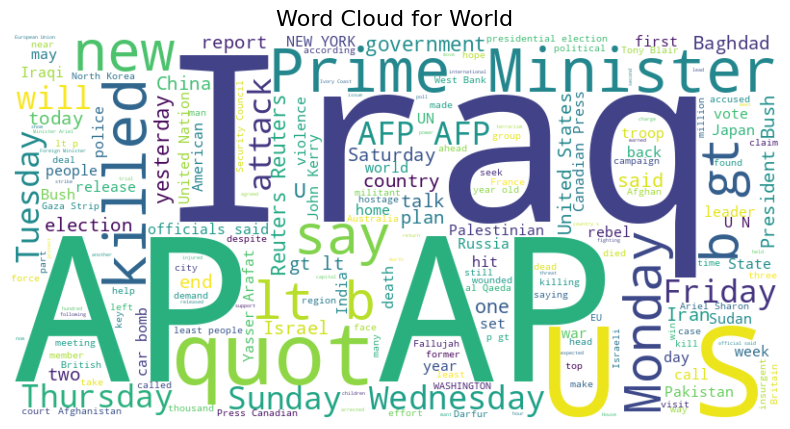

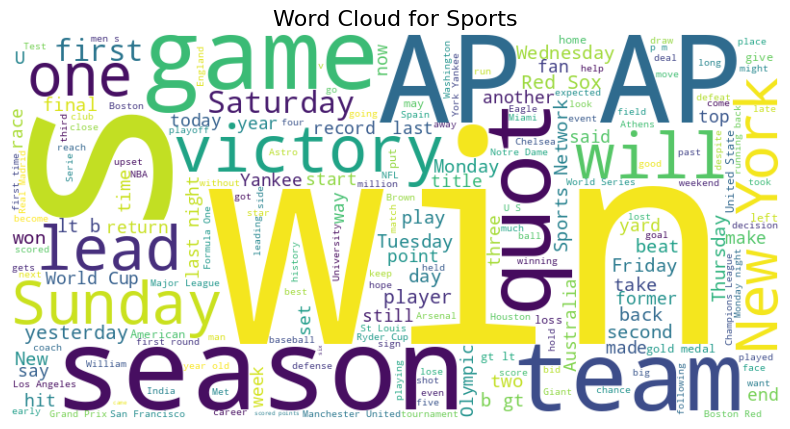

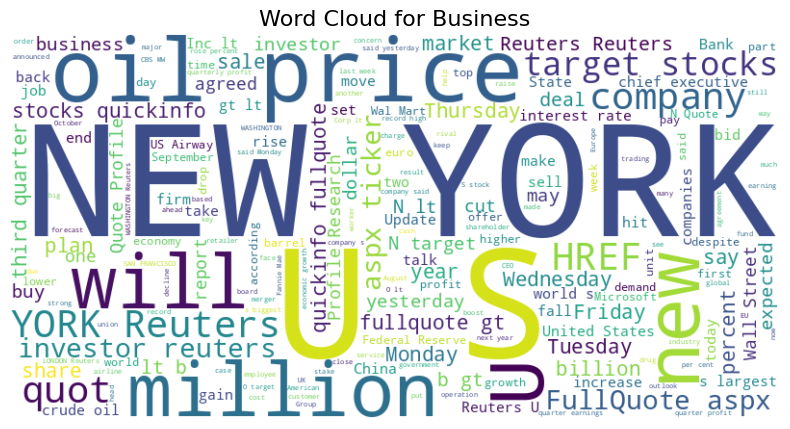

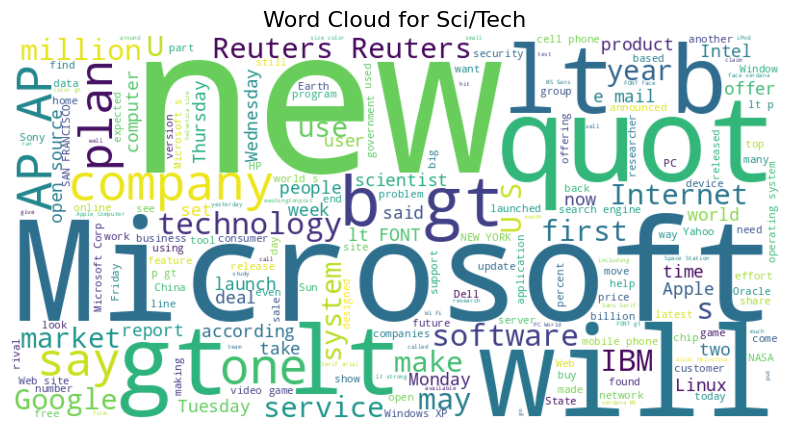

In [51]:
from wordcloud import WordCloud

# Map numeric labels to category names
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

# Loop through each label/category in the training set
for label, group in train_df.groupby('label'):
    # Combine all text in 'title_description' column (already cleaned if you applied preprocess)
    text = " ".join(group['title'] + " " + group['description'])

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {label_map[label]}", fontsize=16)  # show actual category name
    plt.show()


In [52]:
import nltk

# Download required resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # sometimes required for tokenization
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer to reduce words to their base form
lemmatizer = WordNetLemmatizer()

# Load English stopwords (common words like "the", "is", "and")
stop_words = set(stopwords.words('english'))

# Function to combine title and description into a single column
def clean(df):
    # Merge 'title' and 'description' into one column
    df['title_description'] = df['title'] + " " + df['description']

    # Remove the original columns to avoid redundancy
    df.drop(columns=['title', 'description'], inplace=True)

    return df

# Function to preprocess text data
def preprocess(text):
    # Check if input is a string and split into words
    if isinstance(text, str):
        words = text.split()
    else:
        words = text

    cleaned_text = []

    # Process each word
    for w in words:
        w_lower = w.lower()                 # Convert word to lowercase
        if w_lower not in stop_words:       # Remove stopwords
            w_lemma = lemmatizer.lemmatize(w_lower)  # Lemmatize the word
            cleaned_text.append(w_lemma)

    # Join cleaned words back into a single string
    return " ".join(cleaned_text)

# Apply cleaning function to the training dataset
train_df = clean(train_df)

# Display the cleaned dataframe
print(train_df)

# Apply text preprocessing to the combined text column
train_df['title_description'] = train_df['title_description'].apply(preprocess)

# Display first few rows after preprocessing
train_df.head()

# Print the column names of the dataframe
print(train_df.columns)


        label  text_length                                  title_description
0           1           44  Despair and Anger in Small Russian Town After ...
1           4           26  Bob Evans, mainframe pioneer, dies at 77 Evans...
2           2           34  Agassi Brushes Bjorkman Aside in Stockholm  ST...
3           4           28  UK scientists bring hydrogen cars closer Briti...
4           2           35  Chelsea beats defending champion Porto Jose Mo...
...       ...          ...                                                ...
107995      1           39  Haitians Left in Devasting Wake of Jeanne The ...
107996      2           41  Ask Walker about NU #39;s special day MADISON,...
107997      2           31  West Indies Hold Up England March James Anders...
107998      1           43  UN council mulls Sudan resolution, US to speak...
107999      3           38  SEC #39;s hedge fund debate intense Nearly two...

[108000 rows x 3 columns]
Index(['label', 'text_length', 'title

In [54]:
# Apply cleaning and preprocessing to test data
test_df = clean(test_df)
test_df['title_description'] = test_df['title_description'].apply(preprocess)

In [55]:
# Apply cleaning and preprocessing to validation data
val_df = clean(val_df)
val_df['title_description'] = val_df['title_description'].apply(preprocess)

In [56]:
train_df.head()

label  text_length                                  title_description
0      1           44  despair anger small russian town siege beslan,...
1      4           26  bob evans, mainframe pioneer, dy 77 evans led ...
2      2           34  agassi brush bjorkman aside stockholm stockhol...
3      4           28  uk scientist bring hydrogen car closer british...
4      2           35  chelsea beat defending champion porto jose mou...

In [57]:
# Import TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=20000,
    min_df=3,
    max_df=0.95,
    stop_words='english'
)

# Transform text data into TF-IDF features
X_train = vectorizer.fit_transform(train_df['title_description'])
X_val   = vectorizer.transform(val_df['title_description'])
X_test  = vectorizer.transform(test_df['title_description'])





In [58]:
# Extract labels
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test= test_df['label'].values

In [59]:
# Display label statistics
print(train_df['label'].unique())
print(train_df['label'].dtype)
print(train_df['label'].value_counts())

y=train_df['label']



[1 4 2 3]
int64
label
3    27100
1    26991
2    26966
4    26943
Name: count, dtype: int64


In [60]:
#Define softmax function
import numpy as np
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_weighted(
    X_train, y_train,
    X_val=None, y_val=None,
    lr=0.01,
    epochs=20,
    batch_size=1024,
    lambda_reg=1e-5
):
    # Get number of features, classes, and samples
    n_features = X_train.shape[1]
    n_classes = y_train.shape[1]
    n_samples = X_train.shape[0]

    # Initialize weights and bias
    w = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    # Calculate class weights to handle class imbalance
    class_counts = np.sum(y_train, axis=0)
    class_weights = np.max(class_counts) / class_counts

    # Store accuracy values
    train_acc_history = []
    val_acc_history = []

    # Training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Mini-batch gradient descent
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            # Forward pass
            z = X_batch.dot(w) + b
            exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
            y_pred = exp_z / np.sum(exp_z, axis=1, keepdims=True)

            # Compute weighted error
            weighted_error = (y_pred - y_batch) * class_weights

            # Compute gradients
            dw = X_batch.T.dot(weighted_error) / X_batch.shape[0]
            dw += lambda_reg * w
            db = np.sum(weighted_error, axis=0, keepdims=True) / X_batch.shape[0]

            # Update parameters
            w -= lr * dw
            b -= lr * db

        # Calculate training accuracy
        y_train_pred = np.argmax(X_train.dot(w) + b, axis=1)
        y_true_train = np.argmax(y_train, axis=1)
        train_acc = np.mean(y_train_pred == y_true_train)
        train_acc_history.append(train_acc)

        # Calculate validation accuracy if provided
        if X_val is not None and y_val is not None:
            y_val_pred = np.argmax(X_val.dot(w) + b, axis=1)
            y_true_val = np.argmax(y_val, axis=1)
            val_acc = np.mean(y_val_pred == y_true_val)
            val_acc_history.append(val_acc)
            print(f"  Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
        else:
            print(f"  Train Acc: {train_acc:.4f}")

    # Plot training and validation accuracy
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, train_acc_history, label="Training Accuracy")

    if val_acc_history:
        plt.plot(epochs_range, val_acc_history, label="Validation Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy (Logistic Regression)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return w, b, train_acc_history, val_acc_history



In [62]:
def predict(X, w, b):
    # Compute linear scores
    z = X.dot(w) + b

    # Apply softmax
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # Return predicted class labels
    return np.argmax(probs, axis=1)


In [63]:
print(X_train.shape[0] )
print(y_train.shape[0])


108000
108000


In [64]:
print("Train labels:", np.unique(y_train))
print("Val labels:", np.unique(y_val))
print("Test labels:", np.unique(y_test))


Train labels: [1 2 3 4]
Val labels: [1 2 3 4]
Test labels: [1 2 3 4]


Training with lr=0.01, batch_size=512, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.7285 | Val Acc: 0.7198
Epoch 2/30
  Train Acc: 0.7874 | Val Acc: 0.7833
Epoch 3/30
  Train Acc: 0.8222 | Val Acc: 0.8166
Epoch 4/30
  Train Acc: 0.8424 | Val Acc: 0.8354
Epoch 5/30
  Train Acc: 0.8532 | Val Acc: 0.8472
Epoch 6/30
  Train Acc: 0.8600 | Val Acc: 0.8543
Epoch 7/30
  Train Acc: 0.8634 | Val Acc: 0.8592
Epoch 8/30
  Train Acc: 0.8659 | Val Acc: 0.8605
Epoch 9/30
  Train Acc: 0.8672 | Val Acc: 0.8622
Epoch 10/30
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 11/30
  Train Acc: 0.8689 | Val Acc: 0.8628
Epoch 12/30
  Train Acc: 0.8692 | Val Acc: 0.8624
Epoch 13/30
  Train Acc: 0.8696 | Val Acc: 0.8632
Epoch 14/30
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 15/30
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 16/30
  Train Acc: 0.8698 | Val Acc: 0.8634
Epoch 17/30
  Train Acc: 0.8700 | Val Acc: 0.8637
Epoch 18/30
  Train Acc: 0.8698 | Val Acc: 0.8636
Epoch 19/30
  Train Acc: 0.8699 | Val Acc: 0.

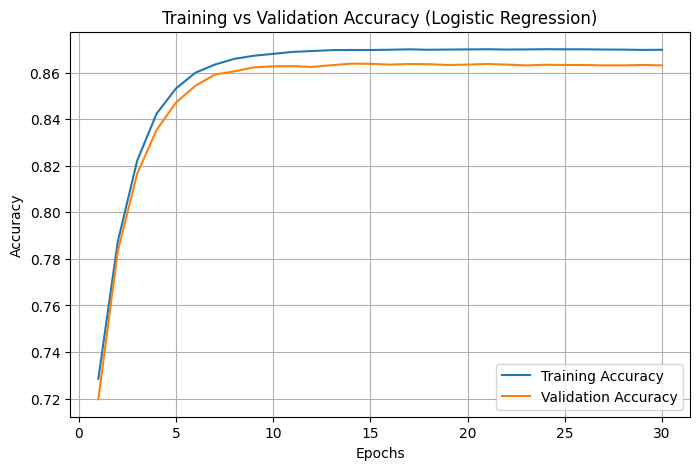

Training with lr=0.01, batch_size=512, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.7285 | Val Acc: 0.7198
Epoch 2/40
  Train Acc: 0.7874 | Val Acc: 0.7833
Epoch 3/40
  Train Acc: 0.8222 | Val Acc: 0.8166
Epoch 4/40
  Train Acc: 0.8424 | Val Acc: 0.8354
Epoch 5/40
  Train Acc: 0.8532 | Val Acc: 0.8472
Epoch 6/40
  Train Acc: 0.8600 | Val Acc: 0.8543
Epoch 7/40
  Train Acc: 0.8634 | Val Acc: 0.8592
Epoch 8/40
  Train Acc: 0.8659 | Val Acc: 0.8605
Epoch 9/40
  Train Acc: 0.8672 | Val Acc: 0.8622
Epoch 10/40
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 11/40
  Train Acc: 0.8689 | Val Acc: 0.8628
Epoch 12/40
  Train Acc: 0.8692 | Val Acc: 0.8624
Epoch 13/40
  Train Acc: 0.8696 | Val Acc: 0.8632
Epoch 14/40
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 15/40
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 16/40
  Train Acc: 0.8698 | Val Acc: 0.8634
Epoch 17/40
  Train Acc: 0.8700 | Val Acc: 0.8637
Epoch 18/40
  Train Acc: 0.8698 | Val Acc: 0.8636
Epoch 19/40
  Train Acc: 0.8699 | Val Acc: 0.

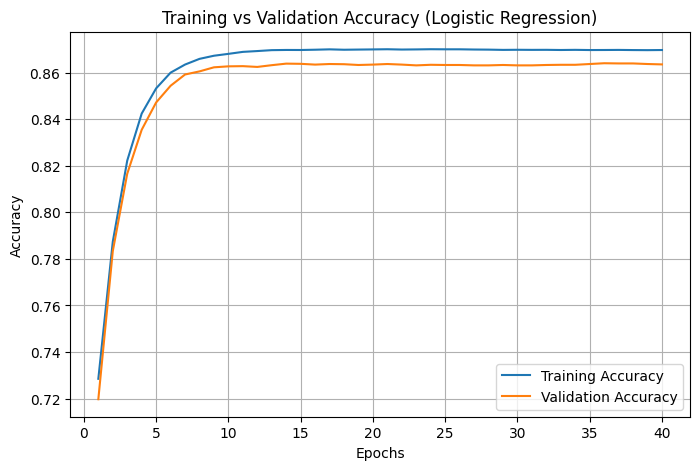

Training with lr=0.01, batch_size=512, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.7285 | Val Acc: 0.7198
Epoch 2/50
  Train Acc: 0.7874 | Val Acc: 0.7833
Epoch 3/50
  Train Acc: 0.8222 | Val Acc: 0.8166
Epoch 4/50
  Train Acc: 0.8424 | Val Acc: 0.8354
Epoch 5/50
  Train Acc: 0.8532 | Val Acc: 0.8472
Epoch 6/50
  Train Acc: 0.8600 | Val Acc: 0.8543
Epoch 7/50
  Train Acc: 0.8634 | Val Acc: 0.8592
Epoch 8/50
  Train Acc: 0.8659 | Val Acc: 0.8605
Epoch 9/50
  Train Acc: 0.8672 | Val Acc: 0.8622
Epoch 10/50
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 11/50
  Train Acc: 0.8689 | Val Acc: 0.8628
Epoch 12/50
  Train Acc: 0.8692 | Val Acc: 0.8624
Epoch 13/50
  Train Acc: 0.8696 | Val Acc: 0.8632
Epoch 14/50
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 15/50
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 16/50
  Train Acc: 0.8698 | Val Acc: 0.8634
Epoch 17/50
  Train Acc: 0.8700 | Val Acc: 0.8637
Epoch 18/50
  Train Acc: 0.8698 | Val Acc: 0.8636
Epoch 19/50
  Train Acc: 0.8699 | Val Acc: 0.

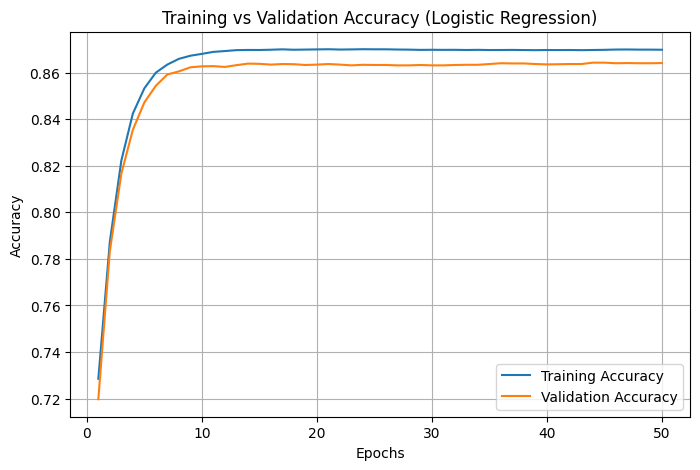

Training with lr=0.01, batch_size=512, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.7283 | Val Acc: 0.7195
Epoch 2/30
  Train Acc: 0.7871 | Val Acc: 0.7827
Epoch 3/30
  Train Acc: 0.8219 | Val Acc: 0.8163
Epoch 4/30
  Train Acc: 0.8421 | Val Acc: 0.8350
Epoch 5/30
  Train Acc: 0.8531 | Val Acc: 0.8469
Epoch 6/30
  Train Acc: 0.8599 | Val Acc: 0.8543
Epoch 7/30
  Train Acc: 0.8633 | Val Acc: 0.8593
Epoch 8/30
  Train Acc: 0.8658 | Val Acc: 0.8604
Epoch 9/30
  Train Acc: 0.8671 | Val Acc: 0.8621
Epoch 10/30
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 11/30
  Train Acc: 0.8688 | Val Acc: 0.8628
Epoch 12/30
  Train Acc: 0.8693 | Val Acc: 0.8625
Epoch 13/30
  Train Acc: 0.8695 | Val Acc: 0.8629
Epoch 14/30
  Train Acc: 0.8696 | Val Acc: 0.8637
Epoch 15/30
  Train Acc: 0.8696 | Val Acc: 0.8638
Epoch 16/30
  Train Acc: 0.8698 | Val Acc: 0.8637
Epoch 17/30
  Train Acc: 0.8699 | Val Acc: 0.8636
Epoch 18/30
  Train Acc: 0.8699 | Val Acc: 0.8636
Epoch 19/30
  Train Acc: 0.8699 | Val Acc: 0.8

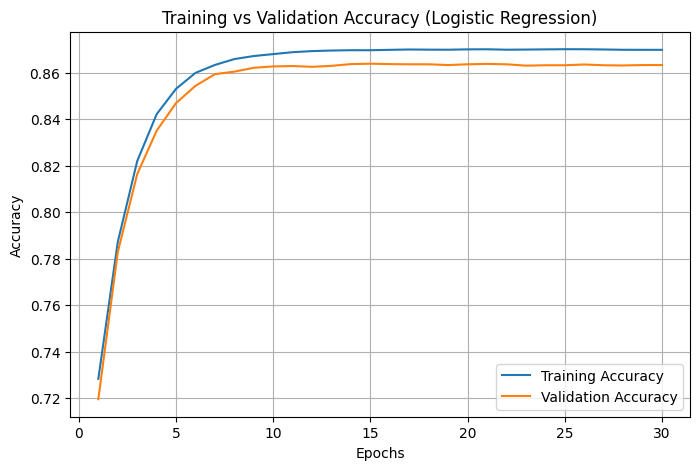

Training with lr=0.01, batch_size=512, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.7283 | Val Acc: 0.7195
Epoch 2/40
  Train Acc: 0.7871 | Val Acc: 0.7827
Epoch 3/40
  Train Acc: 0.8219 | Val Acc: 0.8163
Epoch 4/40
  Train Acc: 0.8421 | Val Acc: 0.8350
Epoch 5/40
  Train Acc: 0.8531 | Val Acc: 0.8469
Epoch 6/40
  Train Acc: 0.8599 | Val Acc: 0.8543
Epoch 7/40
  Train Acc: 0.8633 | Val Acc: 0.8593
Epoch 8/40
  Train Acc: 0.8658 | Val Acc: 0.8604
Epoch 9/40
  Train Acc: 0.8671 | Val Acc: 0.8621
Epoch 10/40
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 11/40
  Train Acc: 0.8688 | Val Acc: 0.8628
Epoch 12/40
  Train Acc: 0.8693 | Val Acc: 0.8625
Epoch 13/40
  Train Acc: 0.8695 | Val Acc: 0.8629
Epoch 14/40
  Train Acc: 0.8696 | Val Acc: 0.8637
Epoch 15/40
  Train Acc: 0.8696 | Val Acc: 0.8638
Epoch 16/40
  Train Acc: 0.8698 | Val Acc: 0.8637
Epoch 17/40
  Train Acc: 0.8699 | Val Acc: 0.8636
Epoch 18/40
  Train Acc: 0.8699 | Val Acc: 0.8636
Epoch 19/40
  Train Acc: 0.8699 | Val Acc: 0.8

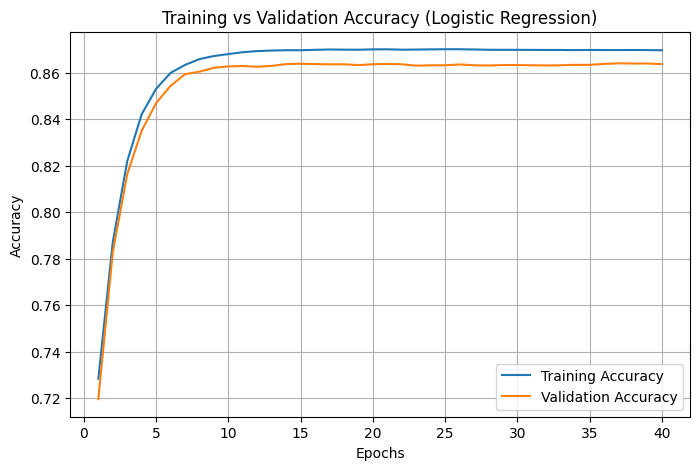

Training with lr=0.01, batch_size=512, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.7283 | Val Acc: 0.7195
Epoch 2/50
  Train Acc: 0.7871 | Val Acc: 0.7827
Epoch 3/50
  Train Acc: 0.8219 | Val Acc: 0.8163
Epoch 4/50
  Train Acc: 0.8421 | Val Acc: 0.8350
Epoch 5/50
  Train Acc: 0.8531 | Val Acc: 0.8469
Epoch 6/50
  Train Acc: 0.8599 | Val Acc: 0.8543
Epoch 7/50
  Train Acc: 0.8633 | Val Acc: 0.8593
Epoch 8/50
  Train Acc: 0.8658 | Val Acc: 0.8604
Epoch 9/50
  Train Acc: 0.8671 | Val Acc: 0.8621
Epoch 10/50
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 11/50
  Train Acc: 0.8688 | Val Acc: 0.8628
Epoch 12/50
  Train Acc: 0.8693 | Val Acc: 0.8625
Epoch 13/50
  Train Acc: 0.8695 | Val Acc: 0.8629
Epoch 14/50
  Train Acc: 0.8696 | Val Acc: 0.8637
Epoch 15/50
  Train Acc: 0.8696 | Val Acc: 0.8638
Epoch 16/50
  Train Acc: 0.8698 | Val Acc: 0.8637
Epoch 17/50
  Train Acc: 0.8699 | Val Acc: 0.8636
Epoch 18/50
  Train Acc: 0.8699 | Val Acc: 0.8636
Epoch 19/50
  Train Acc: 0.8699 | Val Acc: 0.8

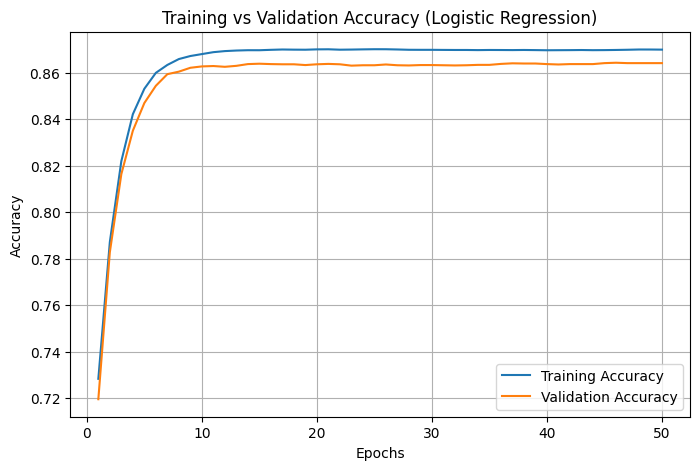

Training with lr=0.01, batch_size=512, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.7263 | Val Acc: 0.7168
Epoch 2/30
  Train Acc: 0.7839 | Val Acc: 0.7797
Epoch 3/30
  Train Acc: 0.8187 | Val Acc: 0.8131
Epoch 4/30
  Train Acc: 0.8396 | Val Acc: 0.8331
Epoch 5/30
  Train Acc: 0.8512 | Val Acc: 0.8449
Epoch 6/30
  Train Acc: 0.8584 | Val Acc: 0.8528
Epoch 7/30
  Train Acc: 0.8624 | Val Acc: 0.8578
Epoch 8/30
  Train Acc: 0.8650 | Val Acc: 0.8594
Epoch 9/30
  Train Acc: 0.8664 | Val Acc: 0.8615
Epoch 10/30
  Train Acc: 0.8674 | Val Acc: 0.8625
Epoch 11/30
  Train Acc: 0.8681 | Val Acc: 0.8625
Epoch 12/30
  Train Acc: 0.8689 | Val Acc: 0.8628
Epoch 13/30
  Train Acc: 0.8693 | Val Acc: 0.8624
Epoch 14/30
  Train Acc: 0.8695 | Val Acc: 0.8628
Epoch 15/30
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 16/30
  Train Acc: 0.8697 | Val Acc: 0.8637
Epoch 17/30
  Train Acc: 0.8698 | Val Acc: 0.8638
Epoch 18/30
  Train Acc: 0.8699 | Val Acc: 0.8637
Epoch 19/30
  Train Acc: 0.8701 | Val Acc: 0.86

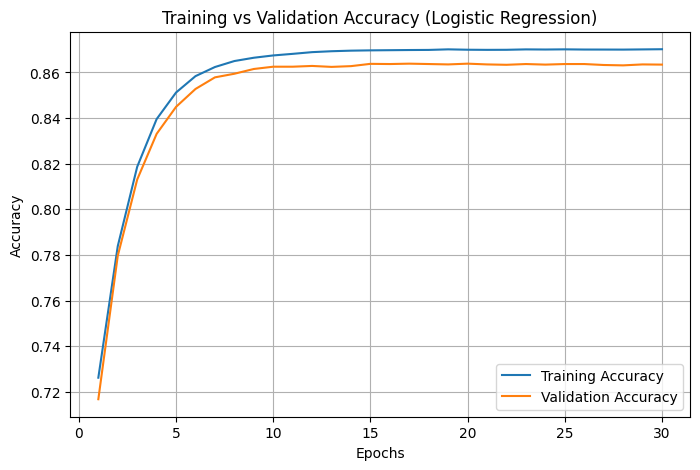

Training with lr=0.01, batch_size=512, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.7263 | Val Acc: 0.7168
Epoch 2/40
  Train Acc: 0.7839 | Val Acc: 0.7797
Epoch 3/40
  Train Acc: 0.8187 | Val Acc: 0.8131
Epoch 4/40
  Train Acc: 0.8396 | Val Acc: 0.8331
Epoch 5/40
  Train Acc: 0.8512 | Val Acc: 0.8449
Epoch 6/40
  Train Acc: 0.8584 | Val Acc: 0.8528
Epoch 7/40
  Train Acc: 0.8624 | Val Acc: 0.8578
Epoch 8/40
  Train Acc: 0.8650 | Val Acc: 0.8594
Epoch 9/40
  Train Acc: 0.8664 | Val Acc: 0.8615
Epoch 10/40
  Train Acc: 0.8674 | Val Acc: 0.8625
Epoch 11/40
  Train Acc: 0.8681 | Val Acc: 0.8625
Epoch 12/40
  Train Acc: 0.8689 | Val Acc: 0.8628
Epoch 13/40
  Train Acc: 0.8693 | Val Acc: 0.8624
Epoch 14/40
  Train Acc: 0.8695 | Val Acc: 0.8628
Epoch 15/40
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 16/40
  Train Acc: 0.8697 | Val Acc: 0.8637
Epoch 17/40
  Train Acc: 0.8698 | Val Acc: 0.8638
Epoch 18/40
  Train Acc: 0.8699 | Val Acc: 0.8637
Epoch 19/40
  Train Acc: 0.8701 | Val Acc: 0.86

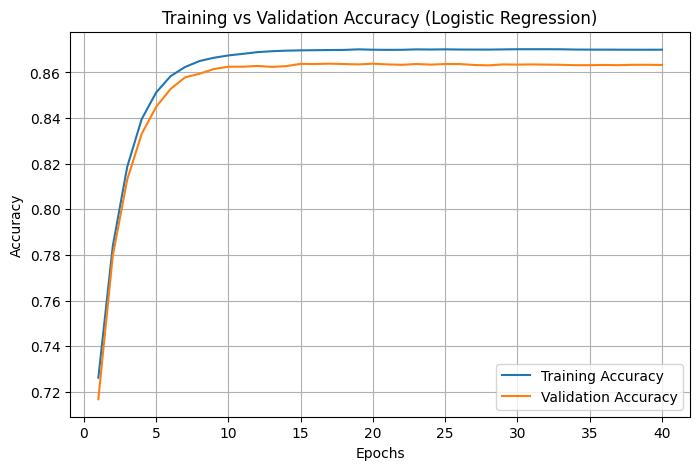

Training with lr=0.01, batch_size=512, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.7263 | Val Acc: 0.7168
Epoch 2/50
  Train Acc: 0.7839 | Val Acc: 0.7797
Epoch 3/50
  Train Acc: 0.8187 | Val Acc: 0.8131
Epoch 4/50
  Train Acc: 0.8396 | Val Acc: 0.8331
Epoch 5/50
  Train Acc: 0.8512 | Val Acc: 0.8449
Epoch 6/50
  Train Acc: 0.8584 | Val Acc: 0.8528
Epoch 7/50
  Train Acc: 0.8624 | Val Acc: 0.8578
Epoch 8/50
  Train Acc: 0.8650 | Val Acc: 0.8594
Epoch 9/50
  Train Acc: 0.8664 | Val Acc: 0.8615
Epoch 10/50
  Train Acc: 0.8674 | Val Acc: 0.8625
Epoch 11/50
  Train Acc: 0.8681 | Val Acc: 0.8625
Epoch 12/50
  Train Acc: 0.8689 | Val Acc: 0.8628
Epoch 13/50
  Train Acc: 0.8693 | Val Acc: 0.8624
Epoch 14/50
  Train Acc: 0.8695 | Val Acc: 0.8628
Epoch 15/50
  Train Acc: 0.8697 | Val Acc: 0.8638
Epoch 16/50
  Train Acc: 0.8697 | Val Acc: 0.8637
Epoch 17/50
  Train Acc: 0.8698 | Val Acc: 0.8638
Epoch 18/50
  Train Acc: 0.8699 | Val Acc: 0.8637
Epoch 19/50
  Train Acc: 0.8701 | Val Acc: 0.86

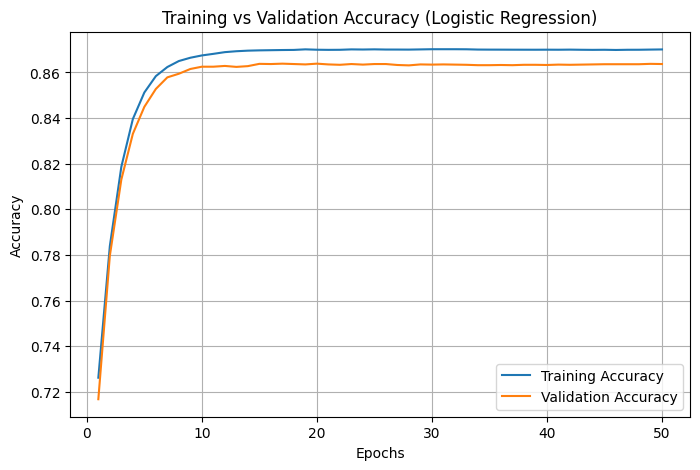

Training with lr=0.01, batch_size=1024, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.6079 | Val Acc: 0.6023
Epoch 2/30
  Train Acc: 0.6595 | Val Acc: 0.6518
Epoch 3/30
  Train Acc: 0.7020 | Val Acc: 0.6930
Epoch 4/30
  Train Acc: 0.7378 | Val Acc: 0.7308
Epoch 5/30
  Train Acc: 0.7660 | Val Acc: 0.7620
Epoch 6/30
  Train Acc: 0.7886 | Val Acc: 0.7845
Epoch 7/30
  Train Acc: 0.8053 | Val Acc: 0.8003
Epoch 8/30
  Train Acc: 0.8198 | Val Acc: 0.8137
Epoch 9/30
  Train Acc: 0.8307 | Val Acc: 0.8259
Epoch 10/30
  Train Acc: 0.8389 | Val Acc: 0.8326
Epoch 11/30
  Train Acc: 0.8453 | Val Acc: 0.8393
Epoch 12/30
  Train Acc: 0.8500 | Val Acc: 0.8439
Epoch 13/30
  Train Acc: 0.8538 | Val Acc: 0.8470
Epoch 14/30
  Train Acc: 0.8570 | Val Acc: 0.8510
Epoch 15/30
  Train Acc: 0.8596 | Val Acc: 0.8535
Epoch 16/30
  Train Acc: 0.8615 | Val Acc: 0.8562
Epoch 17/30
  Train Acc: 0.8628 | Val Acc: 0.8577
Epoch 18/30
  Train Acc: 0.8640 | Val Acc: 0.8588
Epoch 19/30
  Train Acc: 0.8652 | Val Acc: 0

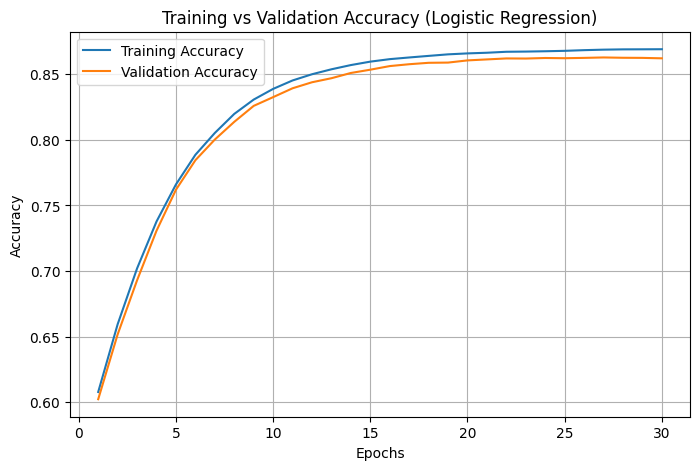

Training with lr=0.01, batch_size=1024, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.6079 | Val Acc: 0.6023
Epoch 2/40
  Train Acc: 0.6595 | Val Acc: 0.6518
Epoch 3/40
  Train Acc: 0.7020 | Val Acc: 0.6930
Epoch 4/40
  Train Acc: 0.7378 | Val Acc: 0.7308
Epoch 5/40
  Train Acc: 0.7660 | Val Acc: 0.7620
Epoch 6/40
  Train Acc: 0.7886 | Val Acc: 0.7845
Epoch 7/40
  Train Acc: 0.8053 | Val Acc: 0.8003
Epoch 8/40
  Train Acc: 0.8198 | Val Acc: 0.8137
Epoch 9/40
  Train Acc: 0.8307 | Val Acc: 0.8259
Epoch 10/40
  Train Acc: 0.8389 | Val Acc: 0.8326
Epoch 11/40
  Train Acc: 0.8453 | Val Acc: 0.8393
Epoch 12/40
  Train Acc: 0.8500 | Val Acc: 0.8439
Epoch 13/40
  Train Acc: 0.8538 | Val Acc: 0.8470
Epoch 14/40
  Train Acc: 0.8570 | Val Acc: 0.8510
Epoch 15/40
  Train Acc: 0.8596 | Val Acc: 0.8535
Epoch 16/40
  Train Acc: 0.8615 | Val Acc: 0.8562
Epoch 17/40
  Train Acc: 0.8628 | Val Acc: 0.8577
Epoch 18/40
  Train Acc: 0.8640 | Val Acc: 0.8588
Epoch 19/40
  Train Acc: 0.8652 | Val Acc: 0

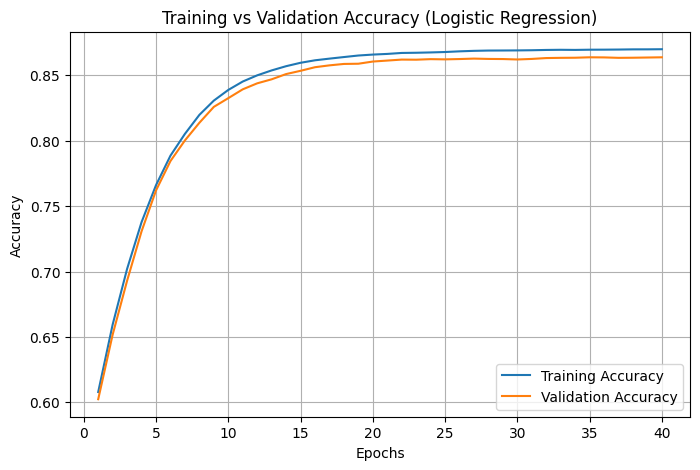

Training with lr=0.01, batch_size=1024, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.6079 | Val Acc: 0.6023
Epoch 2/50
  Train Acc: 0.6595 | Val Acc: 0.6518
Epoch 3/50
  Train Acc: 0.7020 | Val Acc: 0.6930
Epoch 4/50
  Train Acc: 0.7378 | Val Acc: 0.7308
Epoch 5/50
  Train Acc: 0.7660 | Val Acc: 0.7620
Epoch 6/50
  Train Acc: 0.7886 | Val Acc: 0.7845
Epoch 7/50
  Train Acc: 0.8053 | Val Acc: 0.8003
Epoch 8/50
  Train Acc: 0.8198 | Val Acc: 0.8137
Epoch 9/50
  Train Acc: 0.8307 | Val Acc: 0.8259
Epoch 10/50
  Train Acc: 0.8389 | Val Acc: 0.8326
Epoch 11/50
  Train Acc: 0.8453 | Val Acc: 0.8393
Epoch 12/50
  Train Acc: 0.8500 | Val Acc: 0.8439
Epoch 13/50
  Train Acc: 0.8538 | Val Acc: 0.8470
Epoch 14/50
  Train Acc: 0.8570 | Val Acc: 0.8510
Epoch 15/50
  Train Acc: 0.8596 | Val Acc: 0.8535
Epoch 16/50
  Train Acc: 0.8615 | Val Acc: 0.8562
Epoch 17/50
  Train Acc: 0.8628 | Val Acc: 0.8577
Epoch 18/50
  Train Acc: 0.8640 | Val Acc: 0.8588
Epoch 19/50
  Train Acc: 0.8652 | Val Acc: 0

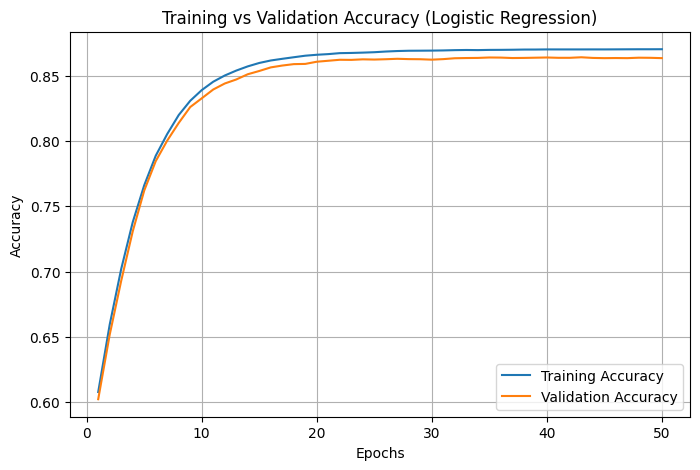

Training with lr=0.01, batch_size=1024, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.6077 | Val Acc: 0.6022
Epoch 2/30
  Train Acc: 0.6591 | Val Acc: 0.6512
Epoch 3/30
  Train Acc: 0.7015 | Val Acc: 0.6925
Epoch 4/30
  Train Acc: 0.7373 | Val Acc: 0.7302
Epoch 5/30
  Train Acc: 0.7656 | Val Acc: 0.7613
Epoch 6/30
  Train Acc: 0.7882 | Val Acc: 0.7840
Epoch 7/30
  Train Acc: 0.8050 | Val Acc: 0.7996
Epoch 8/30
  Train Acc: 0.8195 | Val Acc: 0.8133
Epoch 9/30
  Train Acc: 0.8304 | Val Acc: 0.8254
Epoch 10/30
  Train Acc: 0.8386 | Val Acc: 0.8323
Epoch 11/30
  Train Acc: 0.8450 | Val Acc: 0.8389
Epoch 12/30
  Train Acc: 0.8498 | Val Acc: 0.8442
Epoch 13/30
  Train Acc: 0.8536 | Val Acc: 0.8468
Epoch 14/30
  Train Acc: 0.8569 | Val Acc: 0.8503
Epoch 15/30
  Train Acc: 0.8595 | Val Acc: 0.8532
Epoch 16/30
  Train Acc: 0.8613 | Val Acc: 0.8560
Epoch 17/30
  Train Acc: 0.8627 | Val Acc: 0.8577
Epoch 18/30
  Train Acc: 0.8639 | Val Acc: 0.8588
Epoch 19/30
  Train Acc: 0.8651 | Val Acc: 0.

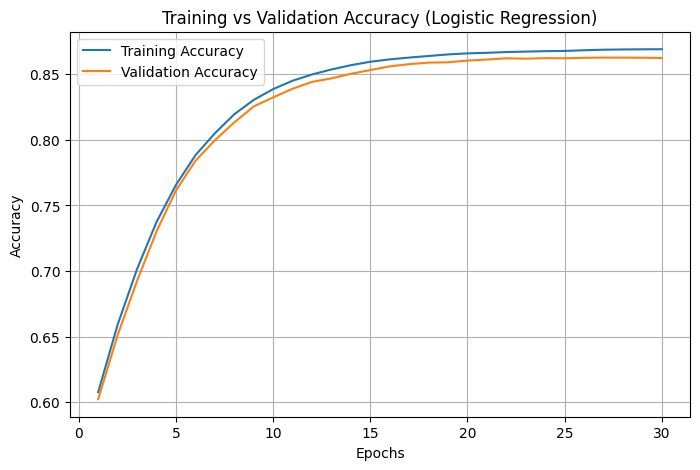

Training with lr=0.01, batch_size=1024, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.6077 | Val Acc: 0.6022
Epoch 2/40
  Train Acc: 0.6591 | Val Acc: 0.6512
Epoch 3/40
  Train Acc: 0.7015 | Val Acc: 0.6925
Epoch 4/40
  Train Acc: 0.7373 | Val Acc: 0.7302
Epoch 5/40
  Train Acc: 0.7656 | Val Acc: 0.7613
Epoch 6/40
  Train Acc: 0.7882 | Val Acc: 0.7840
Epoch 7/40
  Train Acc: 0.8050 | Val Acc: 0.7996
Epoch 8/40
  Train Acc: 0.8195 | Val Acc: 0.8133
Epoch 9/40
  Train Acc: 0.8304 | Val Acc: 0.8254
Epoch 10/40
  Train Acc: 0.8386 | Val Acc: 0.8323
Epoch 11/40
  Train Acc: 0.8450 | Val Acc: 0.8389
Epoch 12/40
  Train Acc: 0.8498 | Val Acc: 0.8442
Epoch 13/40
  Train Acc: 0.8536 | Val Acc: 0.8468
Epoch 14/40
  Train Acc: 0.8569 | Val Acc: 0.8503
Epoch 15/40
  Train Acc: 0.8595 | Val Acc: 0.8532
Epoch 16/40
  Train Acc: 0.8613 | Val Acc: 0.8560
Epoch 17/40
  Train Acc: 0.8627 | Val Acc: 0.8577
Epoch 18/40
  Train Acc: 0.8639 | Val Acc: 0.8588
Epoch 19/40
  Train Acc: 0.8651 | Val Acc: 0.

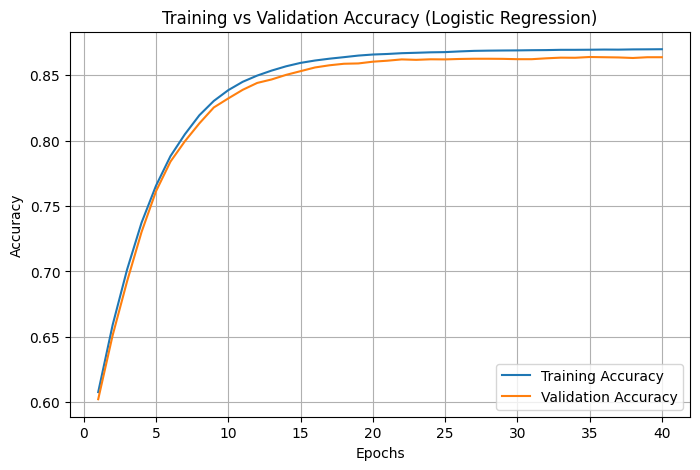

Training with lr=0.01, batch_size=1024, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.6077 | Val Acc: 0.6022
Epoch 2/50
  Train Acc: 0.6591 | Val Acc: 0.6512
Epoch 3/50
  Train Acc: 0.7015 | Val Acc: 0.6925
Epoch 4/50
  Train Acc: 0.7373 | Val Acc: 0.7302
Epoch 5/50
  Train Acc: 0.7656 | Val Acc: 0.7613
Epoch 6/50
  Train Acc: 0.7882 | Val Acc: 0.7840
Epoch 7/50
  Train Acc: 0.8050 | Val Acc: 0.7996
Epoch 8/50
  Train Acc: 0.8195 | Val Acc: 0.8133
Epoch 9/50
  Train Acc: 0.8304 | Val Acc: 0.8254
Epoch 10/50
  Train Acc: 0.8386 | Val Acc: 0.8323
Epoch 11/50
  Train Acc: 0.8450 | Val Acc: 0.8389
Epoch 12/50
  Train Acc: 0.8498 | Val Acc: 0.8442
Epoch 13/50
  Train Acc: 0.8536 | Val Acc: 0.8468
Epoch 14/50
  Train Acc: 0.8569 | Val Acc: 0.8503
Epoch 15/50
  Train Acc: 0.8595 | Val Acc: 0.8532
Epoch 16/50
  Train Acc: 0.8613 | Val Acc: 0.8560
Epoch 17/50
  Train Acc: 0.8627 | Val Acc: 0.8577
Epoch 18/50
  Train Acc: 0.8639 | Val Acc: 0.8588
Epoch 19/50
  Train Acc: 0.8651 | Val Acc: 0.

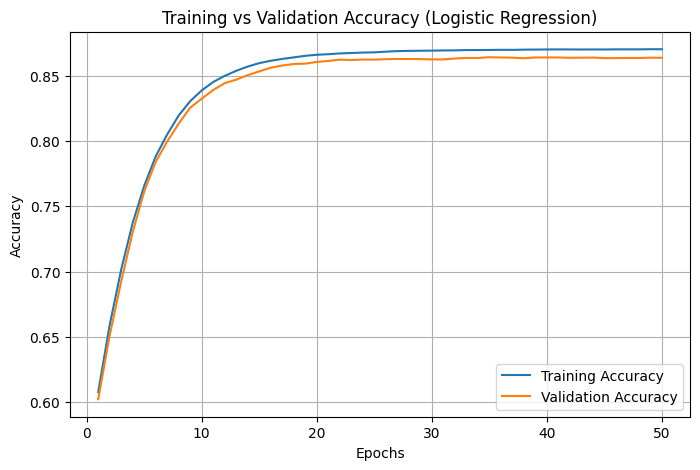

Training with lr=0.01, batch_size=1024, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.6060 | Val Acc: 0.6008
Epoch 2/30
  Train Acc: 0.6561 | Val Acc: 0.6484
Epoch 3/30
  Train Acc: 0.6975 | Val Acc: 0.6888
Epoch 4/30
  Train Acc: 0.7324 | Val Acc: 0.7254
Epoch 5/30
  Train Acc: 0.7611 | Val Acc: 0.7551
Epoch 6/30
  Train Acc: 0.7835 | Val Acc: 0.7794
Epoch 7/30
  Train Acc: 0.8007 | Val Acc: 0.7959
Epoch 8/30
  Train Acc: 0.8151 | Val Acc: 0.8094
Epoch 9/30
  Train Acc: 0.8267 | Val Acc: 0.8210
Epoch 10/30
  Train Acc: 0.8347 | Val Acc: 0.8294
Epoch 11/30
  Train Acc: 0.8417 | Val Acc: 0.8353
Epoch 12/30
  Train Acc: 0.8471 | Val Acc: 0.8413
Epoch 13/30
  Train Acc: 0.8512 | Val Acc: 0.8453
Epoch 14/30
  Train Acc: 0.8542 | Val Acc: 0.8476
Epoch 15/30
  Train Acc: 0.8571 | Val Acc: 0.8512
Epoch 16/30
  Train Acc: 0.8595 | Val Acc: 0.8535
Epoch 17/30
  Train Acc: 0.8612 | Val Acc: 0.8559
Epoch 18/30
  Train Acc: 0.8625 | Val Acc: 0.8576
Epoch 19/30
  Train Acc: 0.8634 | Val Acc: 0.8

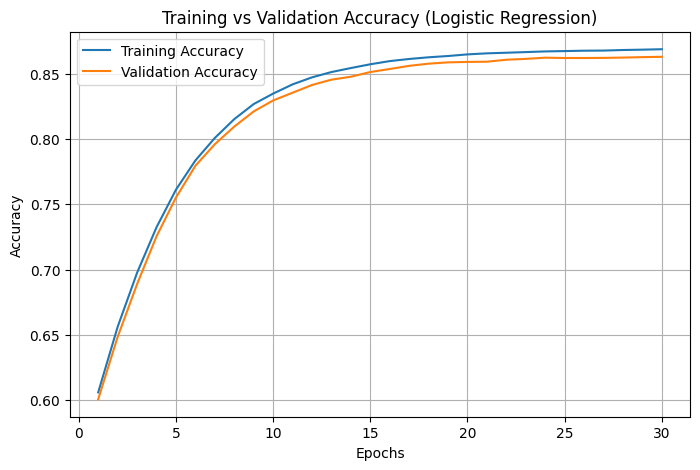

Training with lr=0.01, batch_size=1024, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.6060 | Val Acc: 0.6008
Epoch 2/40
  Train Acc: 0.6561 | Val Acc: 0.6484
Epoch 3/40
  Train Acc: 0.6975 | Val Acc: 0.6888
Epoch 4/40
  Train Acc: 0.7324 | Val Acc: 0.7254
Epoch 5/40
  Train Acc: 0.7611 | Val Acc: 0.7551
Epoch 6/40
  Train Acc: 0.7835 | Val Acc: 0.7794
Epoch 7/40
  Train Acc: 0.8007 | Val Acc: 0.7959
Epoch 8/40
  Train Acc: 0.8151 | Val Acc: 0.8094
Epoch 9/40
  Train Acc: 0.8267 | Val Acc: 0.8210
Epoch 10/40
  Train Acc: 0.8347 | Val Acc: 0.8294
Epoch 11/40
  Train Acc: 0.8417 | Val Acc: 0.8353
Epoch 12/40
  Train Acc: 0.8471 | Val Acc: 0.8413
Epoch 13/40
  Train Acc: 0.8512 | Val Acc: 0.8453
Epoch 14/40
  Train Acc: 0.8542 | Val Acc: 0.8476
Epoch 15/40
  Train Acc: 0.8571 | Val Acc: 0.8512
Epoch 16/40
  Train Acc: 0.8595 | Val Acc: 0.8535
Epoch 17/40
  Train Acc: 0.8612 | Val Acc: 0.8559
Epoch 18/40
  Train Acc: 0.8625 | Val Acc: 0.8576
Epoch 19/40
  Train Acc: 0.8634 | Val Acc: 0.8

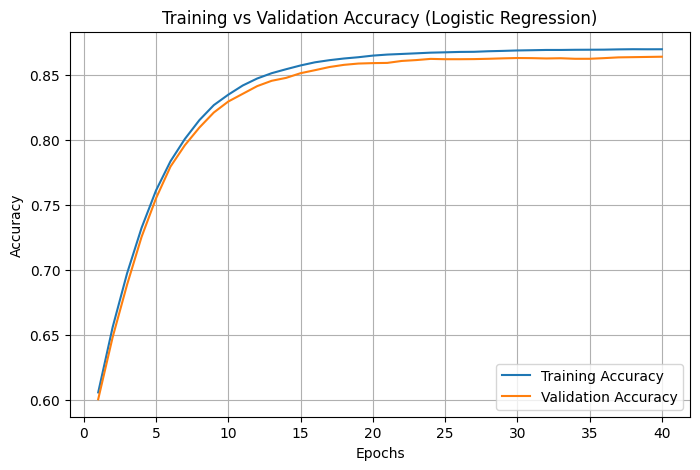

Training with lr=0.01, batch_size=1024, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.6060 | Val Acc: 0.6008
Epoch 2/50
  Train Acc: 0.6561 | Val Acc: 0.6484
Epoch 3/50
  Train Acc: 0.6975 | Val Acc: 0.6888
Epoch 4/50
  Train Acc: 0.7324 | Val Acc: 0.7254
Epoch 5/50
  Train Acc: 0.7611 | Val Acc: 0.7551
Epoch 6/50
  Train Acc: 0.7835 | Val Acc: 0.7794
Epoch 7/50
  Train Acc: 0.8007 | Val Acc: 0.7959
Epoch 8/50
  Train Acc: 0.8151 | Val Acc: 0.8094
Epoch 9/50
  Train Acc: 0.8267 | Val Acc: 0.8210
Epoch 10/50
  Train Acc: 0.8347 | Val Acc: 0.8294
Epoch 11/50
  Train Acc: 0.8417 | Val Acc: 0.8353
Epoch 12/50
  Train Acc: 0.8471 | Val Acc: 0.8413
Epoch 13/50
  Train Acc: 0.8512 | Val Acc: 0.8453
Epoch 14/50
  Train Acc: 0.8542 | Val Acc: 0.8476
Epoch 15/50
  Train Acc: 0.8571 | Val Acc: 0.8512
Epoch 16/50
  Train Acc: 0.8595 | Val Acc: 0.8535
Epoch 17/50
  Train Acc: 0.8612 | Val Acc: 0.8559
Epoch 18/50
  Train Acc: 0.8625 | Val Acc: 0.8576
Epoch 19/50
  Train Acc: 0.8634 | Val Acc: 0.8

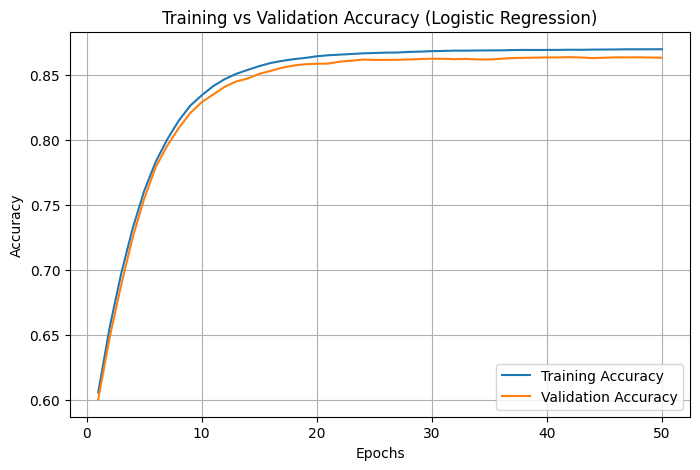

Training with lr=0.01, batch_size=2048, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.6158 | Val Acc: 0.6100
Epoch 2/30
  Train Acc: 0.6425 | Val Acc: 0.6354
Epoch 3/30
  Train Acc: 0.6667 | Val Acc: 0.6575
Epoch 4/30
  Train Acc: 0.6890 | Val Acc: 0.6803
Epoch 5/30
  Train Acc: 0.7095 | Val Acc: 0.7011
Epoch 6/30
  Train Acc: 0.7277 | Val Acc: 0.7214
Epoch 7/30
  Train Acc: 0.7447 | Val Acc: 0.7378
Epoch 8/30
  Train Acc: 0.7590 | Val Acc: 0.7538
Epoch 9/30
  Train Acc: 0.7719 | Val Acc: 0.7673
Epoch 10/30
  Train Acc: 0.7835 | Val Acc: 0.7797
Epoch 11/30
  Train Acc: 0.7934 | Val Acc: 0.7899
Epoch 12/30
  Train Acc: 0.8020 | Val Acc: 0.7978
Epoch 13/30
  Train Acc: 0.8098 | Val Acc: 0.8046
Epoch 14/30
  Train Acc: 0.8171 | Val Acc: 0.8112
Epoch 15/30
  Train Acc: 0.8237 | Val Acc: 0.8193
Epoch 16/30
  Train Acc: 0.8290 | Val Acc: 0.8236
Epoch 17/30
  Train Acc: 0.8335 | Val Acc: 0.8281
Epoch 18/30
  Train Acc: 0.8377 | Val Acc: 0.8323
Epoch 19/30
  Train Acc: 0.8414 | Val Acc: 0

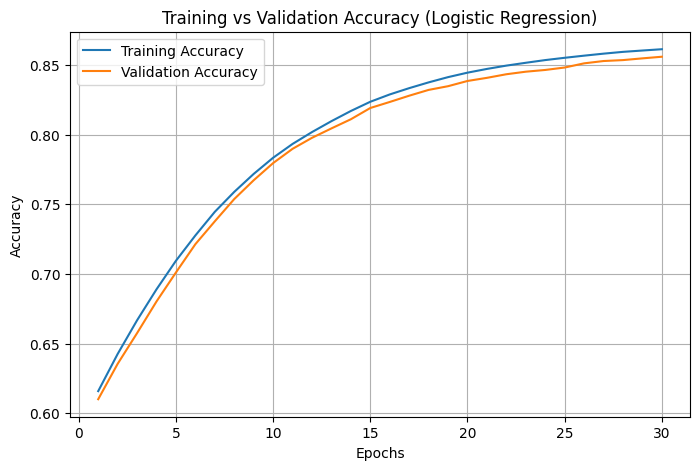

Training with lr=0.01, batch_size=2048, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.6158 | Val Acc: 0.6100
Epoch 2/40
  Train Acc: 0.6425 | Val Acc: 0.6354
Epoch 3/40
  Train Acc: 0.6667 | Val Acc: 0.6575
Epoch 4/40
  Train Acc: 0.6890 | Val Acc: 0.6803
Epoch 5/40
  Train Acc: 0.7095 | Val Acc: 0.7011
Epoch 6/40
  Train Acc: 0.7277 | Val Acc: 0.7214
Epoch 7/40
  Train Acc: 0.7447 | Val Acc: 0.7378
Epoch 8/40
  Train Acc: 0.7590 | Val Acc: 0.7538
Epoch 9/40
  Train Acc: 0.7719 | Val Acc: 0.7673
Epoch 10/40
  Train Acc: 0.7835 | Val Acc: 0.7797
Epoch 11/40
  Train Acc: 0.7934 | Val Acc: 0.7899
Epoch 12/40
  Train Acc: 0.8020 | Val Acc: 0.7978
Epoch 13/40
  Train Acc: 0.8098 | Val Acc: 0.8046
Epoch 14/40
  Train Acc: 0.8171 | Val Acc: 0.8112
Epoch 15/40
  Train Acc: 0.8237 | Val Acc: 0.8193
Epoch 16/40
  Train Acc: 0.8290 | Val Acc: 0.8236
Epoch 17/40
  Train Acc: 0.8335 | Val Acc: 0.8281
Epoch 18/40
  Train Acc: 0.8377 | Val Acc: 0.8323
Epoch 19/40
  Train Acc: 0.8414 | Val Acc: 0

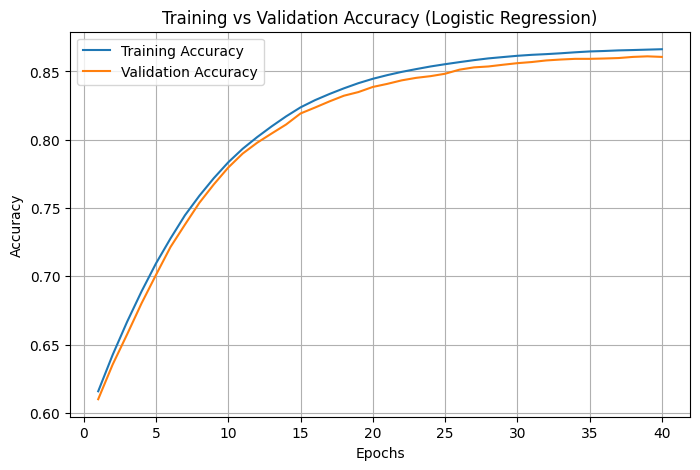

Training with lr=0.01, batch_size=2048, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.6158 | Val Acc: 0.6100
Epoch 2/50
  Train Acc: 0.6425 | Val Acc: 0.6354
Epoch 3/50
  Train Acc: 0.6667 | Val Acc: 0.6575
Epoch 4/50
  Train Acc: 0.6890 | Val Acc: 0.6803
Epoch 5/50
  Train Acc: 0.7095 | Val Acc: 0.7011
Epoch 6/50
  Train Acc: 0.7277 | Val Acc: 0.7214
Epoch 7/50
  Train Acc: 0.7447 | Val Acc: 0.7378
Epoch 8/50
  Train Acc: 0.7590 | Val Acc: 0.7538
Epoch 9/50
  Train Acc: 0.7719 | Val Acc: 0.7673
Epoch 10/50
  Train Acc: 0.7835 | Val Acc: 0.7797
Epoch 11/50
  Train Acc: 0.7934 | Val Acc: 0.7899
Epoch 12/50
  Train Acc: 0.8020 | Val Acc: 0.7978
Epoch 13/50
  Train Acc: 0.8098 | Val Acc: 0.8046
Epoch 14/50
  Train Acc: 0.8171 | Val Acc: 0.8112
Epoch 15/50
  Train Acc: 0.8237 | Val Acc: 0.8193
Epoch 16/50
  Train Acc: 0.8290 | Val Acc: 0.8236
Epoch 17/50
  Train Acc: 0.8335 | Val Acc: 0.8281
Epoch 18/50
  Train Acc: 0.8377 | Val Acc: 0.8323
Epoch 19/50
  Train Acc: 0.8414 | Val Acc: 0

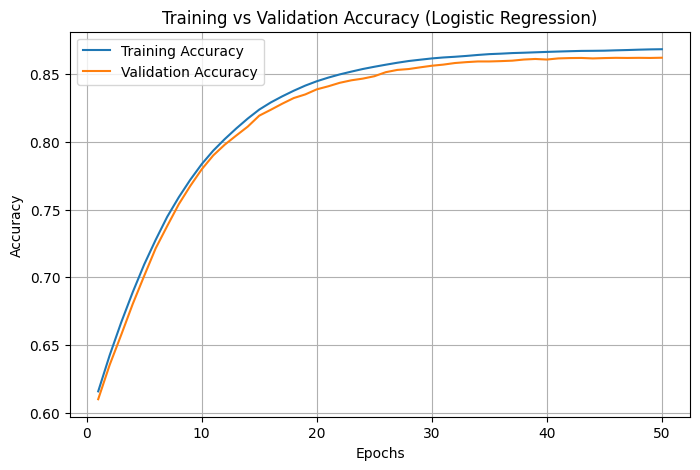

Training with lr=0.01, batch_size=2048, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.6157 | Val Acc: 0.6098
Epoch 2/30
  Train Acc: 0.6423 | Val Acc: 0.6354
Epoch 3/30
  Train Acc: 0.6665 | Val Acc: 0.6573
Epoch 4/30
  Train Acc: 0.6887 | Val Acc: 0.6797
Epoch 5/30
  Train Acc: 0.7091 | Val Acc: 0.7004
Epoch 6/30
  Train Acc: 0.7273 | Val Acc: 0.7209
Epoch 7/30
  Train Acc: 0.7443 | Val Acc: 0.7372
Epoch 8/30
  Train Acc: 0.7586 | Val Acc: 0.7537
Epoch 9/30
  Train Acc: 0.7715 | Val Acc: 0.7670
Epoch 10/30
  Train Acc: 0.7832 | Val Acc: 0.7791
Epoch 11/30
  Train Acc: 0.7931 | Val Acc: 0.7896
Epoch 12/30
  Train Acc: 0.8016 | Val Acc: 0.7977
Epoch 13/30
  Train Acc: 0.8095 | Val Acc: 0.8041
Epoch 14/30
  Train Acc: 0.8168 | Val Acc: 0.8108
Epoch 15/30
  Train Acc: 0.8233 | Val Acc: 0.8188
Epoch 16/30
  Train Acc: 0.8286 | Val Acc: 0.8234
Epoch 17/30
  Train Acc: 0.8331 | Val Acc: 0.8274
Epoch 18/30
  Train Acc: 0.8373 | Val Acc: 0.8318
Epoch 19/30
  Train Acc: 0.8411 | Val Acc: 0.

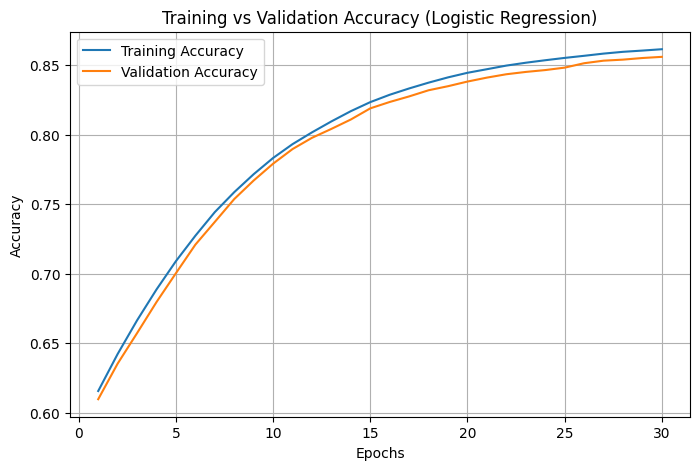

Training with lr=0.01, batch_size=2048, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.6157 | Val Acc: 0.6098
Epoch 2/40
  Train Acc: 0.6423 | Val Acc: 0.6354
Epoch 3/40
  Train Acc: 0.6665 | Val Acc: 0.6573
Epoch 4/40
  Train Acc: 0.6887 | Val Acc: 0.6797
Epoch 5/40
  Train Acc: 0.7091 | Val Acc: 0.7004
Epoch 6/40
  Train Acc: 0.7273 | Val Acc: 0.7209
Epoch 7/40
  Train Acc: 0.7443 | Val Acc: 0.7372
Epoch 8/40
  Train Acc: 0.7586 | Val Acc: 0.7537
Epoch 9/40
  Train Acc: 0.7715 | Val Acc: 0.7670
Epoch 10/40
  Train Acc: 0.7832 | Val Acc: 0.7791
Epoch 11/40
  Train Acc: 0.7931 | Val Acc: 0.7896
Epoch 12/40
  Train Acc: 0.8016 | Val Acc: 0.7977
Epoch 13/40
  Train Acc: 0.8095 | Val Acc: 0.8041
Epoch 14/40
  Train Acc: 0.8168 | Val Acc: 0.8108
Epoch 15/40
  Train Acc: 0.8233 | Val Acc: 0.8188
Epoch 16/40
  Train Acc: 0.8286 | Val Acc: 0.8234
Epoch 17/40
  Train Acc: 0.8331 | Val Acc: 0.8274
Epoch 18/40
  Train Acc: 0.8373 | Val Acc: 0.8318
Epoch 19/40
  Train Acc: 0.8411 | Val Acc: 0.

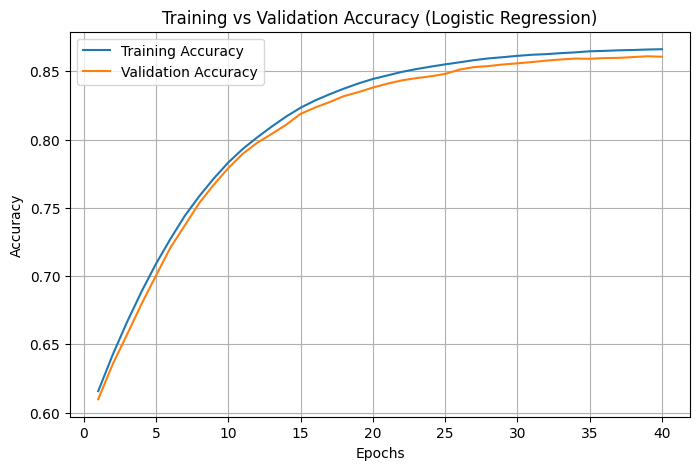

Training with lr=0.01, batch_size=2048, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.6157 | Val Acc: 0.6098
Epoch 2/50
  Train Acc: 0.6423 | Val Acc: 0.6354
Epoch 3/50
  Train Acc: 0.6665 | Val Acc: 0.6573
Epoch 4/50
  Train Acc: 0.6887 | Val Acc: 0.6797
Epoch 5/50
  Train Acc: 0.7091 | Val Acc: 0.7004
Epoch 6/50
  Train Acc: 0.7273 | Val Acc: 0.7209
Epoch 7/50
  Train Acc: 0.7443 | Val Acc: 0.7372
Epoch 8/50
  Train Acc: 0.7586 | Val Acc: 0.7537
Epoch 9/50
  Train Acc: 0.7715 | Val Acc: 0.7670
Epoch 10/50
  Train Acc: 0.7832 | Val Acc: 0.7791
Epoch 11/50
  Train Acc: 0.7931 | Val Acc: 0.7896
Epoch 12/50
  Train Acc: 0.8016 | Val Acc: 0.7977
Epoch 13/50
  Train Acc: 0.8095 | Val Acc: 0.8041
Epoch 14/50
  Train Acc: 0.8168 | Val Acc: 0.8108
Epoch 15/50
  Train Acc: 0.8233 | Val Acc: 0.8188
Epoch 16/50
  Train Acc: 0.8286 | Val Acc: 0.8234
Epoch 17/50
  Train Acc: 0.8331 | Val Acc: 0.8274
Epoch 18/50
  Train Acc: 0.8373 | Val Acc: 0.8318
Epoch 19/50
  Train Acc: 0.8411 | Val Acc: 0.

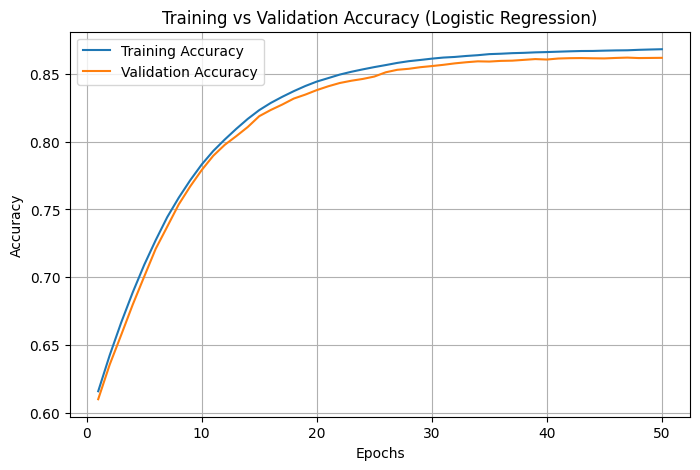

Training with lr=0.01, batch_size=2048, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.6148 | Val Acc: 0.6091
Epoch 2/30
  Train Acc: 0.6408 | Val Acc: 0.6338
Epoch 3/30
  Train Acc: 0.6645 | Val Acc: 0.6550
Epoch 4/30
  Train Acc: 0.6861 | Val Acc: 0.6777
Epoch 5/30
  Train Acc: 0.7057 | Val Acc: 0.6969
Epoch 6/30
  Train Acc: 0.7241 | Val Acc: 0.7175
Epoch 7/30
  Train Acc: 0.7403 | Val Acc: 0.7340
Epoch 8/30
  Train Acc: 0.7549 | Val Acc: 0.7482
Epoch 9/30
  Train Acc: 0.7676 | Val Acc: 0.7628
Epoch 10/30
  Train Acc: 0.7790 | Val Acc: 0.7742
Epoch 11/30
  Train Acc: 0.7894 | Val Acc: 0.7861
Epoch 12/30
  Train Acc: 0.7981 | Val Acc: 0.7942
Epoch 13/30
  Train Acc: 0.8055 | Val Acc: 0.7993
Epoch 14/30
  Train Acc: 0.8129 | Val Acc: 0.8073
Epoch 15/30
  Train Acc: 0.8193 | Val Acc: 0.8147
Epoch 16/30
  Train Acc: 0.8251 | Val Acc: 0.8203
Epoch 17/30
  Train Acc: 0.8300 | Val Acc: 0.8244
Epoch 18/30
  Train Acc: 0.8343 | Val Acc: 0.8284
Epoch 19/30
  Train Acc: 0.8380 | Val Acc: 0.8

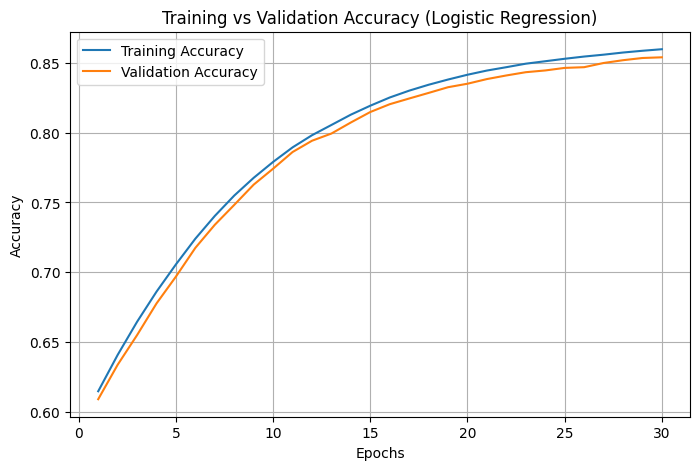

Training with lr=0.01, batch_size=2048, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.6148 | Val Acc: 0.6091
Epoch 2/40
  Train Acc: 0.6408 | Val Acc: 0.6338
Epoch 3/40
  Train Acc: 0.6645 | Val Acc: 0.6550
Epoch 4/40
  Train Acc: 0.6861 | Val Acc: 0.6777
Epoch 5/40
  Train Acc: 0.7057 | Val Acc: 0.6969
Epoch 6/40
  Train Acc: 0.7241 | Val Acc: 0.7175
Epoch 7/40
  Train Acc: 0.7403 | Val Acc: 0.7340
Epoch 8/40
  Train Acc: 0.7549 | Val Acc: 0.7482
Epoch 9/40
  Train Acc: 0.7676 | Val Acc: 0.7628
Epoch 10/40
  Train Acc: 0.7790 | Val Acc: 0.7742
Epoch 11/40
  Train Acc: 0.7894 | Val Acc: 0.7861
Epoch 12/40
  Train Acc: 0.7981 | Val Acc: 0.7942
Epoch 13/40
  Train Acc: 0.8055 | Val Acc: 0.7993
Epoch 14/40
  Train Acc: 0.8129 | Val Acc: 0.8073
Epoch 15/40
  Train Acc: 0.8193 | Val Acc: 0.8147
Epoch 16/40
  Train Acc: 0.8251 | Val Acc: 0.8203
Epoch 17/40
  Train Acc: 0.8300 | Val Acc: 0.8244
Epoch 18/40
  Train Acc: 0.8343 | Val Acc: 0.8284
Epoch 19/40
  Train Acc: 0.8380 | Val Acc: 0.8

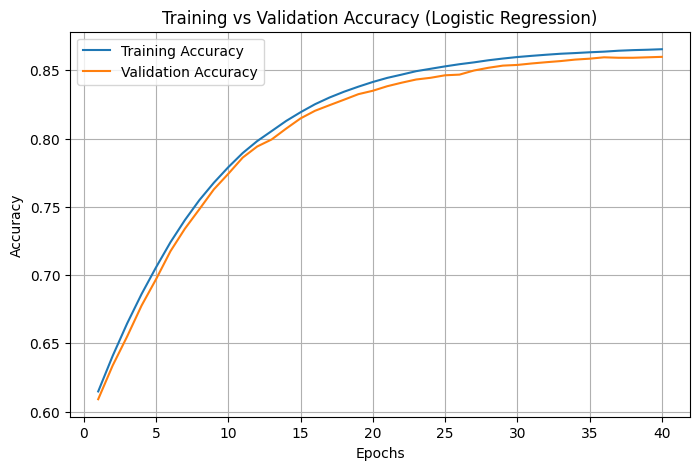

Training with lr=0.01, batch_size=2048, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.6148 | Val Acc: 0.6091
Epoch 2/50
  Train Acc: 0.6408 | Val Acc: 0.6338
Epoch 3/50
  Train Acc: 0.6645 | Val Acc: 0.6550
Epoch 4/50
  Train Acc: 0.6861 | Val Acc: 0.6777
Epoch 5/50
  Train Acc: 0.7057 | Val Acc: 0.6969
Epoch 6/50
  Train Acc: 0.7241 | Val Acc: 0.7175
Epoch 7/50
  Train Acc: 0.7403 | Val Acc: 0.7340
Epoch 8/50
  Train Acc: 0.7549 | Val Acc: 0.7482
Epoch 9/50
  Train Acc: 0.7676 | Val Acc: 0.7628
Epoch 10/50
  Train Acc: 0.7790 | Val Acc: 0.7742
Epoch 11/50
  Train Acc: 0.7894 | Val Acc: 0.7861
Epoch 12/50
  Train Acc: 0.7981 | Val Acc: 0.7942
Epoch 13/50
  Train Acc: 0.8055 | Val Acc: 0.7993
Epoch 14/50
  Train Acc: 0.8129 | Val Acc: 0.8073
Epoch 15/50
  Train Acc: 0.8193 | Val Acc: 0.8147
Epoch 16/50
  Train Acc: 0.8251 | Val Acc: 0.8203
Epoch 17/50
  Train Acc: 0.8300 | Val Acc: 0.8244
Epoch 18/50
  Train Acc: 0.8343 | Val Acc: 0.8284
Epoch 19/50
  Train Acc: 0.8380 | Val Acc: 0.8

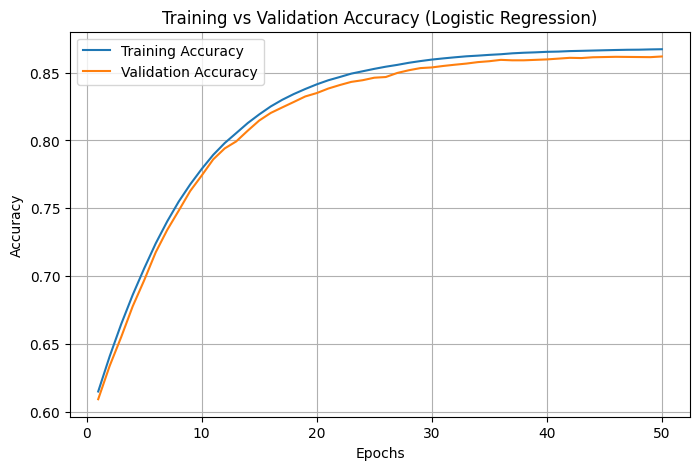

Training with lr=0.05, batch_size=512, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.8386 | Val Acc: 0.8332
Epoch 2/30
  Train Acc: 0.8658 | Val Acc: 0.8613
Epoch 3/30
  Train Acc: 0.8702 | Val Acc: 0.8640
Epoch 4/30
  Train Acc: 0.8708 | Val Acc: 0.8645
Epoch 5/30
  Train Acc: 0.8708 | Val Acc: 0.8648
Epoch 6/30
  Train Acc: 0.8710 | Val Acc: 0.8647
Epoch 7/30
  Train Acc: 0.8711 | Val Acc: 0.8647
Epoch 8/30
  Train Acc: 0.8712 | Val Acc: 0.8648
Epoch 9/30
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 10/30
  Train Acc: 0.8710 | Val Acc: 0.8650
Epoch 11/30
  Train Acc: 0.8709 | Val Acc: 0.8655
Epoch 12/30
  Train Acc: 0.8710 | Val Acc: 0.8659
Epoch 13/30
  Train Acc: 0.8711 | Val Acc: 0.8657
Epoch 14/30
  Train Acc: 0.8711 | Val Acc: 0.8660
Epoch 15/30
  Train Acc: 0.8711 | Val Acc: 0.8661
Epoch 16/30
  Train Acc: 0.8711 | Val Acc: 0.8662
Epoch 17/30
  Train Acc: 0.8712 | Val Acc: 0.8663
Epoch 18/30
  Train Acc: 0.8713 | Val Acc: 0.8666
Epoch 19/30
  Train Acc: 0.8714 | Val Acc: 0.

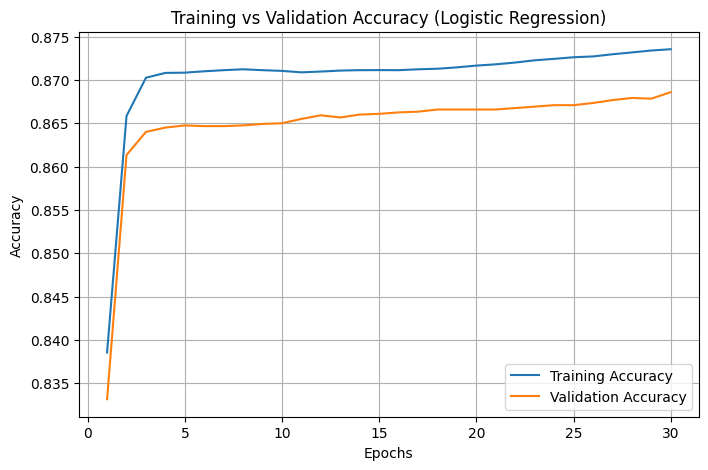

Training with lr=0.05, batch_size=512, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.8386 | Val Acc: 0.8332
Epoch 2/40
  Train Acc: 0.8658 | Val Acc: 0.8613
Epoch 3/40
  Train Acc: 0.8702 | Val Acc: 0.8640
Epoch 4/40
  Train Acc: 0.8708 | Val Acc: 0.8645
Epoch 5/40
  Train Acc: 0.8708 | Val Acc: 0.8648
Epoch 6/40
  Train Acc: 0.8710 | Val Acc: 0.8647
Epoch 7/40
  Train Acc: 0.8711 | Val Acc: 0.8647
Epoch 8/40
  Train Acc: 0.8712 | Val Acc: 0.8648
Epoch 9/40
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 10/40
  Train Acc: 0.8710 | Val Acc: 0.8650
Epoch 11/40
  Train Acc: 0.8709 | Val Acc: 0.8655
Epoch 12/40
  Train Acc: 0.8710 | Val Acc: 0.8659
Epoch 13/40
  Train Acc: 0.8711 | Val Acc: 0.8657
Epoch 14/40
  Train Acc: 0.8711 | Val Acc: 0.8660
Epoch 15/40
  Train Acc: 0.8711 | Val Acc: 0.8661
Epoch 16/40
  Train Acc: 0.8711 | Val Acc: 0.8662
Epoch 17/40
  Train Acc: 0.8712 | Val Acc: 0.8663
Epoch 18/40
  Train Acc: 0.8713 | Val Acc: 0.8666
Epoch 19/40
  Train Acc: 0.8714 | Val Acc: 0.

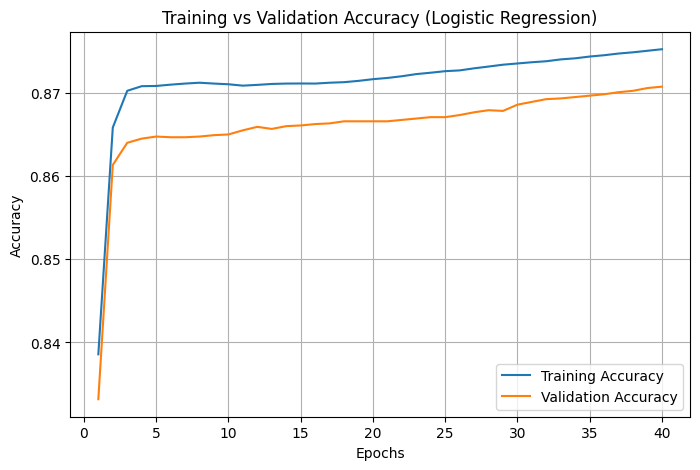

Training with lr=0.05, batch_size=512, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.8386 | Val Acc: 0.8332
Epoch 2/50
  Train Acc: 0.8658 | Val Acc: 0.8613
Epoch 3/50
  Train Acc: 0.8702 | Val Acc: 0.8640
Epoch 4/50
  Train Acc: 0.8708 | Val Acc: 0.8645
Epoch 5/50
  Train Acc: 0.8708 | Val Acc: 0.8648
Epoch 6/50
  Train Acc: 0.8710 | Val Acc: 0.8647
Epoch 7/50
  Train Acc: 0.8711 | Val Acc: 0.8647
Epoch 8/50
  Train Acc: 0.8712 | Val Acc: 0.8648
Epoch 9/50
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 10/50
  Train Acc: 0.8710 | Val Acc: 0.8650
Epoch 11/50
  Train Acc: 0.8709 | Val Acc: 0.8655
Epoch 12/50
  Train Acc: 0.8710 | Val Acc: 0.8659
Epoch 13/50
  Train Acc: 0.8711 | Val Acc: 0.8657
Epoch 14/50
  Train Acc: 0.8711 | Val Acc: 0.8660
Epoch 15/50
  Train Acc: 0.8711 | Val Acc: 0.8661
Epoch 16/50
  Train Acc: 0.8711 | Val Acc: 0.8662
Epoch 17/50
  Train Acc: 0.8712 | Val Acc: 0.8663
Epoch 18/50
  Train Acc: 0.8713 | Val Acc: 0.8666
Epoch 19/50
  Train Acc: 0.8714 | Val Acc: 0.

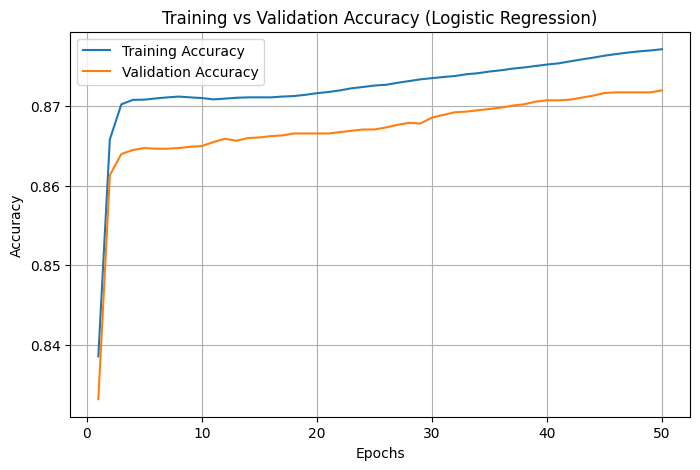

Training with lr=0.05, batch_size=512, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.8381 | Val Acc: 0.8327
Epoch 2/30
  Train Acc: 0.8657 | Val Acc: 0.8613
Epoch 3/30
  Train Acc: 0.8702 | Val Acc: 0.8639
Epoch 4/30
  Train Acc: 0.8708 | Val Acc: 0.8643
Epoch 5/30
  Train Acc: 0.8709 | Val Acc: 0.8649
Epoch 6/30
  Train Acc: 0.8709 | Val Acc: 0.8649
Epoch 7/30
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 8/30
  Train Acc: 0.8712 | Val Acc: 0.8647
Epoch 9/30
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 10/30
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 11/30
  Train Acc: 0.8710 | Val Acc: 0.8652
Epoch 12/30
  Train Acc: 0.8709 | Val Acc: 0.8658
Epoch 13/30
  Train Acc: 0.8711 | Val Acc: 0.8658
Epoch 14/30
  Train Acc: 0.8711 | Val Acc: 0.8661
Epoch 15/30
  Train Acc: 0.8712 | Val Acc: 0.8661
Epoch 16/30
  Train Acc: 0.8712 | Val Acc: 0.8662
Epoch 17/30
  Train Acc: 0.8712 | Val Acc: 0.8664
Epoch 18/30
  Train Acc: 0.8713 | Val Acc: 0.8664
Epoch 19/30
  Train Acc: 0.8714 | Val Acc: 0.8

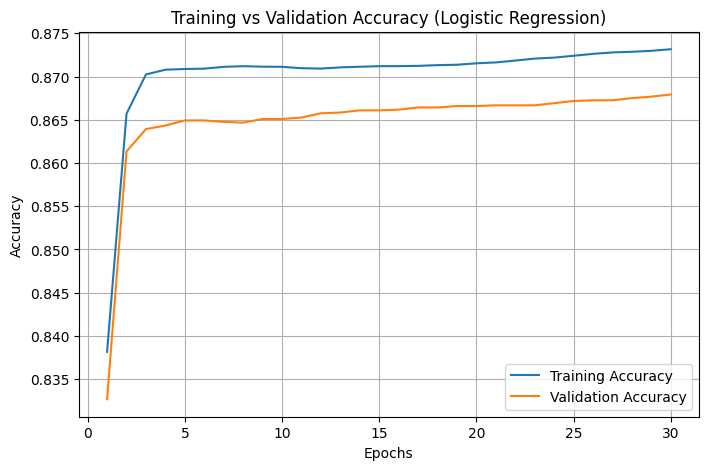

Training with lr=0.05, batch_size=512, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.8381 | Val Acc: 0.8327
Epoch 2/40
  Train Acc: 0.8657 | Val Acc: 0.8613
Epoch 3/40
  Train Acc: 0.8702 | Val Acc: 0.8639
Epoch 4/40
  Train Acc: 0.8708 | Val Acc: 0.8643
Epoch 5/40
  Train Acc: 0.8709 | Val Acc: 0.8649
Epoch 6/40
  Train Acc: 0.8709 | Val Acc: 0.8649
Epoch 7/40
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 8/40
  Train Acc: 0.8712 | Val Acc: 0.8647
Epoch 9/40
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 10/40
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 11/40
  Train Acc: 0.8710 | Val Acc: 0.8652
Epoch 12/40
  Train Acc: 0.8709 | Val Acc: 0.8658
Epoch 13/40
  Train Acc: 0.8711 | Val Acc: 0.8658
Epoch 14/40
  Train Acc: 0.8711 | Val Acc: 0.8661
Epoch 15/40
  Train Acc: 0.8712 | Val Acc: 0.8661
Epoch 16/40
  Train Acc: 0.8712 | Val Acc: 0.8662
Epoch 17/40
  Train Acc: 0.8712 | Val Acc: 0.8664
Epoch 18/40
  Train Acc: 0.8713 | Val Acc: 0.8664
Epoch 19/40
  Train Acc: 0.8714 | Val Acc: 0.8

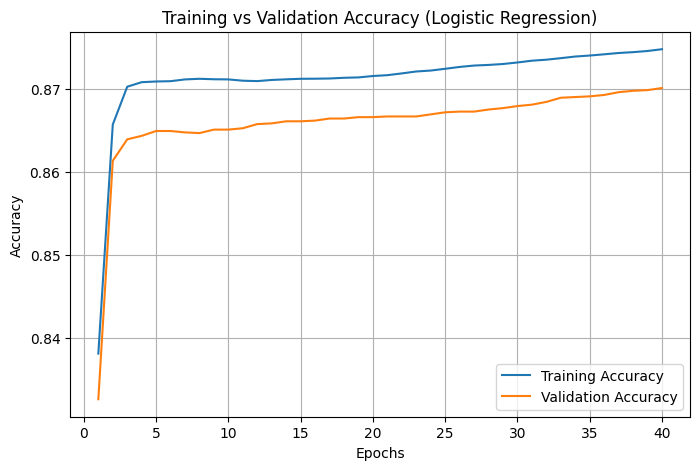

Training with lr=0.05, batch_size=512, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.8381 | Val Acc: 0.8327
Epoch 2/50
  Train Acc: 0.8657 | Val Acc: 0.8613
Epoch 3/50
  Train Acc: 0.8702 | Val Acc: 0.8639
Epoch 4/50
  Train Acc: 0.8708 | Val Acc: 0.8643
Epoch 5/50
  Train Acc: 0.8709 | Val Acc: 0.8649
Epoch 6/50
  Train Acc: 0.8709 | Val Acc: 0.8649
Epoch 7/50
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 8/50
  Train Acc: 0.8712 | Val Acc: 0.8647
Epoch 9/50
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 10/50
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 11/50
  Train Acc: 0.8710 | Val Acc: 0.8652
Epoch 12/50
  Train Acc: 0.8709 | Val Acc: 0.8658
Epoch 13/50
  Train Acc: 0.8711 | Val Acc: 0.8658
Epoch 14/50
  Train Acc: 0.8711 | Val Acc: 0.8661
Epoch 15/50
  Train Acc: 0.8712 | Val Acc: 0.8661
Epoch 16/50
  Train Acc: 0.8712 | Val Acc: 0.8662
Epoch 17/50
  Train Acc: 0.8712 | Val Acc: 0.8664
Epoch 18/50
  Train Acc: 0.8713 | Val Acc: 0.8664
Epoch 19/50
  Train Acc: 0.8714 | Val Acc: 0.8

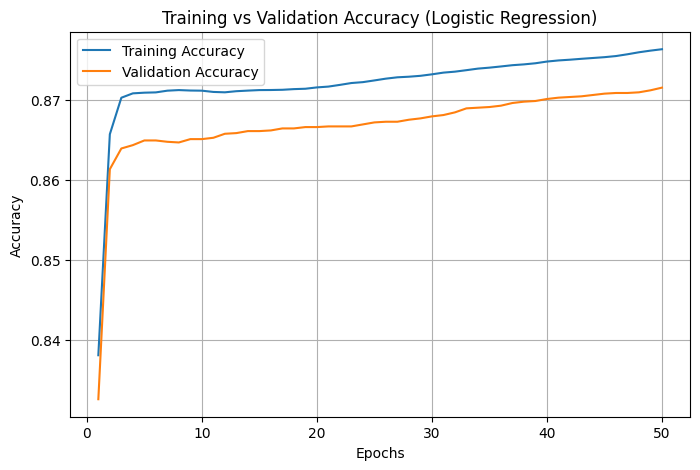

Training with lr=0.05, batch_size=512, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.8342 | Val Acc: 0.8279
Epoch 2/30
  Train Acc: 0.8640 | Val Acc: 0.8596
Epoch 3/30
  Train Acc: 0.8694 | Val Acc: 0.8642
Epoch 4/30
  Train Acc: 0.8705 | Val Acc: 0.8639
Epoch 5/30
  Train Acc: 0.8708 | Val Acc: 0.8646
Epoch 6/30
  Train Acc: 0.8711 | Val Acc: 0.8645
Epoch 7/30
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 8/30
  Train Acc: 0.8710 | Val Acc: 0.8646
Epoch 9/30
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 10/30
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 11/30
  Train Acc: 0.8715 | Val Acc: 0.8651
Epoch 12/30
  Train Acc: 0.8715 | Val Acc: 0.8652
Epoch 13/30
  Train Acc: 0.8716 | Val Acc: 0.8657
Epoch 14/30
  Train Acc: 0.8717 | Val Acc: 0.8656
Epoch 15/30
  Train Acc: 0.8718 | Val Acc: 0.8656
Epoch 16/30
  Train Acc: 0.8717 | Val Acc: 0.8654
Epoch 17/30
  Train Acc: 0.8717 | Val Acc: 0.8655
Epoch 18/30
  Train Acc: 0.8718 | Val Acc: 0.8658
Epoch 19/30
  Train Acc: 0.8718 | Val Acc: 0.86

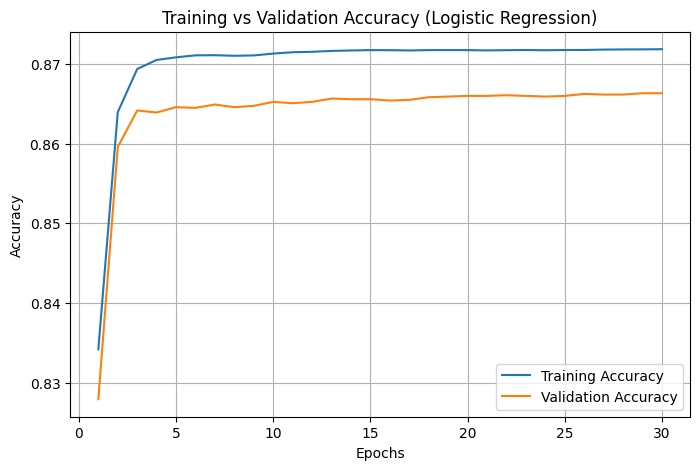

Training with lr=0.05, batch_size=512, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.8342 | Val Acc: 0.8279
Epoch 2/40
  Train Acc: 0.8640 | Val Acc: 0.8596
Epoch 3/40
  Train Acc: 0.8694 | Val Acc: 0.8642
Epoch 4/40
  Train Acc: 0.8705 | Val Acc: 0.8639
Epoch 5/40
  Train Acc: 0.8708 | Val Acc: 0.8646
Epoch 6/40
  Train Acc: 0.8711 | Val Acc: 0.8645
Epoch 7/40
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 8/40
  Train Acc: 0.8710 | Val Acc: 0.8646
Epoch 9/40
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 10/40
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 11/40
  Train Acc: 0.8715 | Val Acc: 0.8651
Epoch 12/40
  Train Acc: 0.8715 | Val Acc: 0.8652
Epoch 13/40
  Train Acc: 0.8716 | Val Acc: 0.8657
Epoch 14/40
  Train Acc: 0.8717 | Val Acc: 0.8656
Epoch 15/40
  Train Acc: 0.8718 | Val Acc: 0.8656
Epoch 16/40
  Train Acc: 0.8717 | Val Acc: 0.8654
Epoch 17/40
  Train Acc: 0.8717 | Val Acc: 0.8655
Epoch 18/40
  Train Acc: 0.8718 | Val Acc: 0.8658
Epoch 19/40
  Train Acc: 0.8718 | Val Acc: 0.86

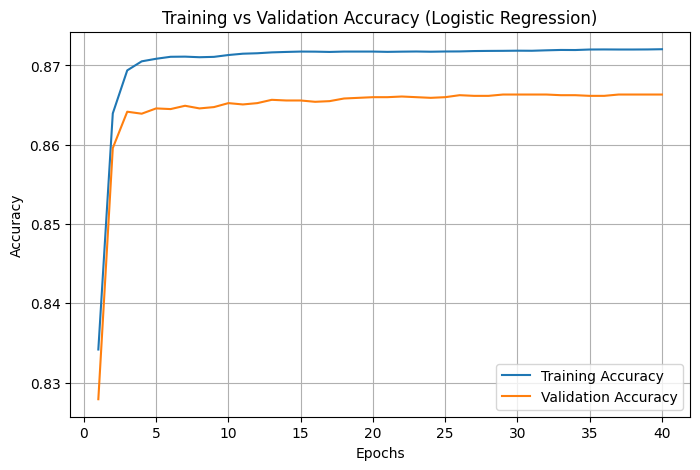

Training with lr=0.05, batch_size=512, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.8342 | Val Acc: 0.8279
Epoch 2/50
  Train Acc: 0.8640 | Val Acc: 0.8596
Epoch 3/50
  Train Acc: 0.8694 | Val Acc: 0.8642
Epoch 4/50
  Train Acc: 0.8705 | Val Acc: 0.8639
Epoch 5/50
  Train Acc: 0.8708 | Val Acc: 0.8646
Epoch 6/50
  Train Acc: 0.8711 | Val Acc: 0.8645
Epoch 7/50
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 8/50
  Train Acc: 0.8710 | Val Acc: 0.8646
Epoch 9/50
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 10/50
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 11/50
  Train Acc: 0.8715 | Val Acc: 0.8651
Epoch 12/50
  Train Acc: 0.8715 | Val Acc: 0.8652
Epoch 13/50
  Train Acc: 0.8716 | Val Acc: 0.8657
Epoch 14/50
  Train Acc: 0.8717 | Val Acc: 0.8656
Epoch 15/50
  Train Acc: 0.8718 | Val Acc: 0.8656
Epoch 16/50
  Train Acc: 0.8717 | Val Acc: 0.8654
Epoch 17/50
  Train Acc: 0.8717 | Val Acc: 0.8655
Epoch 18/50
  Train Acc: 0.8718 | Val Acc: 0.8658
Epoch 19/50
  Train Acc: 0.8718 | Val Acc: 0.86

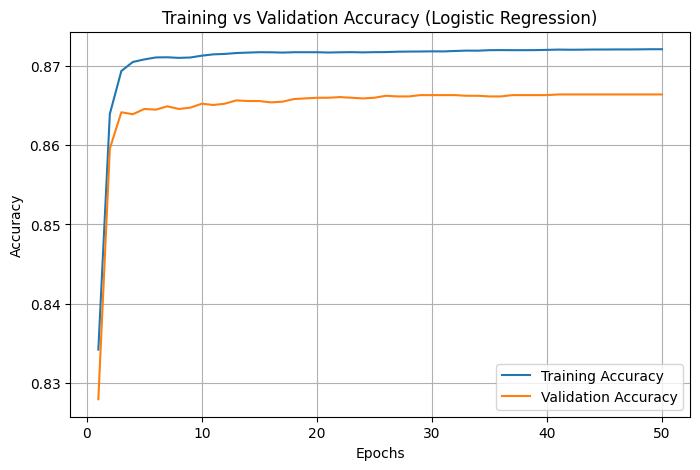

Training with lr=0.05, batch_size=1024, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.7641 | Val Acc: 0.7566
Epoch 2/30
  Train Acc: 0.8426 | Val Acc: 0.8350
Epoch 3/30
  Train Acc: 0.8633 | Val Acc: 0.8590
Epoch 4/30
  Train Acc: 0.8692 | Val Acc: 0.8644
Epoch 5/30
  Train Acc: 0.8713 | Val Acc: 0.8653
Epoch 6/30
  Train Acc: 0.8717 | Val Acc: 0.8660
Epoch 7/30
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 8/30
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/30
  Train Acc: 0.8720 | Val Acc: 0.8656
Epoch 10/30
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 11/30
  Train Acc: 0.8719 | Val Acc: 0.8661
Epoch 12/30
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 13/30
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 14/30
  Train Acc: 0.8715 | Val Acc: 0.8664
Epoch 15/30
  Train Acc: 0.8714 | Val Acc: 0.8661
Epoch 16/30
  Train Acc: 0.8714 | Val Acc: 0.8662
Epoch 17/30
  Train Acc: 0.8713 | Val Acc: 0.8659
Epoch 18/30
  Train Acc: 0.8713 | Val Acc: 0.8656
Epoch 19/30
  Train Acc: 0.8714 | Val Acc: 0

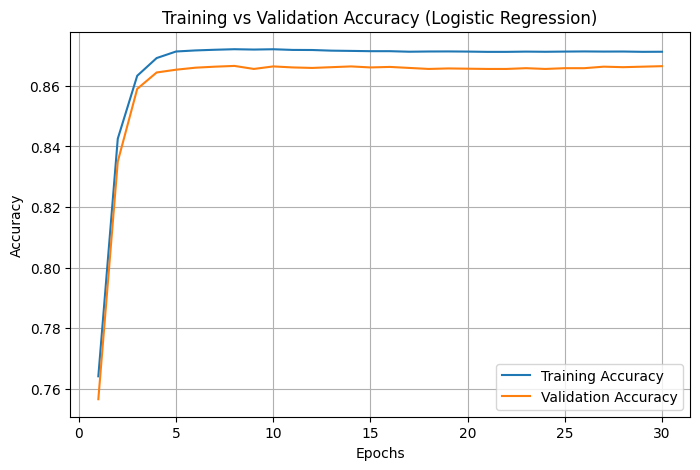

Training with lr=0.05, batch_size=1024, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.7641 | Val Acc: 0.7566
Epoch 2/40
  Train Acc: 0.8426 | Val Acc: 0.8350
Epoch 3/40
  Train Acc: 0.8633 | Val Acc: 0.8590
Epoch 4/40
  Train Acc: 0.8692 | Val Acc: 0.8644
Epoch 5/40
  Train Acc: 0.8713 | Val Acc: 0.8653
Epoch 6/40
  Train Acc: 0.8717 | Val Acc: 0.8660
Epoch 7/40
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 8/40
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/40
  Train Acc: 0.8720 | Val Acc: 0.8656
Epoch 10/40
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 11/40
  Train Acc: 0.8719 | Val Acc: 0.8661
Epoch 12/40
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 13/40
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 14/40
  Train Acc: 0.8715 | Val Acc: 0.8664
Epoch 15/40
  Train Acc: 0.8714 | Val Acc: 0.8661
Epoch 16/40
  Train Acc: 0.8714 | Val Acc: 0.8662
Epoch 17/40
  Train Acc: 0.8713 | Val Acc: 0.8659
Epoch 18/40
  Train Acc: 0.8713 | Val Acc: 0.8656
Epoch 19/40
  Train Acc: 0.8714 | Val Acc: 0

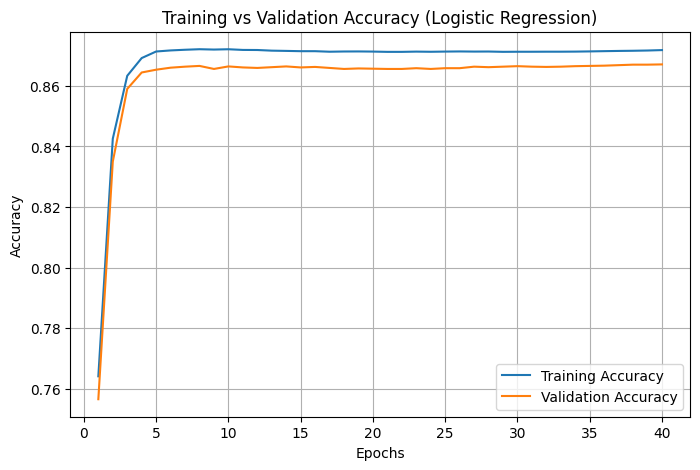

Training with lr=0.05, batch_size=1024, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.7641 | Val Acc: 0.7566
Epoch 2/50
  Train Acc: 0.8426 | Val Acc: 0.8350
Epoch 3/50
  Train Acc: 0.8633 | Val Acc: 0.8590
Epoch 4/50
  Train Acc: 0.8692 | Val Acc: 0.8644
Epoch 5/50
  Train Acc: 0.8713 | Val Acc: 0.8653
Epoch 6/50
  Train Acc: 0.8717 | Val Acc: 0.8660
Epoch 7/50
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 8/50
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/50
  Train Acc: 0.8720 | Val Acc: 0.8656
Epoch 10/50
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 11/50
  Train Acc: 0.8719 | Val Acc: 0.8661
Epoch 12/50
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 13/50
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 14/50
  Train Acc: 0.8715 | Val Acc: 0.8664
Epoch 15/50
  Train Acc: 0.8714 | Val Acc: 0.8661
Epoch 16/50
  Train Acc: 0.8714 | Val Acc: 0.8662
Epoch 17/50
  Train Acc: 0.8713 | Val Acc: 0.8659
Epoch 18/50
  Train Acc: 0.8713 | Val Acc: 0.8656
Epoch 19/50
  Train Acc: 0.8714 | Val Acc: 0

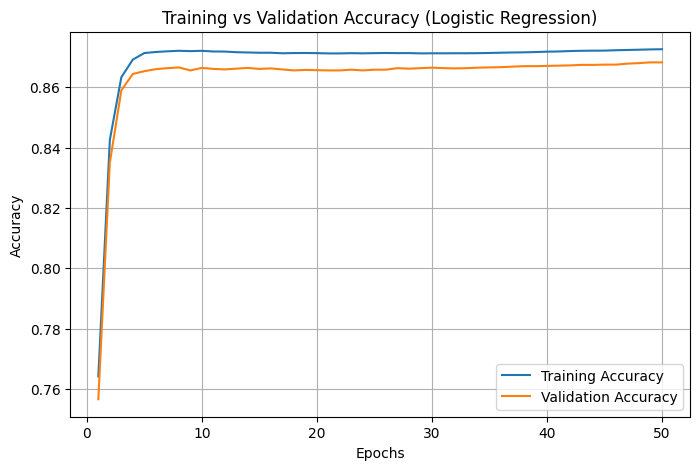

Training with lr=0.05, batch_size=1024, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.7636 | Val Acc: 0.7565
Epoch 2/30
  Train Acc: 0.8422 | Val Acc: 0.8346
Epoch 3/30
  Train Acc: 0.8631 | Val Acc: 0.8589
Epoch 4/30
  Train Acc: 0.8690 | Val Acc: 0.8647
Epoch 5/30
  Train Acc: 0.8714 | Val Acc: 0.8652
Epoch 6/30
  Train Acc: 0.8718 | Val Acc: 0.8661
Epoch 7/30
  Train Acc: 0.8720 | Val Acc: 0.8665
Epoch 8/30
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/30
  Train Acc: 0.8720 | Val Acc: 0.8657
Epoch 10/30
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 11/30
  Train Acc: 0.8718 | Val Acc: 0.8663
Epoch 12/30
  Train Acc: 0.8719 | Val Acc: 0.8661
Epoch 13/30
  Train Acc: 0.8717 | Val Acc: 0.8661
Epoch 14/30
  Train Acc: 0.8716 | Val Acc: 0.8664
Epoch 15/30
  Train Acc: 0.8715 | Val Acc: 0.8663
Epoch 16/30
  Train Acc: 0.8715 | Val Acc: 0.8662
Epoch 17/30
  Train Acc: 0.8713 | Val Acc: 0.8659
Epoch 18/30
  Train Acc: 0.8714 | Val Acc: 0.8658
Epoch 19/30
  Train Acc: 0.8713 | Val Acc: 0.

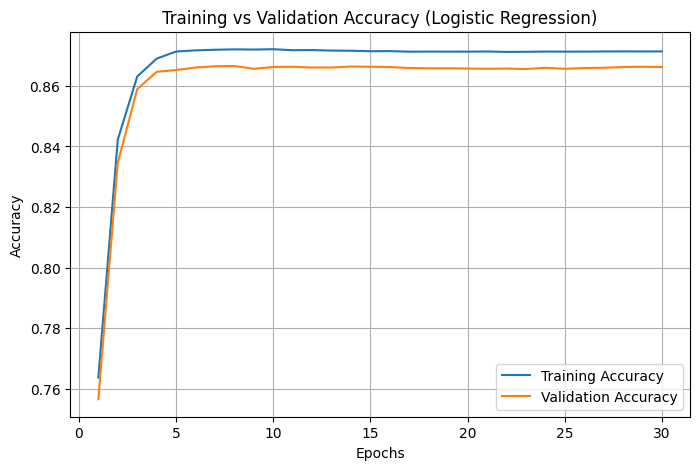

Training with lr=0.05, batch_size=1024, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.7636 | Val Acc: 0.7565
Epoch 2/40
  Train Acc: 0.8422 | Val Acc: 0.8346
Epoch 3/40
  Train Acc: 0.8631 | Val Acc: 0.8589
Epoch 4/40
  Train Acc: 0.8690 | Val Acc: 0.8647
Epoch 5/40
  Train Acc: 0.8714 | Val Acc: 0.8652
Epoch 6/40
  Train Acc: 0.8718 | Val Acc: 0.8661
Epoch 7/40
  Train Acc: 0.8720 | Val Acc: 0.8665
Epoch 8/40
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/40
  Train Acc: 0.8720 | Val Acc: 0.8657
Epoch 10/40
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 11/40
  Train Acc: 0.8718 | Val Acc: 0.8663
Epoch 12/40
  Train Acc: 0.8719 | Val Acc: 0.8661
Epoch 13/40
  Train Acc: 0.8717 | Val Acc: 0.8661
Epoch 14/40
  Train Acc: 0.8716 | Val Acc: 0.8664
Epoch 15/40
  Train Acc: 0.8715 | Val Acc: 0.8663
Epoch 16/40
  Train Acc: 0.8715 | Val Acc: 0.8662
Epoch 17/40
  Train Acc: 0.8713 | Val Acc: 0.8659
Epoch 18/40
  Train Acc: 0.8714 | Val Acc: 0.8658
Epoch 19/40
  Train Acc: 0.8713 | Val Acc: 0.

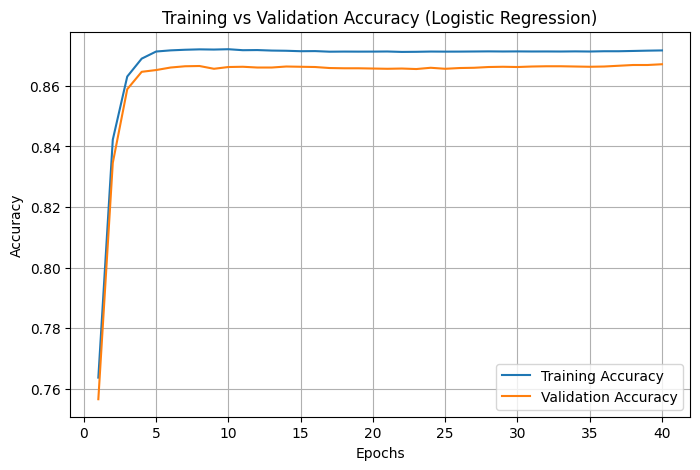

Training with lr=0.05, batch_size=1024, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.7636 | Val Acc: 0.7565
Epoch 2/50
  Train Acc: 0.8422 | Val Acc: 0.8346
Epoch 3/50
  Train Acc: 0.8631 | Val Acc: 0.8589
Epoch 4/50
  Train Acc: 0.8690 | Val Acc: 0.8647
Epoch 5/50
  Train Acc: 0.8714 | Val Acc: 0.8652
Epoch 6/50
  Train Acc: 0.8718 | Val Acc: 0.8661
Epoch 7/50
  Train Acc: 0.8720 | Val Acc: 0.8665
Epoch 8/50
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/50
  Train Acc: 0.8720 | Val Acc: 0.8657
Epoch 10/50
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 11/50
  Train Acc: 0.8718 | Val Acc: 0.8663
Epoch 12/50
  Train Acc: 0.8719 | Val Acc: 0.8661
Epoch 13/50
  Train Acc: 0.8717 | Val Acc: 0.8661
Epoch 14/50
  Train Acc: 0.8716 | Val Acc: 0.8664
Epoch 15/50
  Train Acc: 0.8715 | Val Acc: 0.8663
Epoch 16/50
  Train Acc: 0.8715 | Val Acc: 0.8662
Epoch 17/50
  Train Acc: 0.8713 | Val Acc: 0.8659
Epoch 18/50
  Train Acc: 0.8714 | Val Acc: 0.8658
Epoch 19/50
  Train Acc: 0.8713 | Val Acc: 0.

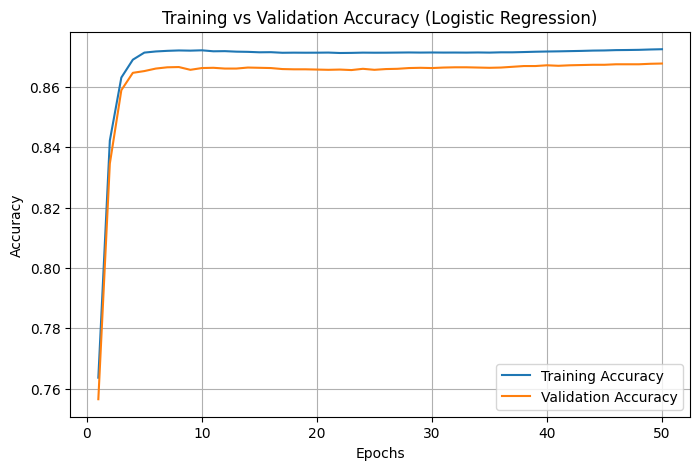

Training with lr=0.05, batch_size=1024, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.7585 | Val Acc: 0.7512
Epoch 2/30
  Train Acc: 0.8386 | Val Acc: 0.8316
Epoch 3/30
  Train Acc: 0.8607 | Val Acc: 0.8578
Epoch 4/30
  Train Acc: 0.8680 | Val Acc: 0.8629
Epoch 5/30
  Train Acc: 0.8707 | Val Acc: 0.8642
Epoch 6/30
  Train Acc: 0.8718 | Val Acc: 0.8666
Epoch 7/30
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 8/30
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/30
  Train Acc: 0.8721 | Val Acc: 0.8663
Epoch 10/30
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 11/30
  Train Acc: 0.8723 | Val Acc: 0.8658
Epoch 12/30
  Train Acc: 0.8724 | Val Acc: 0.8662
Epoch 13/30
  Train Acc: 0.8722 | Val Acc: 0.8668
Epoch 14/30
  Train Acc: 0.8720 | Val Acc: 0.8668
Epoch 15/30
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 16/30
  Train Acc: 0.8721 | Val Acc: 0.8665
Epoch 17/30
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 18/30
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 19/30
  Train Acc: 0.8720 | Val Acc: 0.8

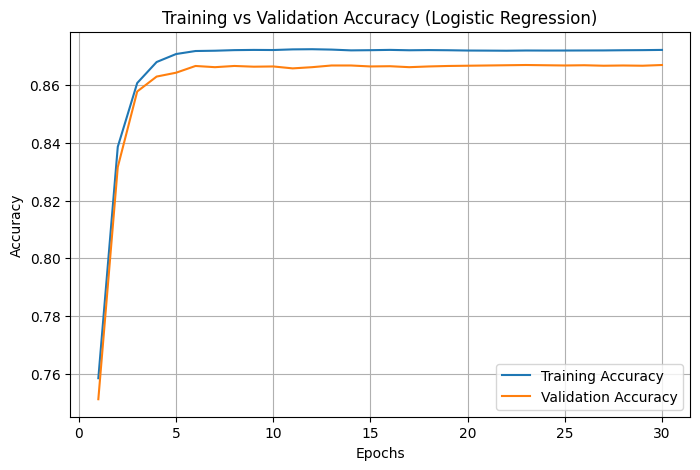

Training with lr=0.05, batch_size=1024, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.7585 | Val Acc: 0.7512
Epoch 2/40
  Train Acc: 0.8386 | Val Acc: 0.8316
Epoch 3/40
  Train Acc: 0.8607 | Val Acc: 0.8578
Epoch 4/40
  Train Acc: 0.8680 | Val Acc: 0.8629
Epoch 5/40
  Train Acc: 0.8707 | Val Acc: 0.8642
Epoch 6/40
  Train Acc: 0.8718 | Val Acc: 0.8666
Epoch 7/40
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 8/40
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/40
  Train Acc: 0.8721 | Val Acc: 0.8663
Epoch 10/40
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 11/40
  Train Acc: 0.8723 | Val Acc: 0.8658
Epoch 12/40
  Train Acc: 0.8724 | Val Acc: 0.8662
Epoch 13/40
  Train Acc: 0.8722 | Val Acc: 0.8668
Epoch 14/40
  Train Acc: 0.8720 | Val Acc: 0.8668
Epoch 15/40
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 16/40
  Train Acc: 0.8721 | Val Acc: 0.8665
Epoch 17/40
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 18/40
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 19/40
  Train Acc: 0.8720 | Val Acc: 0.8

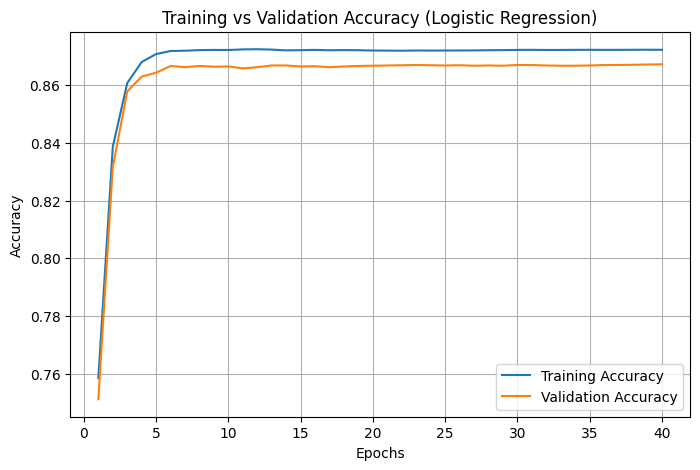

Training with lr=0.05, batch_size=1024, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.7585 | Val Acc: 0.7512
Epoch 2/50
  Train Acc: 0.8386 | Val Acc: 0.8316
Epoch 3/50
  Train Acc: 0.8607 | Val Acc: 0.8578
Epoch 4/50
  Train Acc: 0.8680 | Val Acc: 0.8629
Epoch 5/50
  Train Acc: 0.8707 | Val Acc: 0.8642
Epoch 6/50
  Train Acc: 0.8718 | Val Acc: 0.8666
Epoch 7/50
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 8/50
  Train Acc: 0.8721 | Val Acc: 0.8666
Epoch 9/50
  Train Acc: 0.8721 | Val Acc: 0.8663
Epoch 10/50
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 11/50
  Train Acc: 0.8723 | Val Acc: 0.8658
Epoch 12/50
  Train Acc: 0.8724 | Val Acc: 0.8662
Epoch 13/50
  Train Acc: 0.8722 | Val Acc: 0.8668
Epoch 14/50
  Train Acc: 0.8720 | Val Acc: 0.8668
Epoch 15/50
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 16/50
  Train Acc: 0.8721 | Val Acc: 0.8665
Epoch 17/50
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 18/50
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 19/50
  Train Acc: 0.8720 | Val Acc: 0.8

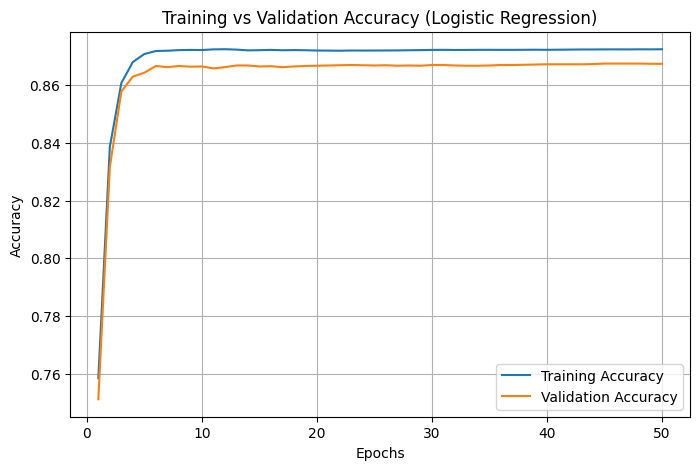

Training with lr=0.05, batch_size=2048, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.7224 | Val Acc: 0.7135
Epoch 2/30
  Train Acc: 0.7945 | Val Acc: 0.7897
Epoch 3/30
  Train Acc: 0.8334 | Val Acc: 0.8261
Epoch 4/30
  Train Acc: 0.8518 | Val Acc: 0.8451
Epoch 5/30
  Train Acc: 0.8614 | Val Acc: 0.8561
Epoch 6/30
  Train Acc: 0.8657 | Val Acc: 0.8606
Epoch 7/30
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 8/30
  Train Acc: 0.8691 | Val Acc: 0.8643
Epoch 9/30
  Train Acc: 0.8702 | Val Acc: 0.8648
Epoch 10/30
  Train Acc: 0.8705 | Val Acc: 0.8649
Epoch 11/30
  Train Acc: 0.8710 | Val Acc: 0.8650
Epoch 12/30
  Train Acc: 0.8711 | Val Acc: 0.8650
Epoch 13/30
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 14/30
  Train Acc: 0.8711 | Val Acc: 0.8653
Epoch 15/30
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 16/30
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 17/30
  Train Acc: 0.8709 | Val Acc: 0.8650
Epoch 18/30
  Train Acc: 0.8709 | Val Acc: 0.8641
Epoch 19/30
  Train Acc: 0.8710 | Val Acc: 0

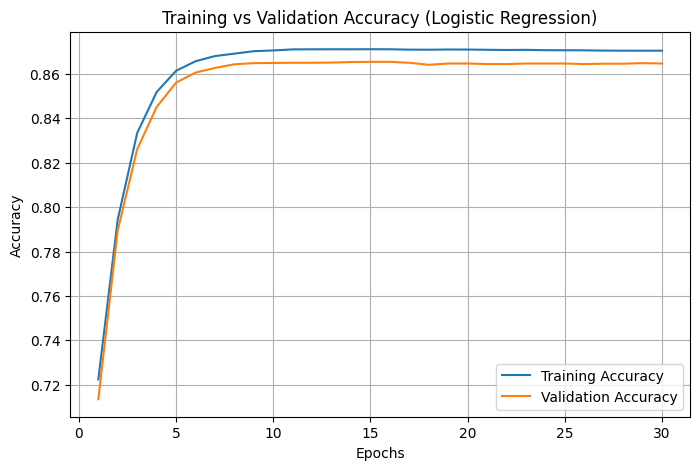

Training with lr=0.05, batch_size=2048, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.7224 | Val Acc: 0.7135
Epoch 2/40
  Train Acc: 0.7945 | Val Acc: 0.7897
Epoch 3/40
  Train Acc: 0.8334 | Val Acc: 0.8261
Epoch 4/40
  Train Acc: 0.8518 | Val Acc: 0.8451
Epoch 5/40
  Train Acc: 0.8614 | Val Acc: 0.8561
Epoch 6/40
  Train Acc: 0.8657 | Val Acc: 0.8606
Epoch 7/40
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 8/40
  Train Acc: 0.8691 | Val Acc: 0.8643
Epoch 9/40
  Train Acc: 0.8702 | Val Acc: 0.8648
Epoch 10/40
  Train Acc: 0.8705 | Val Acc: 0.8649
Epoch 11/40
  Train Acc: 0.8710 | Val Acc: 0.8650
Epoch 12/40
  Train Acc: 0.8711 | Val Acc: 0.8650
Epoch 13/40
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 14/40
  Train Acc: 0.8711 | Val Acc: 0.8653
Epoch 15/40
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 16/40
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 17/40
  Train Acc: 0.8709 | Val Acc: 0.8650
Epoch 18/40
  Train Acc: 0.8709 | Val Acc: 0.8641
Epoch 19/40
  Train Acc: 0.8710 | Val Acc: 0

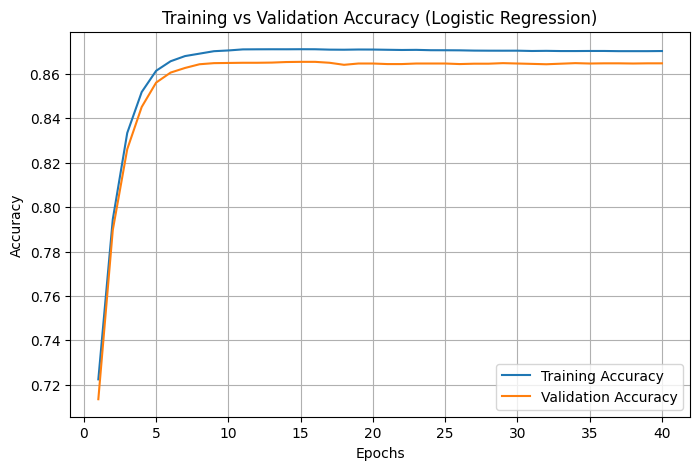

Training with lr=0.05, batch_size=2048, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.7224 | Val Acc: 0.7135
Epoch 2/50
  Train Acc: 0.7945 | Val Acc: 0.7897
Epoch 3/50
  Train Acc: 0.8334 | Val Acc: 0.8261
Epoch 4/50
  Train Acc: 0.8518 | Val Acc: 0.8451
Epoch 5/50
  Train Acc: 0.8614 | Val Acc: 0.8561
Epoch 6/50
  Train Acc: 0.8657 | Val Acc: 0.8606
Epoch 7/50
  Train Acc: 0.8680 | Val Acc: 0.8627
Epoch 8/50
  Train Acc: 0.8691 | Val Acc: 0.8643
Epoch 9/50
  Train Acc: 0.8702 | Val Acc: 0.8648
Epoch 10/50
  Train Acc: 0.8705 | Val Acc: 0.8649
Epoch 11/50
  Train Acc: 0.8710 | Val Acc: 0.8650
Epoch 12/50
  Train Acc: 0.8711 | Val Acc: 0.8650
Epoch 13/50
  Train Acc: 0.8711 | Val Acc: 0.8651
Epoch 14/50
  Train Acc: 0.8711 | Val Acc: 0.8653
Epoch 15/50
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 16/50
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 17/50
  Train Acc: 0.8709 | Val Acc: 0.8650
Epoch 18/50
  Train Acc: 0.8709 | Val Acc: 0.8641
Epoch 19/50
  Train Acc: 0.8710 | Val Acc: 0

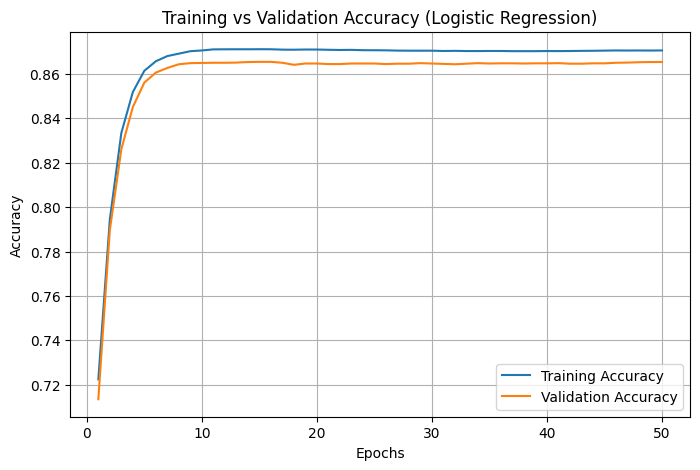

Training with lr=0.05, batch_size=2048, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.7222 | Val Acc: 0.7131
Epoch 2/30
  Train Acc: 0.7940 | Val Acc: 0.7894
Epoch 3/30
  Train Acc: 0.8331 | Val Acc: 0.8261
Epoch 4/30
  Train Acc: 0.8517 | Val Acc: 0.8451
Epoch 5/30
  Train Acc: 0.8612 | Val Acc: 0.8559
Epoch 6/30
  Train Acc: 0.8656 | Val Acc: 0.8604
Epoch 7/30
  Train Acc: 0.8679 | Val Acc: 0.8627
Epoch 8/30
  Train Acc: 0.8691 | Val Acc: 0.8641
Epoch 9/30
  Train Acc: 0.8702 | Val Acc: 0.8650
Epoch 10/30
  Train Acc: 0.8705 | Val Acc: 0.8647
Epoch 11/30
  Train Acc: 0.8710 | Val Acc: 0.8649
Epoch 12/30
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 13/30
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 14/30
  Train Acc: 0.8711 | Val Acc: 0.8655
Epoch 15/30
  Train Acc: 0.8711 | Val Acc: 0.8652
Epoch 16/30
  Train Acc: 0.8712 | Val Acc: 0.8653
Epoch 17/30
  Train Acc: 0.8709 | Val Acc: 0.8653
Epoch 18/30
  Train Acc: 0.8710 | Val Acc: 0.8642
Epoch 19/30
  Train Acc: 0.8710 | Val Acc: 0.

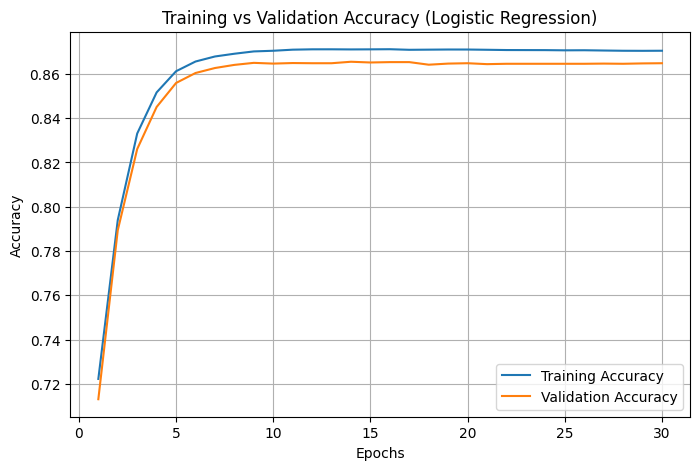

Training with lr=0.05, batch_size=2048, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.7222 | Val Acc: 0.7131
Epoch 2/40
  Train Acc: 0.7940 | Val Acc: 0.7894
Epoch 3/40
  Train Acc: 0.8331 | Val Acc: 0.8261
Epoch 4/40
  Train Acc: 0.8517 | Val Acc: 0.8451
Epoch 5/40
  Train Acc: 0.8612 | Val Acc: 0.8559
Epoch 6/40
  Train Acc: 0.8656 | Val Acc: 0.8604
Epoch 7/40
  Train Acc: 0.8679 | Val Acc: 0.8627
Epoch 8/40
  Train Acc: 0.8691 | Val Acc: 0.8641
Epoch 9/40
  Train Acc: 0.8702 | Val Acc: 0.8650
Epoch 10/40
  Train Acc: 0.8705 | Val Acc: 0.8647
Epoch 11/40
  Train Acc: 0.8710 | Val Acc: 0.8649
Epoch 12/40
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 13/40
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 14/40
  Train Acc: 0.8711 | Val Acc: 0.8655
Epoch 15/40
  Train Acc: 0.8711 | Val Acc: 0.8652
Epoch 16/40
  Train Acc: 0.8712 | Val Acc: 0.8653
Epoch 17/40
  Train Acc: 0.8709 | Val Acc: 0.8653
Epoch 18/40
  Train Acc: 0.8710 | Val Acc: 0.8642
Epoch 19/40
  Train Acc: 0.8710 | Val Acc: 0.

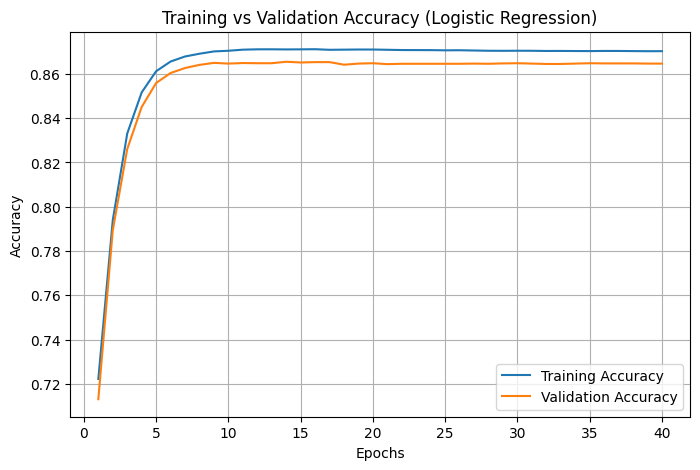

Training with lr=0.05, batch_size=2048, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.7222 | Val Acc: 0.7131
Epoch 2/50
  Train Acc: 0.7940 | Val Acc: 0.7894
Epoch 3/50
  Train Acc: 0.8331 | Val Acc: 0.8261
Epoch 4/50
  Train Acc: 0.8517 | Val Acc: 0.8451
Epoch 5/50
  Train Acc: 0.8612 | Val Acc: 0.8559
Epoch 6/50
  Train Acc: 0.8656 | Val Acc: 0.8604
Epoch 7/50
  Train Acc: 0.8679 | Val Acc: 0.8627
Epoch 8/50
  Train Acc: 0.8691 | Val Acc: 0.8641
Epoch 9/50
  Train Acc: 0.8702 | Val Acc: 0.8650
Epoch 10/50
  Train Acc: 0.8705 | Val Acc: 0.8647
Epoch 11/50
  Train Acc: 0.8710 | Val Acc: 0.8649
Epoch 12/50
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 13/50
  Train Acc: 0.8711 | Val Acc: 0.8648
Epoch 14/50
  Train Acc: 0.8711 | Val Acc: 0.8655
Epoch 15/50
  Train Acc: 0.8711 | Val Acc: 0.8652
Epoch 16/50
  Train Acc: 0.8712 | Val Acc: 0.8653
Epoch 17/50
  Train Acc: 0.8709 | Val Acc: 0.8653
Epoch 18/50
  Train Acc: 0.8710 | Val Acc: 0.8642
Epoch 19/50
  Train Acc: 0.8710 | Val Acc: 0.

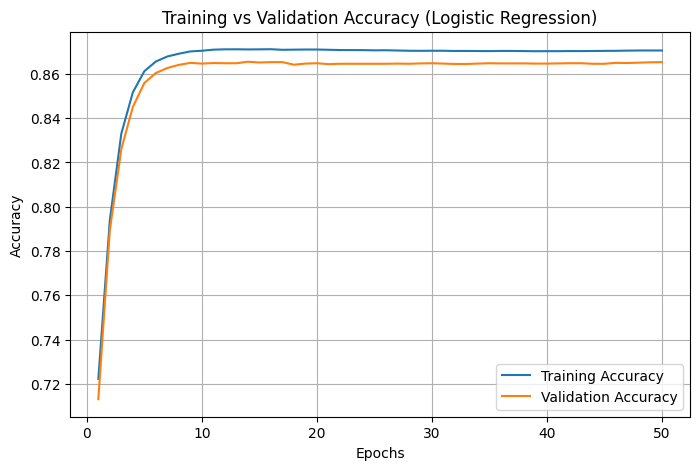

Training with lr=0.05, batch_size=2048, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.7194 | Val Acc: 0.7097
Epoch 2/30
  Train Acc: 0.7902 | Val Acc: 0.7851
Epoch 3/30
  Train Acc: 0.8297 | Val Acc: 0.8237
Epoch 4/30
  Train Acc: 0.8491 | Val Acc: 0.8431
Epoch 5/30
  Train Acc: 0.8594 | Val Acc: 0.8537
Epoch 6/30
  Train Acc: 0.8644 | Val Acc: 0.8595
Epoch 7/30
  Train Acc: 0.8670 | Val Acc: 0.8622
Epoch 8/30
  Train Acc: 0.8686 | Val Acc: 0.8637
Epoch 9/30
  Train Acc: 0.8695 | Val Acc: 0.8647
Epoch 10/30
  Train Acc: 0.8703 | Val Acc: 0.8648
Epoch 11/30
  Train Acc: 0.8705 | Val Acc: 0.8648
Epoch 12/30
  Train Acc: 0.8709 | Val Acc: 0.8655
Epoch 13/30
  Train Acc: 0.8711 | Val Acc: 0.8652
Epoch 14/30
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 15/30
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 16/30
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 17/30
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 18/30
  Train Acc: 0.8713 | Val Acc: 0.8657
Epoch 19/30
  Train Acc: 0.8713 | Val Acc: 0.8

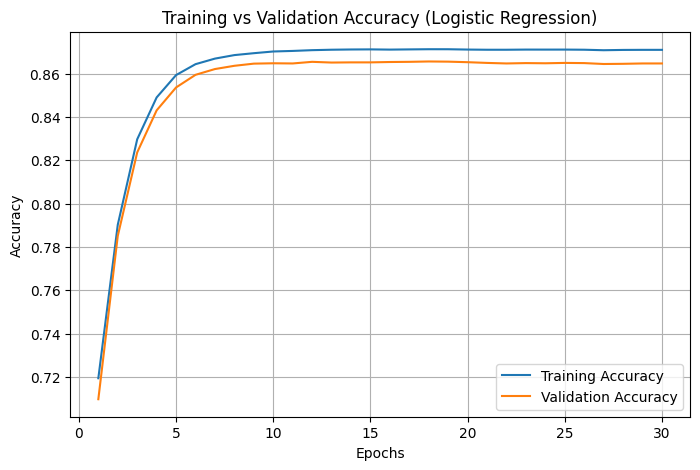

Training with lr=0.05, batch_size=2048, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.7194 | Val Acc: 0.7097
Epoch 2/40
  Train Acc: 0.7902 | Val Acc: 0.7851
Epoch 3/40
  Train Acc: 0.8297 | Val Acc: 0.8237
Epoch 4/40
  Train Acc: 0.8491 | Val Acc: 0.8431
Epoch 5/40
  Train Acc: 0.8594 | Val Acc: 0.8537
Epoch 6/40
  Train Acc: 0.8644 | Val Acc: 0.8595
Epoch 7/40
  Train Acc: 0.8670 | Val Acc: 0.8622
Epoch 8/40
  Train Acc: 0.8686 | Val Acc: 0.8637
Epoch 9/40
  Train Acc: 0.8695 | Val Acc: 0.8647
Epoch 10/40
  Train Acc: 0.8703 | Val Acc: 0.8648
Epoch 11/40
  Train Acc: 0.8705 | Val Acc: 0.8648
Epoch 12/40
  Train Acc: 0.8709 | Val Acc: 0.8655
Epoch 13/40
  Train Acc: 0.8711 | Val Acc: 0.8652
Epoch 14/40
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 15/40
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 16/40
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 17/40
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 18/40
  Train Acc: 0.8713 | Val Acc: 0.8657
Epoch 19/40
  Train Acc: 0.8713 | Val Acc: 0.8

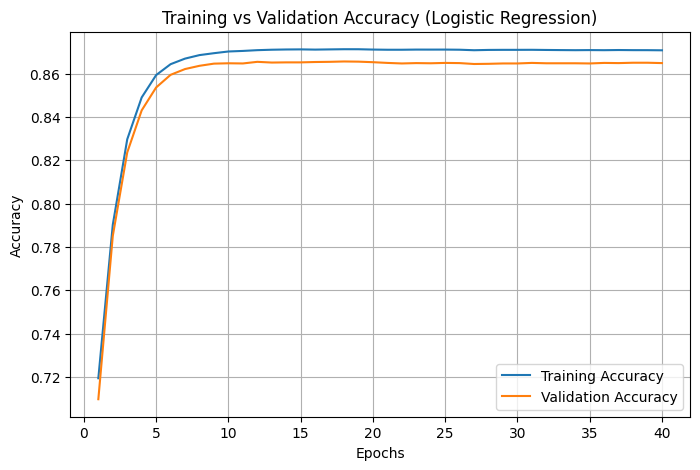

Training with lr=0.05, batch_size=2048, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.7194 | Val Acc: 0.7097
Epoch 2/50
  Train Acc: 0.7902 | Val Acc: 0.7851
Epoch 3/50
  Train Acc: 0.8297 | Val Acc: 0.8237
Epoch 4/50
  Train Acc: 0.8491 | Val Acc: 0.8431
Epoch 5/50
  Train Acc: 0.8594 | Val Acc: 0.8537
Epoch 6/50
  Train Acc: 0.8644 | Val Acc: 0.8595
Epoch 7/50
  Train Acc: 0.8670 | Val Acc: 0.8622
Epoch 8/50
  Train Acc: 0.8686 | Val Acc: 0.8637
Epoch 9/50
  Train Acc: 0.8695 | Val Acc: 0.8647
Epoch 10/50
  Train Acc: 0.8703 | Val Acc: 0.8648
Epoch 11/50
  Train Acc: 0.8705 | Val Acc: 0.8648
Epoch 12/50
  Train Acc: 0.8709 | Val Acc: 0.8655
Epoch 13/50
  Train Acc: 0.8711 | Val Acc: 0.8652
Epoch 14/50
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 15/50
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 16/50
  Train Acc: 0.8711 | Val Acc: 0.8654
Epoch 17/50
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 18/50
  Train Acc: 0.8713 | Val Acc: 0.8657
Epoch 19/50
  Train Acc: 0.8713 | Val Acc: 0.8

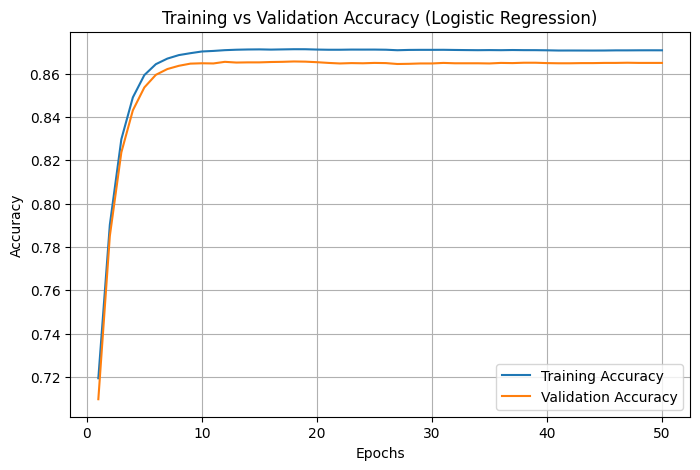

Training with lr=0.1, batch_size=512, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.8216 | Val Acc: 0.8157
Epoch 2/30
  Train Acc: 0.8618 | Val Acc: 0.8575
Epoch 3/30
  Train Acc: 0.8679 | Val Acc: 0.8628
Epoch 4/30
  Train Acc: 0.8696 | Val Acc: 0.8639
Epoch 5/30
  Train Acc: 0.8703 | Val Acc: 0.8639
Epoch 6/30
  Train Acc: 0.8705 | Val Acc: 0.8643
Epoch 7/30
  Train Acc: 0.8708 | Val Acc: 0.8644
Epoch 8/30
  Train Acc: 0.8712 | Val Acc: 0.8649
Epoch 9/30
  Train Acc: 0.8713 | Val Acc: 0.8658
Epoch 10/30
  Train Acc: 0.8718 | Val Acc: 0.8662
Epoch 11/30
  Train Acc: 0.8722 | Val Acc: 0.8668
Epoch 12/30
  Train Acc: 0.8726 | Val Acc: 0.8669
Epoch 13/30
  Train Acc: 0.8729 | Val Acc: 0.8675
Epoch 14/30
  Train Acc: 0.8732 | Val Acc: 0.8678
Epoch 15/30
  Train Acc: 0.8736 | Val Acc: 0.8679
Epoch 16/30
  Train Acc: 0.8742 | Val Acc: 0.8682
Epoch 17/30
  Train Acc: 0.8747 | Val Acc: 0.8687
Epoch 18/30
  Train Acc: 0.8749 | Val Acc: 0.8694
Epoch 19/30
  Train Acc: 0.8752 | Val Acc: 0.8

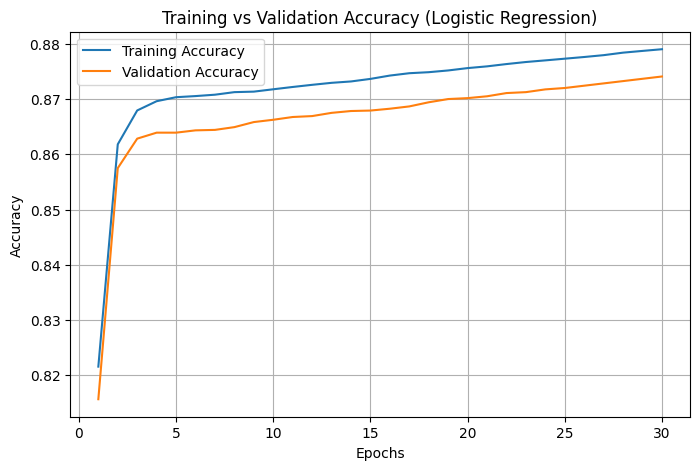

Training with lr=0.1, batch_size=512, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.8216 | Val Acc: 0.8157
Epoch 2/40
  Train Acc: 0.8618 | Val Acc: 0.8575
Epoch 3/40
  Train Acc: 0.8679 | Val Acc: 0.8628
Epoch 4/40
  Train Acc: 0.8696 | Val Acc: 0.8639
Epoch 5/40
  Train Acc: 0.8703 | Val Acc: 0.8639
Epoch 6/40
  Train Acc: 0.8705 | Val Acc: 0.8643
Epoch 7/40
  Train Acc: 0.8708 | Val Acc: 0.8644
Epoch 8/40
  Train Acc: 0.8712 | Val Acc: 0.8649
Epoch 9/40
  Train Acc: 0.8713 | Val Acc: 0.8658
Epoch 10/40
  Train Acc: 0.8718 | Val Acc: 0.8662
Epoch 11/40
  Train Acc: 0.8722 | Val Acc: 0.8668
Epoch 12/40
  Train Acc: 0.8726 | Val Acc: 0.8669
Epoch 13/40
  Train Acc: 0.8729 | Val Acc: 0.8675
Epoch 14/40
  Train Acc: 0.8732 | Val Acc: 0.8678
Epoch 15/40
  Train Acc: 0.8736 | Val Acc: 0.8679
Epoch 16/40
  Train Acc: 0.8742 | Val Acc: 0.8682
Epoch 17/40
  Train Acc: 0.8747 | Val Acc: 0.8687
Epoch 18/40
  Train Acc: 0.8749 | Val Acc: 0.8694
Epoch 19/40
  Train Acc: 0.8752 | Val Acc: 0.8

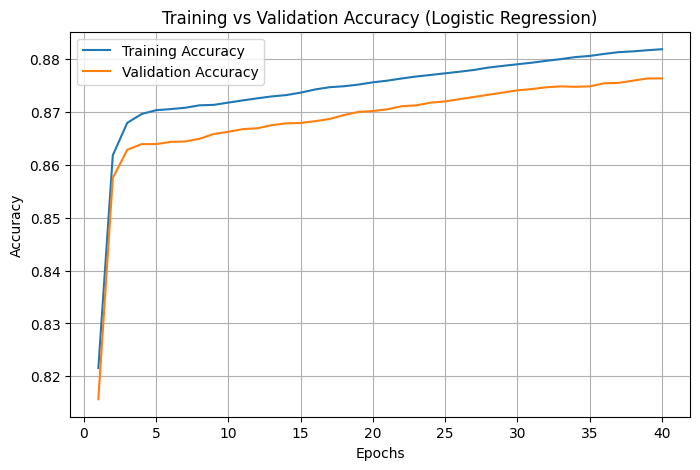

Training with lr=0.1, batch_size=512, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.8216 | Val Acc: 0.8157
Epoch 2/50
  Train Acc: 0.8618 | Val Acc: 0.8575
Epoch 3/50
  Train Acc: 0.8679 | Val Acc: 0.8628
Epoch 4/50
  Train Acc: 0.8696 | Val Acc: 0.8639
Epoch 5/50
  Train Acc: 0.8703 | Val Acc: 0.8639
Epoch 6/50
  Train Acc: 0.8705 | Val Acc: 0.8643
Epoch 7/50
  Train Acc: 0.8708 | Val Acc: 0.8644
Epoch 8/50
  Train Acc: 0.8712 | Val Acc: 0.8649
Epoch 9/50
  Train Acc: 0.8713 | Val Acc: 0.8658
Epoch 10/50
  Train Acc: 0.8718 | Val Acc: 0.8662
Epoch 11/50
  Train Acc: 0.8722 | Val Acc: 0.8668
Epoch 12/50
  Train Acc: 0.8726 | Val Acc: 0.8669
Epoch 13/50
  Train Acc: 0.8729 | Val Acc: 0.8675
Epoch 14/50
  Train Acc: 0.8732 | Val Acc: 0.8678
Epoch 15/50
  Train Acc: 0.8736 | Val Acc: 0.8679
Epoch 16/50
  Train Acc: 0.8742 | Val Acc: 0.8682
Epoch 17/50
  Train Acc: 0.8747 | Val Acc: 0.8687
Epoch 18/50
  Train Acc: 0.8749 | Val Acc: 0.8694
Epoch 19/50
  Train Acc: 0.8752 | Val Acc: 0.8

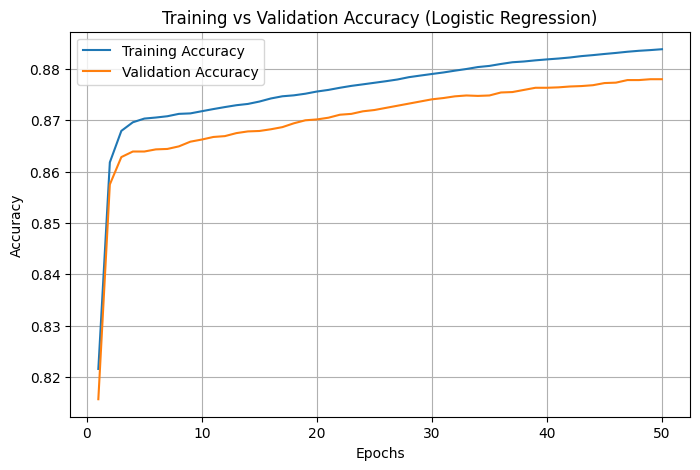

Training with lr=0.1, batch_size=512, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.8206 | Val Acc: 0.8150
Epoch 2/30
  Train Acc: 0.8614 | Val Acc: 0.8572
Epoch 3/30
  Train Acc: 0.8678 | Val Acc: 0.8628
Epoch 4/30
  Train Acc: 0.8695 | Val Acc: 0.8640
Epoch 5/30
  Train Acc: 0.8702 | Val Acc: 0.8639
Epoch 6/30
  Train Acc: 0.8704 | Val Acc: 0.8641
Epoch 7/30
  Train Acc: 0.8707 | Val Acc: 0.8642
Epoch 8/30
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 9/30
  Train Acc: 0.8713 | Val Acc: 0.8653
Epoch 10/30
  Train Acc: 0.8715 | Val Acc: 0.8661
Epoch 11/30
  Train Acc: 0.8719 | Val Acc: 0.8668
Epoch 12/30
  Train Acc: 0.8723 | Val Acc: 0.8668
Epoch 13/30
  Train Acc: 0.8728 | Val Acc: 0.8671
Epoch 14/30
  Train Acc: 0.8731 | Val Acc: 0.8674
Epoch 15/30
  Train Acc: 0.8732 | Val Acc: 0.8678
Epoch 16/30
  Train Acc: 0.8736 | Val Acc: 0.8682
Epoch 17/30
  Train Acc: 0.8741 | Val Acc: 0.8687
Epoch 18/30
  Train Acc: 0.8745 | Val Acc: 0.8688
Epoch 19/30
  Train Acc: 0.8749 | Val Acc: 0.86

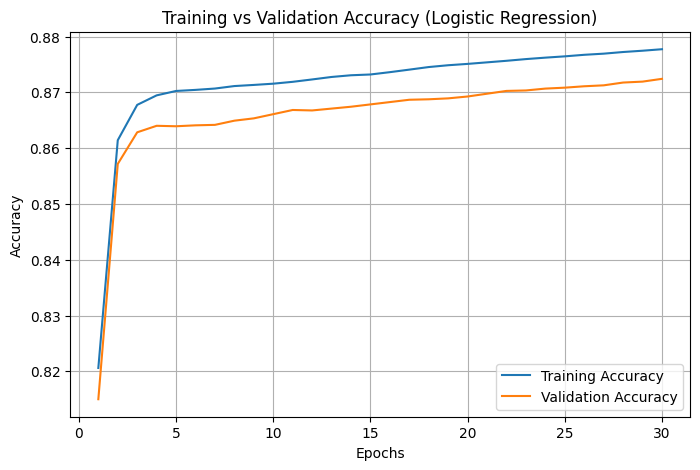

Training with lr=0.1, batch_size=512, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.8206 | Val Acc: 0.8150
Epoch 2/40
  Train Acc: 0.8614 | Val Acc: 0.8572
Epoch 3/40
  Train Acc: 0.8678 | Val Acc: 0.8628
Epoch 4/40
  Train Acc: 0.8695 | Val Acc: 0.8640
Epoch 5/40
  Train Acc: 0.8702 | Val Acc: 0.8639
Epoch 6/40
  Train Acc: 0.8704 | Val Acc: 0.8641
Epoch 7/40
  Train Acc: 0.8707 | Val Acc: 0.8642
Epoch 8/40
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 9/40
  Train Acc: 0.8713 | Val Acc: 0.8653
Epoch 10/40
  Train Acc: 0.8715 | Val Acc: 0.8661
Epoch 11/40
  Train Acc: 0.8719 | Val Acc: 0.8668
Epoch 12/40
  Train Acc: 0.8723 | Val Acc: 0.8668
Epoch 13/40
  Train Acc: 0.8728 | Val Acc: 0.8671
Epoch 14/40
  Train Acc: 0.8731 | Val Acc: 0.8674
Epoch 15/40
  Train Acc: 0.8732 | Val Acc: 0.8678
Epoch 16/40
  Train Acc: 0.8736 | Val Acc: 0.8682
Epoch 17/40
  Train Acc: 0.8741 | Val Acc: 0.8687
Epoch 18/40
  Train Acc: 0.8745 | Val Acc: 0.8688
Epoch 19/40
  Train Acc: 0.8749 | Val Acc: 0.86

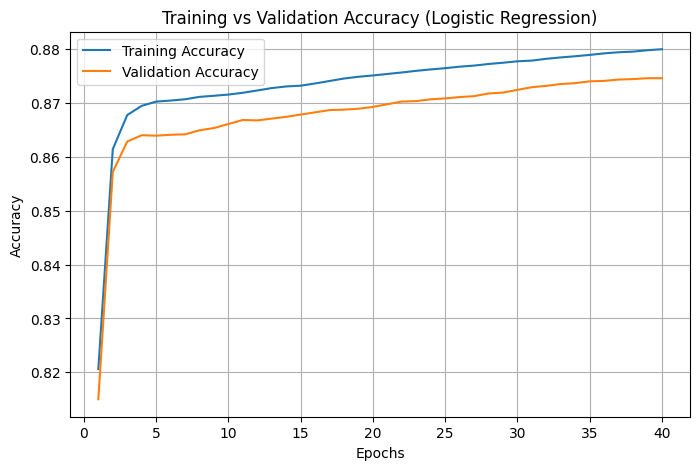

Training with lr=0.1, batch_size=512, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.8206 | Val Acc: 0.8150
Epoch 2/50
  Train Acc: 0.8614 | Val Acc: 0.8572
Epoch 3/50
  Train Acc: 0.8678 | Val Acc: 0.8628
Epoch 4/50
  Train Acc: 0.8695 | Val Acc: 0.8640
Epoch 5/50
  Train Acc: 0.8702 | Val Acc: 0.8639
Epoch 6/50
  Train Acc: 0.8704 | Val Acc: 0.8641
Epoch 7/50
  Train Acc: 0.8707 | Val Acc: 0.8642
Epoch 8/50
  Train Acc: 0.8711 | Val Acc: 0.8649
Epoch 9/50
  Train Acc: 0.8713 | Val Acc: 0.8653
Epoch 10/50
  Train Acc: 0.8715 | Val Acc: 0.8661
Epoch 11/50
  Train Acc: 0.8719 | Val Acc: 0.8668
Epoch 12/50
  Train Acc: 0.8723 | Val Acc: 0.8668
Epoch 13/50
  Train Acc: 0.8728 | Val Acc: 0.8671
Epoch 14/50
  Train Acc: 0.8731 | Val Acc: 0.8674
Epoch 15/50
  Train Acc: 0.8732 | Val Acc: 0.8678
Epoch 16/50
  Train Acc: 0.8736 | Val Acc: 0.8682
Epoch 17/50
  Train Acc: 0.8741 | Val Acc: 0.8687
Epoch 18/50
  Train Acc: 0.8745 | Val Acc: 0.8688
Epoch 19/50
  Train Acc: 0.8749 | Val Acc: 0.86

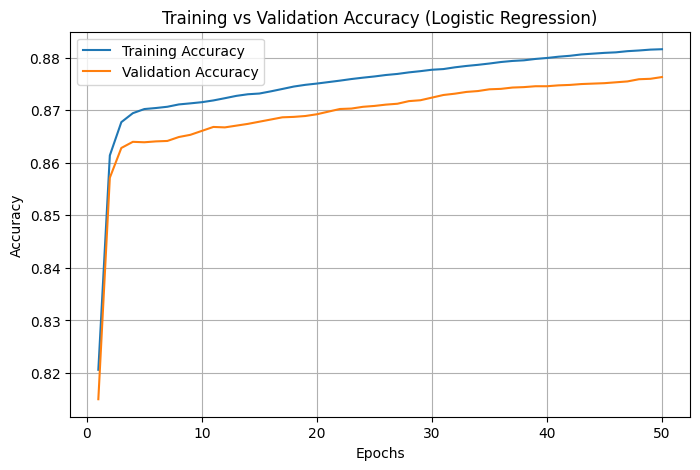

Training with lr=0.1, batch_size=512, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.8091 | Val Acc: 0.8041
Epoch 2/30
  Train Acc: 0.8559 | Val Acc: 0.8502
Epoch 3/30
  Train Acc: 0.8644 | Val Acc: 0.8591
Epoch 4/30
  Train Acc: 0.8670 | Val Acc: 0.8625
Epoch 5/30
  Train Acc: 0.8686 | Val Acc: 0.8631
Epoch 6/30
  Train Acc: 0.8694 | Val Acc: 0.8643
Epoch 7/30
  Train Acc: 0.8697 | Val Acc: 0.8645
Epoch 8/30
  Train Acc: 0.8699 | Val Acc: 0.8652
Epoch 9/30
  Train Acc: 0.8702 | Val Acc: 0.8652
Epoch 10/30
  Train Acc: 0.8705 | Val Acc: 0.8656
Epoch 11/30
  Train Acc: 0.8707 | Val Acc: 0.8652
Epoch 12/30
  Train Acc: 0.8707 | Val Acc: 0.8653
Epoch 13/30
  Train Acc: 0.8709 | Val Acc: 0.8652
Epoch 14/30
  Train Acc: 0.8710 | Val Acc: 0.8656
Epoch 15/30
  Train Acc: 0.8711 | Val Acc: 0.8657
Epoch 16/30
  Train Acc: 0.8712 | Val Acc: 0.8654
Epoch 17/30
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 18/30
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 19/30
  Train Acc: 0.8714 | Val Acc: 0.865

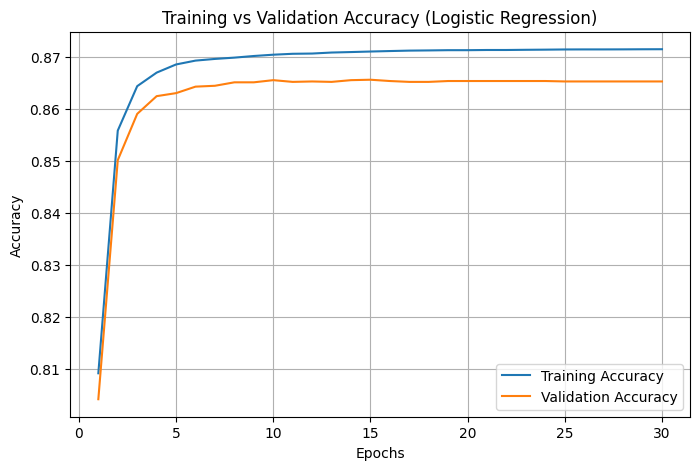

Training with lr=0.1, batch_size=512, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.8091 | Val Acc: 0.8041
Epoch 2/40
  Train Acc: 0.8559 | Val Acc: 0.8502
Epoch 3/40
  Train Acc: 0.8644 | Val Acc: 0.8591
Epoch 4/40
  Train Acc: 0.8670 | Val Acc: 0.8625
Epoch 5/40
  Train Acc: 0.8686 | Val Acc: 0.8631
Epoch 6/40
  Train Acc: 0.8694 | Val Acc: 0.8643
Epoch 7/40
  Train Acc: 0.8697 | Val Acc: 0.8645
Epoch 8/40
  Train Acc: 0.8699 | Val Acc: 0.8652
Epoch 9/40
  Train Acc: 0.8702 | Val Acc: 0.8652
Epoch 10/40
  Train Acc: 0.8705 | Val Acc: 0.8656
Epoch 11/40
  Train Acc: 0.8707 | Val Acc: 0.8652
Epoch 12/40
  Train Acc: 0.8707 | Val Acc: 0.8653
Epoch 13/40
  Train Acc: 0.8709 | Val Acc: 0.8652
Epoch 14/40
  Train Acc: 0.8710 | Val Acc: 0.8656
Epoch 15/40
  Train Acc: 0.8711 | Val Acc: 0.8657
Epoch 16/40
  Train Acc: 0.8712 | Val Acc: 0.8654
Epoch 17/40
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 18/40
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 19/40
  Train Acc: 0.8714 | Val Acc: 0.865

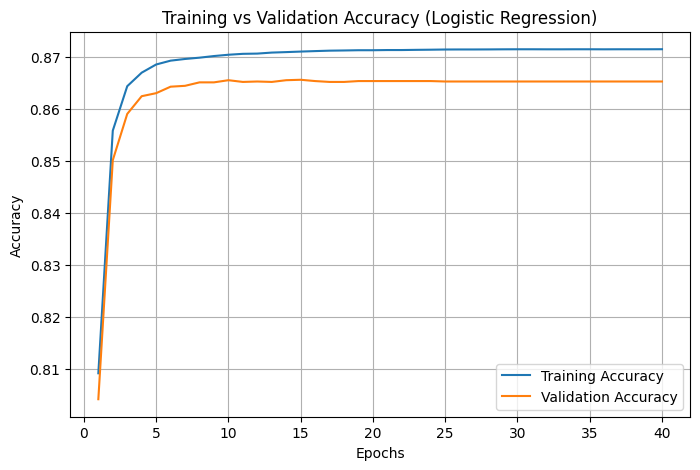

Training with lr=0.1, batch_size=512, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.8091 | Val Acc: 0.8041
Epoch 2/50
  Train Acc: 0.8559 | Val Acc: 0.8502
Epoch 3/50
  Train Acc: 0.8644 | Val Acc: 0.8591
Epoch 4/50
  Train Acc: 0.8670 | Val Acc: 0.8625
Epoch 5/50
  Train Acc: 0.8686 | Val Acc: 0.8631
Epoch 6/50
  Train Acc: 0.8694 | Val Acc: 0.8643
Epoch 7/50
  Train Acc: 0.8697 | Val Acc: 0.8645
Epoch 8/50
  Train Acc: 0.8699 | Val Acc: 0.8652
Epoch 9/50
  Train Acc: 0.8702 | Val Acc: 0.8652
Epoch 10/50
  Train Acc: 0.8705 | Val Acc: 0.8656
Epoch 11/50
  Train Acc: 0.8707 | Val Acc: 0.8652
Epoch 12/50
  Train Acc: 0.8707 | Val Acc: 0.8653
Epoch 13/50
  Train Acc: 0.8709 | Val Acc: 0.8652
Epoch 14/50
  Train Acc: 0.8710 | Val Acc: 0.8656
Epoch 15/50
  Train Acc: 0.8711 | Val Acc: 0.8657
Epoch 16/50
  Train Acc: 0.8712 | Val Acc: 0.8654
Epoch 17/50
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 18/50
  Train Acc: 0.8713 | Val Acc: 0.8652
Epoch 19/50
  Train Acc: 0.8714 | Val Acc: 0.865

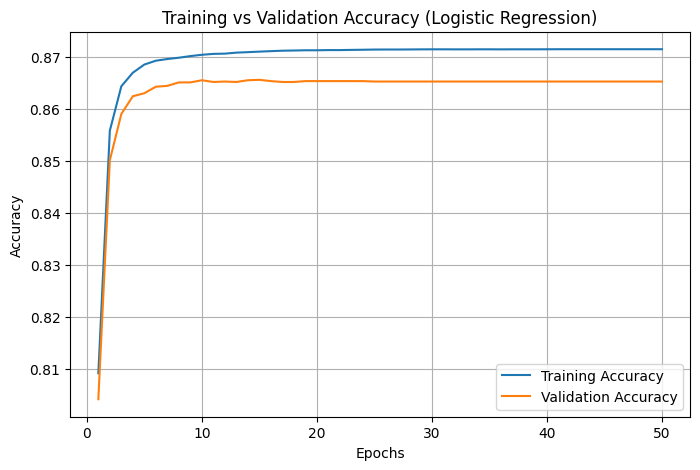

Training with lr=0.1, batch_size=1024, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.8125 | Val Acc: 0.8037
Epoch 2/30
  Train Acc: 0.8615 | Val Acc: 0.8571
Epoch 3/30
  Train Acc: 0.8700 | Val Acc: 0.8660
Epoch 4/30
  Train Acc: 0.8715 | Val Acc: 0.8658
Epoch 5/30
  Train Acc: 0.8722 | Val Acc: 0.8653
Epoch 6/30
  Train Acc: 0.8719 | Val Acc: 0.8656
Epoch 7/30
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 8/30
  Train Acc: 0.8721 | Val Acc: 0.8656
Epoch 9/30
  Train Acc: 0.8723 | Val Acc: 0.8657
Epoch 10/30
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 11/30
  Train Acc: 0.8721 | Val Acc: 0.8661
Epoch 12/30
  Train Acc: 0.8722 | Val Acc: 0.8660
Epoch 13/30
  Train Acc: 0.8720 | Val Acc: 0.8661
Epoch 14/30
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 15/30
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 16/30
  Train Acc: 0.8719 | Val Acc: 0.8664
Epoch 17/30
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 18/30
  Train Acc: 0.8722 | Val Acc: 0.8666
Epoch 19/30
  Train Acc: 0.8722 | Val Acc: 0.

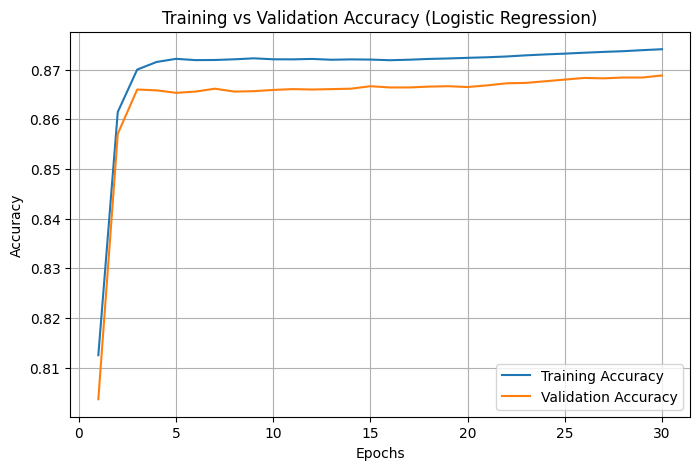

Training with lr=0.1, batch_size=1024, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.8125 | Val Acc: 0.8037
Epoch 2/40
  Train Acc: 0.8615 | Val Acc: 0.8571
Epoch 3/40
  Train Acc: 0.8700 | Val Acc: 0.8660
Epoch 4/40
  Train Acc: 0.8715 | Val Acc: 0.8658
Epoch 5/40
  Train Acc: 0.8722 | Val Acc: 0.8653
Epoch 6/40
  Train Acc: 0.8719 | Val Acc: 0.8656
Epoch 7/40
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 8/40
  Train Acc: 0.8721 | Val Acc: 0.8656
Epoch 9/40
  Train Acc: 0.8723 | Val Acc: 0.8657
Epoch 10/40
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 11/40
  Train Acc: 0.8721 | Val Acc: 0.8661
Epoch 12/40
  Train Acc: 0.8722 | Val Acc: 0.8660
Epoch 13/40
  Train Acc: 0.8720 | Val Acc: 0.8661
Epoch 14/40
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 15/40
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 16/40
  Train Acc: 0.8719 | Val Acc: 0.8664
Epoch 17/40
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 18/40
  Train Acc: 0.8722 | Val Acc: 0.8666
Epoch 19/40
  Train Acc: 0.8722 | Val Acc: 0.

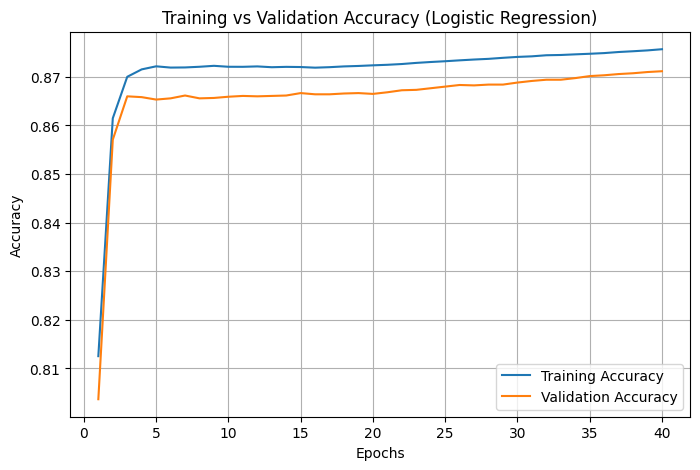

Training with lr=0.1, batch_size=1024, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.8125 | Val Acc: 0.8037
Epoch 2/50
  Train Acc: 0.8615 | Val Acc: 0.8571
Epoch 3/50
  Train Acc: 0.8700 | Val Acc: 0.8660
Epoch 4/50
  Train Acc: 0.8715 | Val Acc: 0.8658
Epoch 5/50
  Train Acc: 0.8722 | Val Acc: 0.8653
Epoch 6/50
  Train Acc: 0.8719 | Val Acc: 0.8656
Epoch 7/50
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 8/50
  Train Acc: 0.8721 | Val Acc: 0.8656
Epoch 9/50
  Train Acc: 0.8723 | Val Acc: 0.8657
Epoch 10/50
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 11/50
  Train Acc: 0.8721 | Val Acc: 0.8661
Epoch 12/50
  Train Acc: 0.8722 | Val Acc: 0.8660
Epoch 13/50
  Train Acc: 0.8720 | Val Acc: 0.8661
Epoch 14/50
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 15/50
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 16/50
  Train Acc: 0.8719 | Val Acc: 0.8664
Epoch 17/50
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 18/50
  Train Acc: 0.8722 | Val Acc: 0.8666
Epoch 19/50
  Train Acc: 0.8722 | Val Acc: 0.

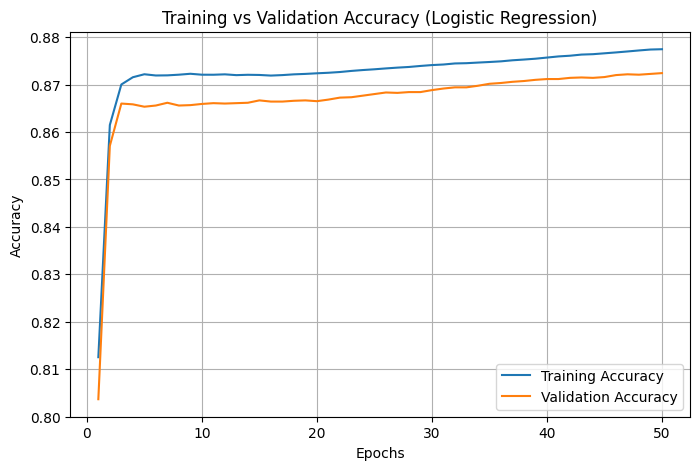

Training with lr=0.1, batch_size=1024, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.8119 | Val Acc: 0.8028
Epoch 2/30
  Train Acc: 0.8613 | Val Acc: 0.8570
Epoch 3/30
  Train Acc: 0.8699 | Val Acc: 0.8659
Epoch 4/30
  Train Acc: 0.8716 | Val Acc: 0.8658
Epoch 5/30
  Train Acc: 0.8722 | Val Acc: 0.8653
Epoch 6/30
  Train Acc: 0.8719 | Val Acc: 0.8658
Epoch 7/30
  Train Acc: 0.8720 | Val Acc: 0.8663
Epoch 8/30
  Train Acc: 0.8721 | Val Acc: 0.8658
Epoch 9/30
  Train Acc: 0.8722 | Val Acc: 0.8656
Epoch 10/30
  Train Acc: 0.8722 | Val Acc: 0.8658
Epoch 11/30
  Train Acc: 0.8721 | Val Acc: 0.8660
Epoch 12/30
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 13/30
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 14/30
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 15/30
  Train Acc: 0.8721 | Val Acc: 0.8665
Epoch 16/30
  Train Acc: 0.8721 | Val Acc: 0.8667
Epoch 17/30
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 18/30
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 19/30
  Train Acc: 0.8723 | Val Acc: 0.8

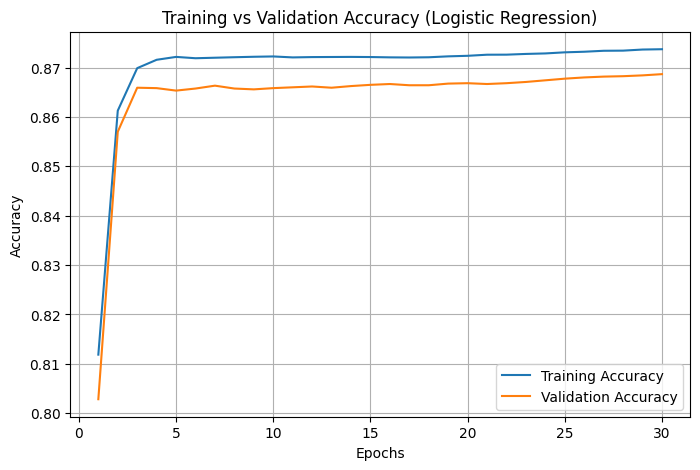

Training with lr=0.1, batch_size=1024, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.8119 | Val Acc: 0.8028
Epoch 2/40
  Train Acc: 0.8613 | Val Acc: 0.8570
Epoch 3/40
  Train Acc: 0.8699 | Val Acc: 0.8659
Epoch 4/40
  Train Acc: 0.8716 | Val Acc: 0.8658
Epoch 5/40
  Train Acc: 0.8722 | Val Acc: 0.8653
Epoch 6/40
  Train Acc: 0.8719 | Val Acc: 0.8658
Epoch 7/40
  Train Acc: 0.8720 | Val Acc: 0.8663
Epoch 8/40
  Train Acc: 0.8721 | Val Acc: 0.8658
Epoch 9/40
  Train Acc: 0.8722 | Val Acc: 0.8656
Epoch 10/40
  Train Acc: 0.8722 | Val Acc: 0.8658
Epoch 11/40
  Train Acc: 0.8721 | Val Acc: 0.8660
Epoch 12/40
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 13/40
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 14/40
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 15/40
  Train Acc: 0.8721 | Val Acc: 0.8665
Epoch 16/40
  Train Acc: 0.8721 | Val Acc: 0.8667
Epoch 17/40
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 18/40
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 19/40
  Train Acc: 0.8723 | Val Acc: 0.8

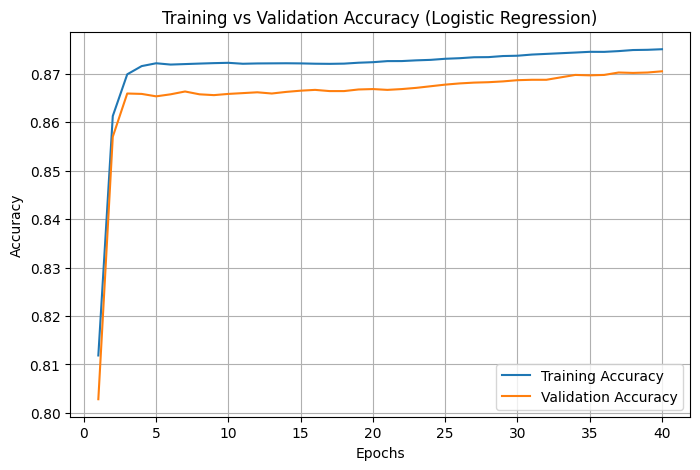

Training with lr=0.1, batch_size=1024, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.8119 | Val Acc: 0.8028
Epoch 2/50
  Train Acc: 0.8613 | Val Acc: 0.8570
Epoch 3/50
  Train Acc: 0.8699 | Val Acc: 0.8659
Epoch 4/50
  Train Acc: 0.8716 | Val Acc: 0.8658
Epoch 5/50
  Train Acc: 0.8722 | Val Acc: 0.8653
Epoch 6/50
  Train Acc: 0.8719 | Val Acc: 0.8658
Epoch 7/50
  Train Acc: 0.8720 | Val Acc: 0.8663
Epoch 8/50
  Train Acc: 0.8721 | Val Acc: 0.8658
Epoch 9/50
  Train Acc: 0.8722 | Val Acc: 0.8656
Epoch 10/50
  Train Acc: 0.8722 | Val Acc: 0.8658
Epoch 11/50
  Train Acc: 0.8721 | Val Acc: 0.8660
Epoch 12/50
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 13/50
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 14/50
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 15/50
  Train Acc: 0.8721 | Val Acc: 0.8665
Epoch 16/50
  Train Acc: 0.8721 | Val Acc: 0.8667
Epoch 17/50
  Train Acc: 0.8720 | Val Acc: 0.8664
Epoch 18/50
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 19/50
  Train Acc: 0.8723 | Val Acc: 0.8

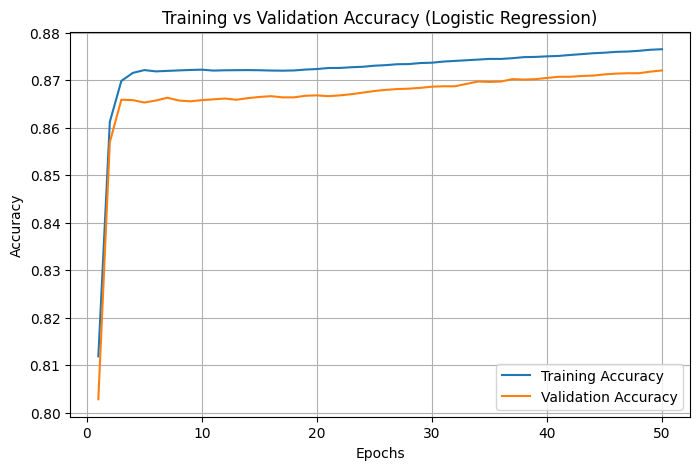

Training with lr=0.1, batch_size=1024, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.8050 | Val Acc: 0.7963
Epoch 2/30
  Train Acc: 0.8586 | Val Acc: 0.8537
Epoch 3/30
  Train Acc: 0.8682 | Val Acc: 0.8654
Epoch 4/30
  Train Acc: 0.8708 | Val Acc: 0.8659
Epoch 5/30
  Train Acc: 0.8716 | Val Acc: 0.8652
Epoch 6/30
  Train Acc: 0.8721 | Val Acc: 0.8650
Epoch 7/30
  Train Acc: 0.8723 | Val Acc: 0.8655
Epoch 8/30
  Train Acc: 0.8723 | Val Acc: 0.8655
Epoch 9/30
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 10/30
  Train Acc: 0.8723 | Val Acc: 0.8662
Epoch 11/30
  Train Acc: 0.8724 | Val Acc: 0.8666
Epoch 12/30
  Train Acc: 0.8724 | Val Acc: 0.8663
Epoch 13/30
  Train Acc: 0.8726 | Val Acc: 0.8666
Epoch 14/30
  Train Acc: 0.8727 | Val Acc: 0.8668
Epoch 15/30
  Train Acc: 0.8728 | Val Acc: 0.8668
Epoch 16/30
  Train Acc: 0.8729 | Val Acc: 0.8666
Epoch 17/30
  Train Acc: 0.8729 | Val Acc: 0.8667
Epoch 18/30
  Train Acc: 0.8730 | Val Acc: 0.8665
Epoch 19/30
  Train Acc: 0.8729 | Val Acc: 0.86

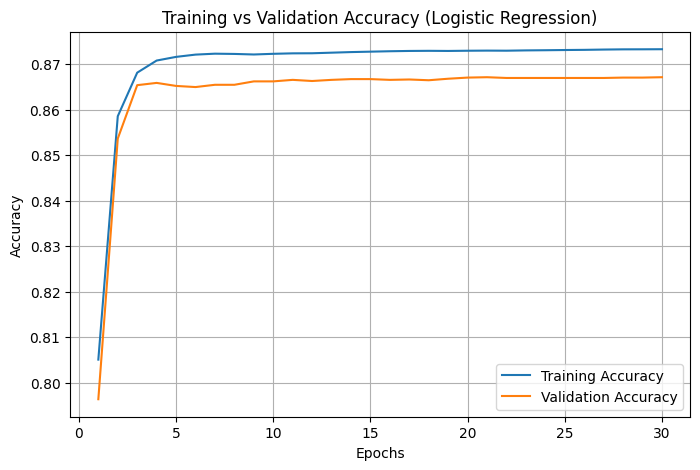

Training with lr=0.1, batch_size=1024, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.8050 | Val Acc: 0.7963
Epoch 2/40
  Train Acc: 0.8586 | Val Acc: 0.8537
Epoch 3/40
  Train Acc: 0.8682 | Val Acc: 0.8654
Epoch 4/40
  Train Acc: 0.8708 | Val Acc: 0.8659
Epoch 5/40
  Train Acc: 0.8716 | Val Acc: 0.8652
Epoch 6/40
  Train Acc: 0.8721 | Val Acc: 0.8650
Epoch 7/40
  Train Acc: 0.8723 | Val Acc: 0.8655
Epoch 8/40
  Train Acc: 0.8723 | Val Acc: 0.8655
Epoch 9/40
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 10/40
  Train Acc: 0.8723 | Val Acc: 0.8662
Epoch 11/40
  Train Acc: 0.8724 | Val Acc: 0.8666
Epoch 12/40
  Train Acc: 0.8724 | Val Acc: 0.8663
Epoch 13/40
  Train Acc: 0.8726 | Val Acc: 0.8666
Epoch 14/40
  Train Acc: 0.8727 | Val Acc: 0.8668
Epoch 15/40
  Train Acc: 0.8728 | Val Acc: 0.8668
Epoch 16/40
  Train Acc: 0.8729 | Val Acc: 0.8666
Epoch 17/40
  Train Acc: 0.8729 | Val Acc: 0.8667
Epoch 18/40
  Train Acc: 0.8730 | Val Acc: 0.8665
Epoch 19/40
  Train Acc: 0.8729 | Val Acc: 0.86

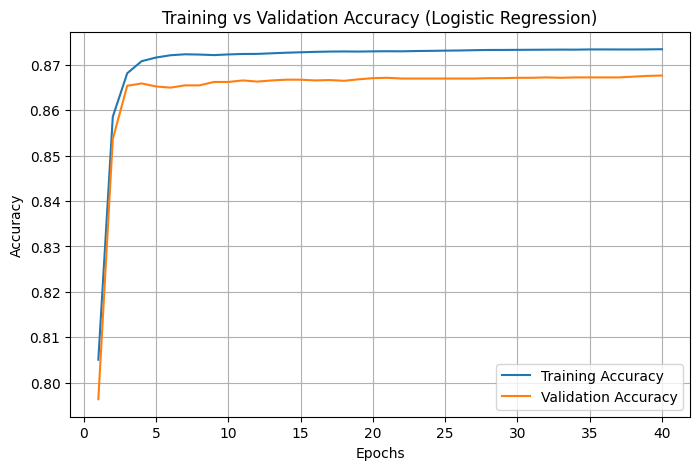

Training with lr=0.1, batch_size=1024, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.8050 | Val Acc: 0.7963
Epoch 2/50
  Train Acc: 0.8586 | Val Acc: 0.8537
Epoch 3/50
  Train Acc: 0.8682 | Val Acc: 0.8654
Epoch 4/50
  Train Acc: 0.8708 | Val Acc: 0.8659
Epoch 5/50
  Train Acc: 0.8716 | Val Acc: 0.8652
Epoch 6/50
  Train Acc: 0.8721 | Val Acc: 0.8650
Epoch 7/50
  Train Acc: 0.8723 | Val Acc: 0.8655
Epoch 8/50
  Train Acc: 0.8723 | Val Acc: 0.8655
Epoch 9/50
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 10/50
  Train Acc: 0.8723 | Val Acc: 0.8662
Epoch 11/50
  Train Acc: 0.8724 | Val Acc: 0.8666
Epoch 12/50
  Train Acc: 0.8724 | Val Acc: 0.8663
Epoch 13/50
  Train Acc: 0.8726 | Val Acc: 0.8666
Epoch 14/50
  Train Acc: 0.8727 | Val Acc: 0.8668
Epoch 15/50
  Train Acc: 0.8728 | Val Acc: 0.8668
Epoch 16/50
  Train Acc: 0.8729 | Val Acc: 0.8666
Epoch 17/50
  Train Acc: 0.8729 | Val Acc: 0.8667
Epoch 18/50
  Train Acc: 0.8730 | Val Acc: 0.8665
Epoch 19/50
  Train Acc: 0.8729 | Val Acc: 0.86

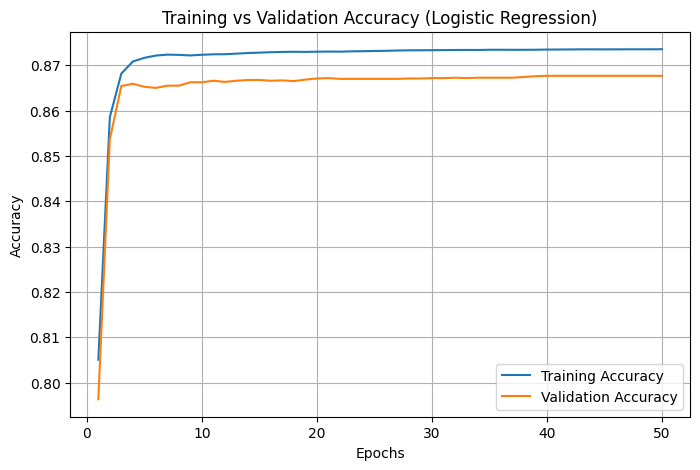

Training with lr=0.1, batch_size=2048, lambda=0.0001, epochs=30
Epoch 1/30
  Train Acc: 0.7960 | Val Acc: 0.7891
Epoch 2/30
  Train Acc: 0.8531 | Val Acc: 0.8487
Epoch 3/30
  Train Acc: 0.8665 | Val Acc: 0.8627
Epoch 4/30
  Train Acc: 0.8708 | Val Acc: 0.8647
Epoch 5/30
  Train Acc: 0.8721 | Val Acc: 0.8668
Epoch 6/30
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 7/30
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 8/30
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 9/30
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 10/30
  Train Acc: 0.8719 | Val Acc: 0.8660
Epoch 11/30
  Train Acc: 0.8717 | Val Acc: 0.8660
Epoch 12/30
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 13/30
  Train Acc: 0.8715 | Val Acc: 0.8657
Epoch 14/30
  Train Acc: 0.8714 | Val Acc: 0.8658
Epoch 15/30
  Train Acc: 0.8714 | Val Acc: 0.8656
Epoch 16/30
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 17/30
  Train Acc: 0.8711 | Val Acc: 0.8653
Epoch 18/30
  Train Acc: 0.8712 | Val Acc: 0.8651
Epoch 19/30
  Train Acc: 0.8711 | Val Acc: 0.

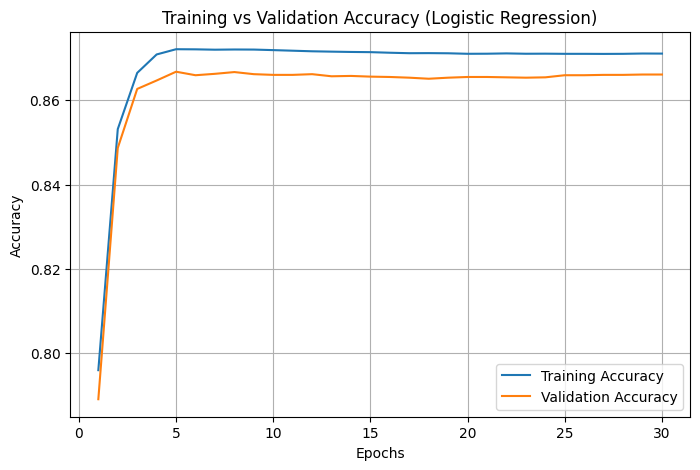

Training with lr=0.1, batch_size=2048, lambda=0.0001, epochs=40
Epoch 1/40
  Train Acc: 0.7960 | Val Acc: 0.7891
Epoch 2/40
  Train Acc: 0.8531 | Val Acc: 0.8487
Epoch 3/40
  Train Acc: 0.8665 | Val Acc: 0.8627
Epoch 4/40
  Train Acc: 0.8708 | Val Acc: 0.8647
Epoch 5/40
  Train Acc: 0.8721 | Val Acc: 0.8668
Epoch 6/40
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 7/40
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 8/40
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 9/40
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 10/40
  Train Acc: 0.8719 | Val Acc: 0.8660
Epoch 11/40
  Train Acc: 0.8717 | Val Acc: 0.8660
Epoch 12/40
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 13/40
  Train Acc: 0.8715 | Val Acc: 0.8657
Epoch 14/40
  Train Acc: 0.8714 | Val Acc: 0.8658
Epoch 15/40
  Train Acc: 0.8714 | Val Acc: 0.8656
Epoch 16/40
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 17/40
  Train Acc: 0.8711 | Val Acc: 0.8653
Epoch 18/40
  Train Acc: 0.8712 | Val Acc: 0.8651
Epoch 19/40
  Train Acc: 0.8711 | Val Acc: 0.

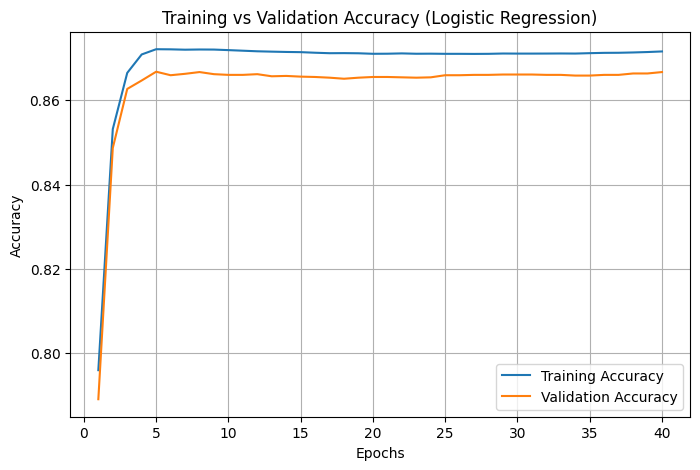

Training with lr=0.1, batch_size=2048, lambda=0.0001, epochs=50
Epoch 1/50
  Train Acc: 0.7960 | Val Acc: 0.7891
Epoch 2/50
  Train Acc: 0.8531 | Val Acc: 0.8487
Epoch 3/50
  Train Acc: 0.8665 | Val Acc: 0.8627
Epoch 4/50
  Train Acc: 0.8708 | Val Acc: 0.8647
Epoch 5/50
  Train Acc: 0.8721 | Val Acc: 0.8668
Epoch 6/50
  Train Acc: 0.8721 | Val Acc: 0.8659
Epoch 7/50
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 8/50
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 9/50
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 10/50
  Train Acc: 0.8719 | Val Acc: 0.8660
Epoch 11/50
  Train Acc: 0.8717 | Val Acc: 0.8660
Epoch 12/50
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 13/50
  Train Acc: 0.8715 | Val Acc: 0.8657
Epoch 14/50
  Train Acc: 0.8714 | Val Acc: 0.8658
Epoch 15/50
  Train Acc: 0.8714 | Val Acc: 0.8656
Epoch 16/50
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 17/50
  Train Acc: 0.8711 | Val Acc: 0.8653
Epoch 18/50
  Train Acc: 0.8712 | Val Acc: 0.8651
Epoch 19/50
  Train Acc: 0.8711 | Val Acc: 0.

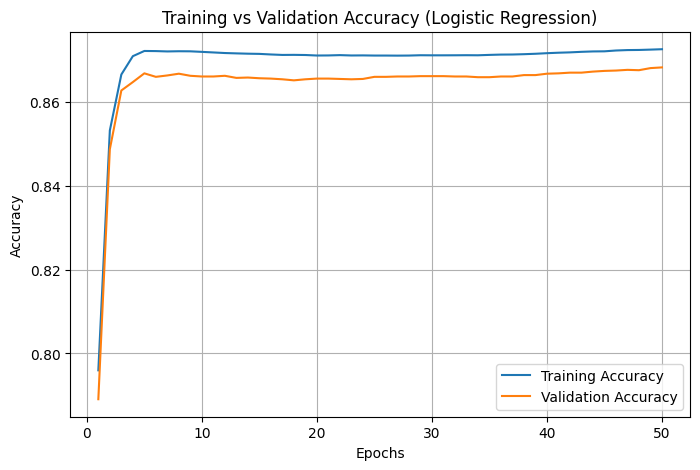

Training with lr=0.1, batch_size=2048, lambda=0.001, epochs=30
Epoch 1/30
  Train Acc: 0.7955 | Val Acc: 0.7885
Epoch 2/30
  Train Acc: 0.8529 | Val Acc: 0.8482
Epoch 3/30
  Train Acc: 0.8663 | Val Acc: 0.8624
Epoch 4/30
  Train Acc: 0.8708 | Val Acc: 0.8645
Epoch 5/30
  Train Acc: 0.8720 | Val Acc: 0.8668
Epoch 6/30
  Train Acc: 0.8721 | Val Acc: 0.8658
Epoch 7/30
  Train Acc: 0.8720 | Val Acc: 0.8661
Epoch 8/30
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 9/30
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 10/30
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 11/30
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 12/30
  Train Acc: 0.8717 | Val Acc: 0.8662
Epoch 13/30
  Train Acc: 0.8716 | Val Acc: 0.8660
Epoch 14/30
  Train Acc: 0.8715 | Val Acc: 0.8658
Epoch 15/30
  Train Acc: 0.8715 | Val Acc: 0.8657
Epoch 16/30
  Train Acc: 0.8713 | Val Acc: 0.8656
Epoch 17/30
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 18/30
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 19/30
  Train Acc: 0.8712 | Val Acc: 0.8

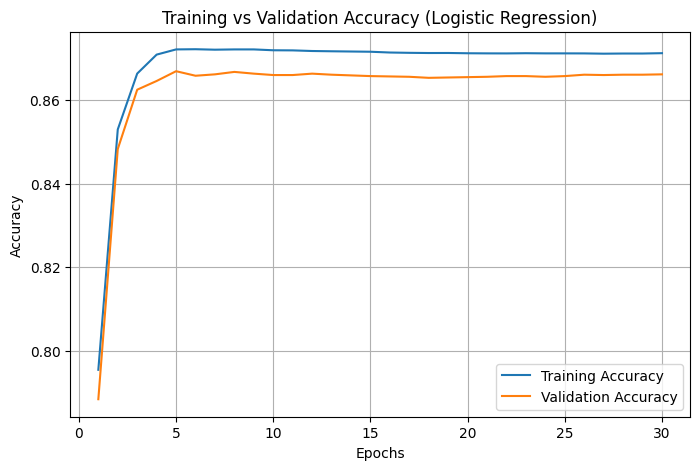

Training with lr=0.1, batch_size=2048, lambda=0.001, epochs=40
Epoch 1/40
  Train Acc: 0.7955 | Val Acc: 0.7885
Epoch 2/40
  Train Acc: 0.8529 | Val Acc: 0.8482
Epoch 3/40
  Train Acc: 0.8663 | Val Acc: 0.8624
Epoch 4/40
  Train Acc: 0.8708 | Val Acc: 0.8645
Epoch 5/40
  Train Acc: 0.8720 | Val Acc: 0.8668
Epoch 6/40
  Train Acc: 0.8721 | Val Acc: 0.8658
Epoch 7/40
  Train Acc: 0.8720 | Val Acc: 0.8661
Epoch 8/40
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 9/40
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 10/40
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 11/40
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 12/40
  Train Acc: 0.8717 | Val Acc: 0.8662
Epoch 13/40
  Train Acc: 0.8716 | Val Acc: 0.8660
Epoch 14/40
  Train Acc: 0.8715 | Val Acc: 0.8658
Epoch 15/40
  Train Acc: 0.8715 | Val Acc: 0.8657
Epoch 16/40
  Train Acc: 0.8713 | Val Acc: 0.8656
Epoch 17/40
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 18/40
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 19/40
  Train Acc: 0.8712 | Val Acc: 0.8

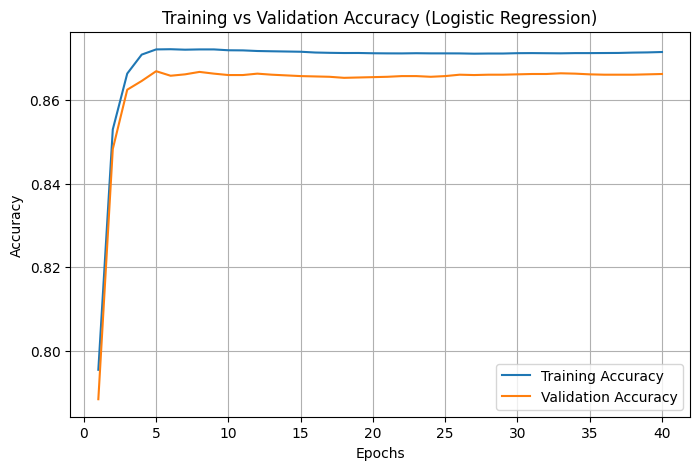

Training with lr=0.1, batch_size=2048, lambda=0.001, epochs=50
Epoch 1/50
  Train Acc: 0.7955 | Val Acc: 0.7885
Epoch 2/50
  Train Acc: 0.8529 | Val Acc: 0.8482
Epoch 3/50
  Train Acc: 0.8663 | Val Acc: 0.8624
Epoch 4/50
  Train Acc: 0.8708 | Val Acc: 0.8645
Epoch 5/50
  Train Acc: 0.8720 | Val Acc: 0.8668
Epoch 6/50
  Train Acc: 0.8721 | Val Acc: 0.8658
Epoch 7/50
  Train Acc: 0.8720 | Val Acc: 0.8661
Epoch 8/50
  Train Acc: 0.8720 | Val Acc: 0.8667
Epoch 9/50
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 10/50
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 11/50
  Train Acc: 0.8718 | Val Acc: 0.8659
Epoch 12/50
  Train Acc: 0.8717 | Val Acc: 0.8662
Epoch 13/50
  Train Acc: 0.8716 | Val Acc: 0.8660
Epoch 14/50
  Train Acc: 0.8715 | Val Acc: 0.8658
Epoch 15/50
  Train Acc: 0.8715 | Val Acc: 0.8657
Epoch 16/50
  Train Acc: 0.8713 | Val Acc: 0.8656
Epoch 17/50
  Train Acc: 0.8712 | Val Acc: 0.8655
Epoch 18/50
  Train Acc: 0.8712 | Val Acc: 0.8652
Epoch 19/50
  Train Acc: 0.8712 | Val Acc: 0.8

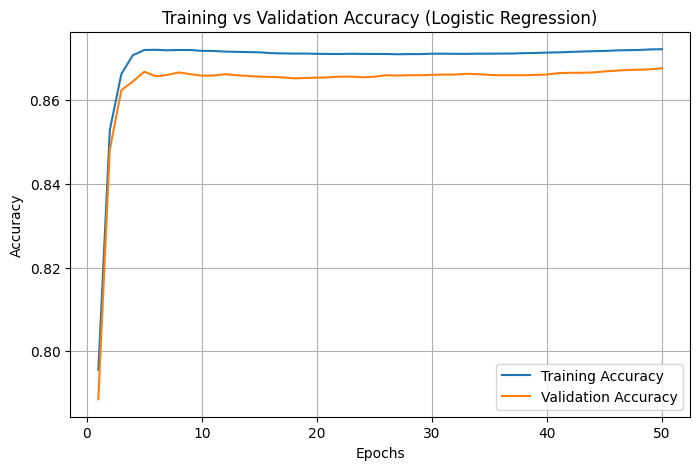

Training with lr=0.1, batch_size=2048, lambda=0.01, epochs=30
Epoch 1/30
  Train Acc: 0.7918 | Val Acc: 0.7832
Epoch 2/30
  Train Acc: 0.8504 | Val Acc: 0.8442
Epoch 3/30
  Train Acc: 0.8652 | Val Acc: 0.8614
Epoch 4/30
  Train Acc: 0.8700 | Val Acc: 0.8650
Epoch 5/30
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 6/30
  Train Acc: 0.8723 | Val Acc: 0.8666
Epoch 7/30
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 8/30
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 9/30
  Train Acc: 0.8723 | Val Acc: 0.8667
Epoch 10/30
  Train Acc: 0.8721 | Val Acc: 0.8668
Epoch 11/30
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 12/30
  Train Acc: 0.8722 | Val Acc: 0.8666
Epoch 13/30
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 14/30
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 15/30
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 16/30
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 17/30
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 18/30
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 19/30
  Train Acc: 0.8719 | Val Acc: 0.86

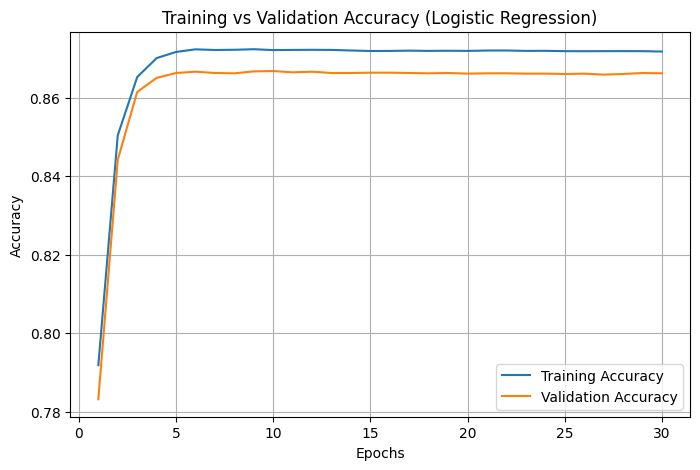

Training with lr=0.1, batch_size=2048, lambda=0.01, epochs=40
Epoch 1/40
  Train Acc: 0.7918 | Val Acc: 0.7832
Epoch 2/40
  Train Acc: 0.8504 | Val Acc: 0.8442
Epoch 3/40
  Train Acc: 0.8652 | Val Acc: 0.8614
Epoch 4/40
  Train Acc: 0.8700 | Val Acc: 0.8650
Epoch 5/40
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 6/40
  Train Acc: 0.8723 | Val Acc: 0.8666
Epoch 7/40
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 8/40
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 9/40
  Train Acc: 0.8723 | Val Acc: 0.8667
Epoch 10/40
  Train Acc: 0.8721 | Val Acc: 0.8668
Epoch 11/40
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 12/40
  Train Acc: 0.8722 | Val Acc: 0.8666
Epoch 13/40
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 14/40
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 15/40
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 16/40
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 17/40
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 18/40
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 19/40
  Train Acc: 0.8719 | Val Acc: 0.86

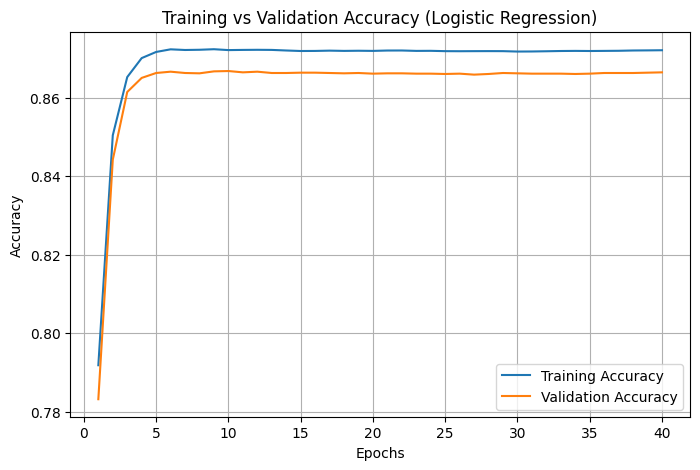

Training with lr=0.1, batch_size=2048, lambda=0.01, epochs=50
Epoch 1/50
  Train Acc: 0.7918 | Val Acc: 0.7832
Epoch 2/50
  Train Acc: 0.8504 | Val Acc: 0.8442
Epoch 3/50
  Train Acc: 0.8652 | Val Acc: 0.8614
Epoch 4/50
  Train Acc: 0.8700 | Val Acc: 0.8650
Epoch 5/50
  Train Acc: 0.8716 | Val Acc: 0.8662
Epoch 6/50
  Train Acc: 0.8723 | Val Acc: 0.8666
Epoch 7/50
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 8/50
  Train Acc: 0.8722 | Val Acc: 0.8662
Epoch 9/50
  Train Acc: 0.8723 | Val Acc: 0.8667
Epoch 10/50
  Train Acc: 0.8721 | Val Acc: 0.8668
Epoch 11/50
  Train Acc: 0.8721 | Val Acc: 0.8664
Epoch 12/50
  Train Acc: 0.8722 | Val Acc: 0.8666
Epoch 13/50
  Train Acc: 0.8721 | Val Acc: 0.8662
Epoch 14/50
  Train Acc: 0.8720 | Val Acc: 0.8662
Epoch 15/50
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 16/50
  Train Acc: 0.8719 | Val Acc: 0.8663
Epoch 17/50
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 18/50
  Train Acc: 0.8719 | Val Acc: 0.8662
Epoch 19/50
  Train Acc: 0.8719 | Val Acc: 0.86

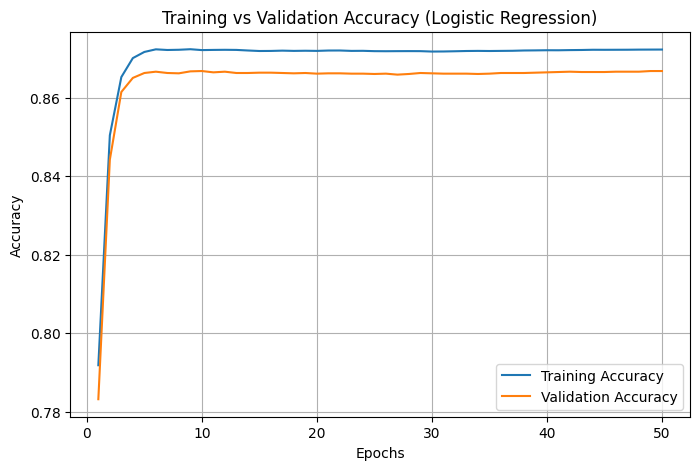

Best validation accuracy: 0.878
Best hyperparameters: {'lr': 0.1, 'batch_size': 512, 'lambda_reg': 0.0001, 'epochs': 50, 'weights': array([[-0.0197642 , -0.00648957, -0.00068035,  0.02697884],
       [-0.00876391,  0.00131681, -0.00173676,  0.00920847],
       [-0.01638791, -0.27894461,  0.24089234,  0.05330379],
       ...,
       [-0.01091731, -0.00908025, -0.00864956,  0.02872472],
       [-0.04025706,  0.07189107,  0.00404759, -0.03569484],
       [-0.01756065,  0.05150017, -0.01656557, -0.01729009]]), 'bias': array([[-0.01900496,  0.0384285 , -0.0973599 ,  0.07850474]])}


In [65]:

# Number of unique classes in the training labels
num_classes = len(np.unique(y_train))

# Convert class labels from 1-based indexing to 0-based indexing
y_train = y_train - 1
y_val   = y_val - 1
y_test  = y_test - 1

# Convert labels into one-hot encoded format
y_train_onehot = np.eye(num_classes)[y_train]
y_val_onehot   = np.eye(num_classes)[y_val]
y_test_onehot  = np.eye(num_classes)[y_test]


import numpy as np

# Define hyperparameter grid
learning_rates = [0.01, 0.05, 0.1]
batch_sizes    = 1024
lambdas        = [1e-4, 1e-3, 1e-2]
epochs_list    = [30, 40, 50]

best_val_acc = 0
best_hyperparams = {}

# Grid search
for lr in learning_rates:
    for batch_size in batch_sizes:
        for lambda_reg in lambdas:
            for epochs in epochs_list:
                print(f"Training with lr={lr}, batch_size={batch_size}, lambda={lambda_reg}, epochs={epochs}")

                # Train the model
                w, b, train_acc, val_acc = gradient_descent_weighted(
                    X_train, y_train_onehot,
                    X_val=X_val,
                    y_val=y_val_onehot,
                    lr=lr,
                    epochs=epochs,
                    batch_size=batch_size,
                    lambda_reg=lambda_reg
                )
                val_acc_last_epoch = val_acc[-1]

                # Check if this is the best model so far
                if val_acc_last_epoch > best_val_acc:
                    best_val_acc = val_acc_last_epoch
                    best_hyperparams = {
                        'lr': lr,
                        'batch_size': batch_size,
                        'lambda_reg': lambda_reg,
                        'epochs': epochs,
                        'weights': w,
                        'bias': b
                    }

print("Best validation accuracy:", best_val_acc)
print("Best hyperparameters:", best_hyperparams)



In [69]:
# Use the best model to predict on test set
w_best = best_hyperparams['weights']
b_best = best_hyperparams['bias']

# Make predictions
y_test_pred = np.argmax(X_test.dot(w_best) + b_best, axis=1)
y_true_test = np.argmax(y_test_onehot, axis=1)

# Calculate test accuracy
test_acc = np.mean(y_test_pred == y_true_test)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8775


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_true_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1900
           1       0.90      0.97      0.93      1900
           2       0.87      0.81      0.84      1900
           3       0.85      0.84      0.85      1900

    accuracy                           0.88      7600
   macro avg       0.88      0.88      0.88      7600
weighted avg       0.88      0.88      0.88      7600


Confusion Matrix:
[[1685   85   83   47]
 [  27 1845   18   10]
 [  90   47 1545  218]
 [  98   71  137 1594]]


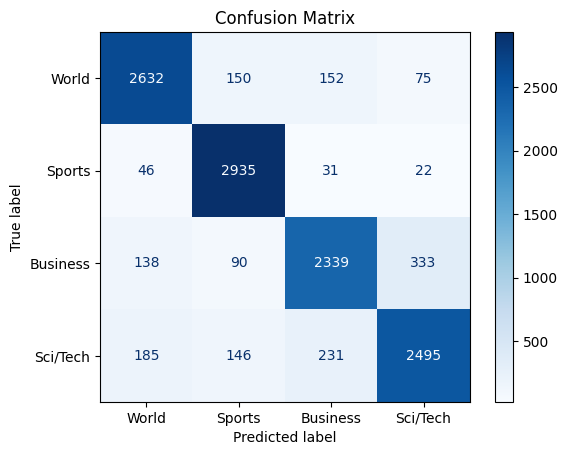

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Map class indices to category names
index_to_label_ag = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}

# Predict on validation set
y_val_pred = np.argmax(X_val.dot(w) + b, axis=1)

# Convert one-hot validation labels to class indices
y_true_val = np.argmax(y_val_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_val, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(index_to_label_ag.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


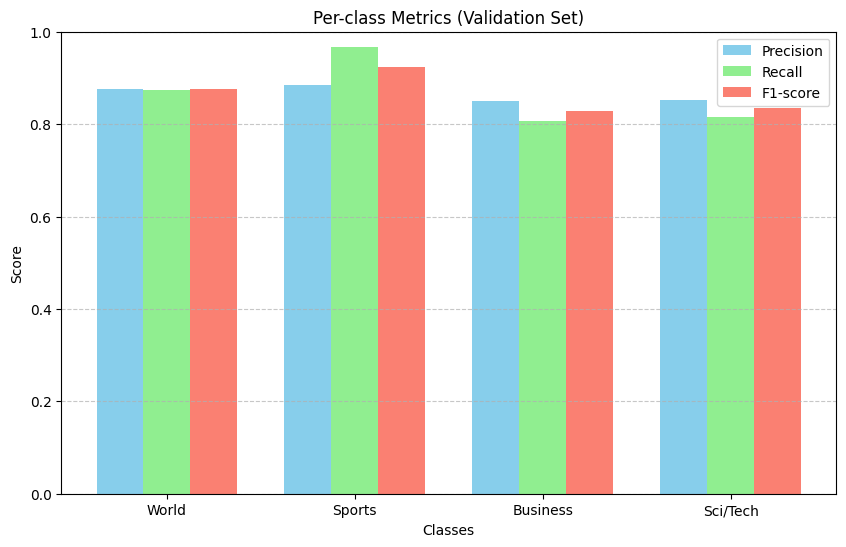

In [68]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Ensure validation predictions and true labels are class indices
y_val_pred = np.argmax(X_val.dot(w) + b, axis=1)
y_true_val = np.argmax(y_val_onehot, axis=1)

# Compute per-class metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_true_val, y_val_pred, average=None)

# Define class names
index_to_label_ag = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
classes = list(index_to_label_ag.values())

# Set bar width and positions
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width, label='F1-score', color='salmon')

plt.xticks(x, classes)
plt.ylim(0, 1)
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Per-class Metrics (Validation Set)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Evaluate on test set
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = predict(X_test, w, b)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_labels, y_pred))


In [ ]:
# Create a list of sample news articles for testing the trained model
sample_texts_ag = [
    # World category examples
    {
        "title": "World leaders meet to discuss climate change and global policies",
        "description": "Leaders from multiple countries gather to set targets for emission reductions and sustainability."
    },
    {
        "title": "United Nations warns of escalating refugee crisis in Europe",
        "description": "Thousands of displaced people face humanitarian challenges amid political tensions."
    },
    {
        "title": "International summit addresses global water scarcity and sustainable solutions",
        "description": "Experts propose new strategies to ensure clean water access worldwide."
    },
    {
        "title": "National elections spark debates on economic and foreign policy",
        "description": "Candidates outline their visions for the next government term."
    },
    {
        "title": "Peace talks resume between conflicting nations in the Middle East",
        "description": "Diplomats aim to reach an agreement to end long-standing hostilities."
    },

    # Sports category examples
    {
        "title": "Local basketball team wins state championship after thrilling overtime",
        "description": "The championship game went into overtime, and the local team clinched the victory."
    },
    {
        "title": "Football league announces schedule changes for the upcoming season",
        "description": "Teams will face new opponents in revised match fixtures."
    },
    {
        "title": "Olympic athletes break records in swimming and track events",
        "description": "Spectators celebrate historic performances in the international games."
    },
    {
        "title": "Local marathon attracts thousands of runners and supporters",
        "description": "Participants from across the country join to promote fitness and charity."
    },
    {
        "title": "Tennis champion defends title at major international tournament",
        "description": "Fans cheer as the top-ranked player wins the finals in straight sets."
    },

    # Business category examples
    {
        "title": "Stock markets surge as major companies report record earnings",
        "description": "Investors react positively to quarterly financial results across industries."
    },
    {
        "title": "Startup raises millions to develop clean energy solutions",
        "description": "The investment will fund research in sustainable and renewable technologies."
    },
    {
        "title": "Financial analysts predict strong quarterly growth for tech sector",
        "description": "Market trends indicate high demand for software and cloud solutions."
    },
    {
        "title": "Global trade agreements aim to reduce tariffs on electronics",
        "description": "Countries negotiate policies to support cross-border business growth."
    },
    {
        "title": "Retail giant announces expansion into new international markets",
        "description": "The company plans to open stores and online services worldwide."
    },

    # Sci/Tech category examples
    {
        "title": "Tech company announces launch of AI-powered software platform",
        "description": "The new platform aims to automate workflows and enhance productivity across industries."
    },
    {
        "title": "Scientists discover new exoplanet orbiting nearby star",
        "description": "Astronomers use advanced telescopes to identify potential habitable planets."
    },
    {
        "title": "Breakthrough in renewable energy promises cheaper and cleaner electricity",
        "description": "Researchers develop innovative solar panels with higher efficiency."
    },
    {
        "title": "New study reveals the impact of social media on teen mental health",
        "description": "Findings highlight both positive and negative effects of online interactions."
    },
    {
        "title": "Space agency announces mission to explore Jupiter's icy moon Europa",
        "description": "The probe will gather data to study the moon's potential for life."
    }
]

# Mapping predicted class indices back to category names
index_to_label_ag = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}

# Convert sample news list into a DataFrame
sample_df = pd.DataFrame(sample_texts_ag)

# Combine title and description into a single column
sample_texts_combined = clean(sample_df)

# Apply text preprocessing to the combined text
sample_texts_combined['title_description'] = sample_df['title_description'].apply(preprocess)

# Convert sample text into TF-IDF feature vectors
X_sample = vectorizer.transform(sample_df['title_description']).toarray()

# Predict class indices using the trained model
preds = predict(X_sample, w, b)

# Convert predicted indices into category names
predicted_labels = [index_to_label_ag[i] for i in preds]

# Print each news article with its predicted category
for title, label in zip(sample_df['title_description'], predicted_labels):
    print(f"title: {title}")
    print(f"Predicted Category: {label}\n")
